# Introduction

## Hi !
### I am Avijeet Palit, Roll: 21f1005675. This is my MLP Project for the May-Sept'23 Term of the IITM BS Degree, Diploma level.

## **Project Statement: Sentiment Prediction on Movie reviews**

### Platform : Kaggle

### Student_id : 21f1005675@ds.study.iitm.ac.in


#### SO, LET'SS STARTTTTT...... 🚘🚀👨‍🚀


# Upgrade Packages

In [ ]:
## For Upgrading Sklearn

! pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Notebook Timer

In [ ]:
import time
# Record the starting time
start_time = time.time()

# Data Loading
## Converting the CSV Data To Pandas Dataframe

We retain the original data and create a duplicate for data cleaning and manipulation to prevent any loss of the original information.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_orignal = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movie_orignal = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
test_orignal = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
sample = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv')


#Making additional copy to avoid data loss

train= train_orignal.copy()
movie= movie_orignal.copy()
test= test_orignal.copy()

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# Viewing the Training Dataset

In [ ]:
print(train.dtypes,train.shape)
print('**************************************************************************************************')
train.head()

movieid               object
reviewerName          object
isFrequentReviewer      bool
reviewText            object
sentiment             object
dtype: object (162758, 5)
**************************************************************************************************


movieid         reviewerName  \
0                                   marvelous_pirate       Benjamin Henry   
1          tony_montana_frodo_baggins_v_rocky_balboa        Felicia Lopez   
2  darth_vader_katniss_everdeen_sorcerer_donnie_d...  Mr. Charles Burgess   
3                                 lara_croft_glimmer         Ryan Barrett   
4  jason_bourne_surreal_the_terminator_indiana_jones     Alexander Glover   

   isFrequentReviewer                                         reviewText  \
0               False  Henry Selick’s first movie since 2009’s Corali...   
1               False  With a cast that reads like the Vogue Oscar pa...   
2                True  Creed II does not give us anything but another...   
3               False  I know what you're thinking, but this is no Li...   
4               False  Director Fernando Meirelles tells the story wi...   

  sentiment  
0  POSITIVE  
1  NEGATIVE  
2  POSITIVE  
3  POSITIVE  
4  POSITIVE

# Viewing Test data

In [ ]:
print(test.dtypes,test.shape)
print('**************************************************************************************************')
test.head()

movieid         object
reviewerName    object
isTopCritic       bool
reviewText      object
dtype: object (55315, 4)
**************************************************************************************************


movieid     reviewerName  isTopCritic  \
0            legend_marty_mcfly_oracle         John Kim        False   
1  terminator_katniss_everdeen_glimmer     Brian Chaney        False   
2          james_bond_labyrinth_gollum  Danielle Parker        False   
3            v_quest_han_solo_wondrous    Brittany Lane        False   
4        enigma_hulk_surreal_starlight    Justin Willis        False   

                                          reviewText  
0  Green slowly cranks up the dread with style an...  
1  Philip Noyce's direction is elegant and unforc...  
2  It wouldn't do to say what path Maria ultimate...  
3  Pig is not exactly the arthouse John Wick that...  
4  An imaginative no-budget musical of sorts abou...

# Viewing & Analysing the Movie Dataset

In [ ]:
print(movie.dtypes, movie.shape)
print('**************************************************************************************************')
print(movie['movieid'].value_counts())
movie.head()

movieid                  object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
dtype: object (143258, 14)
**************************************************************************************************
escape_the_terminator_tyler_durden_astonish         367
silent_mystery_the_terminator                        17
crimson_james_t._kirk_marty_mcfly_hulk               17
darth_vader_dazzling_courageous_holly_golightly      16
rocky_balboa_wonder_woman_majestic_emerald           16
                                                   ... 
anakin_skywalker_frodo_baggins_t-800_black_widow      1
phantom_hannibal_lecter_don_vito_c

movieid  \
0                  han_solo_heroic_myth_wonder_woman   
1              voyage_tyler_durden_han_solo_stardust   
2  norman_bates_ferris_bueller_hermione_granger_v...   
3                           elegant_hermione_granger   
4                             adventure_rocky_balboa   

                                               title  audienceScore rating  \
0                  Han Solo Heroic Myth Wonder Woman           50.0    NaN   
1              Voyage Tyler Durden Han Solo Stardust            NaN    NaN   
2  Norman Bates Ferris Bueller Hermione Granger V...           43.0    NaN   
3                           Elegant Hermione Granger           60.0    NaN   
4                             Adventure Rocky Balboa           70.0    NaN   

  ratingContents releaseDateTheaters releaseDateStreaming  runtimeMinutes  \
0            NaN                 NaN           2018-08-25            75.0   
1            NaN                 NaN           2020-02-11           114.0   
2            NaN                 NaN                  NaN           120.0   
3            NaN                 NaN           2020-10-23            90.0   
4            NaN                 NaN           2017-03-27            80.0   

                           genre originalLanguage        director boxOffice  \
0         Comedy, Horror, Sci-fi          English  Claude Nicolet       NaN   
1                          Drama          English    Nathan Haack       NaN   
2                          Drama           Korean   Theresa Smith       NaN   
3     Action, Mystery & thriller          English    Donald Lewis       NaN   
4  Fantasy, Adventure, Animation          English    Howard Simms       NaN   

  distributor soundType  
0         NaN       NaN  
1         NaN       NaN  
2         NaN       NaN  
3         NaN       NaN  
4         NaN       NaN

In [ ]:
# Descripttive statistics of movie dataset
movie.describe(include ='all')

movieid  \
count                                        143258   
unique                                       126404   
top     escape_the_terminator_tyler_durden_astonish   
freq                                            367   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                             NaN   
75%                                             NaN   
max                                             NaN   

                                              title  audienceScore rating  \
count                                        143258   73248.000000  13991   
unique                                       126404            NaN     10   
top     Escape The Terminator Tyler Durden Astonish            NaN      R   
freq                                            367            NaN   7734   
mean                                            NaN      55.674967    NaN   
std                                             NaN      24.553648    NaN   
min                                             NaN       0.000000    NaN   
25%                                             NaN      37.000000    NaN   
50%                                             NaN      57.000000    NaN   
75%                                             NaN      76.000000    NaN   
max                                             NaN     100.000000    NaN   

       ratingContents releaseDateTheaters releaseDateStreaming  \
count           13991               30773                79420   
unique           8353               12062                 4726   
top      ['Language']          2018-09-14           2017-05-22   
freq              365                  37                 1232   
mean              NaN                 NaN                  NaN   
std               NaN                 NaN                  NaN   
min               NaN                 NaN                  NaN   
25%               NaN                 NaN                  NaN   
50%               NaN                 NaN                  NaN   
75%               NaN                 NaN                  NaN   
max               NaN                 NaN                  NaN   

        runtimeMinutes   genre originalLanguage       director boxOffice  \
count    129431.000000  132175           129400         143258     14743   
unique             NaN    2912              112          62208      4863   
top                NaN   Drama          English  Joseph Brooks     $1.1M   
freq               NaN   27860            85034           4194       118   
mean         93.708578     NaN              NaN            NaN       NaN   
std          28.129175     NaN              NaN            NaN       NaN   
min           1.000000     NaN              NaN            NaN       NaN   
25%          84.000000     NaN              NaN            NaN       NaN   
50%          92.000000     NaN              NaN            NaN       NaN   
75%         103.000000     NaN              NaN            NaN       NaN   
max        2700.000000     NaN              NaN            NaN       NaN   

               distributor soundType  
count                23005     15917  
unique                3694       551  
top     Paramount Pictures  Surround  
freq                   994      4075  
mean                   NaN       NaN  
std                    NaN       NaN  
min                    NaN       NaN  
25%                    NaN       NaN  
50%                    NaN       NaN  
75%                    NaN       NaN  
max                    NaN       NaN

In [ ]:
#Missing_value percentage cheaking on movie dataset

percent_missing = movie.isnull().sum() * 100 / len(movie)
missing_value_df = pd.DataFrame({'column_name': movie.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
movieid                            movieid         0.000000
title                                title         0.000000
audienceScore                audienceScore        48.869871
rating                              rating        90.233704
ratingContents              ratingContents        90.233704
releaseDateTheaters    releaseDateTheaters        78.519175
releaseDateStreaming  releaseDateStreaming        44.561560
runtimeMinutes              runtimeMinutes         9.651817
genre                                genre         7.736392
originalLanguage          originalLanguage         9.673456
director                          director         0.000000
boxOffice                        boxOffice        89.708777
distributor                    distributor        83.941560
soundType                        soundType        88.889277

It appears that the dataset contains a significant number of missing values (NaNs), coupled with high levels of redundancy. To address this, our approach involves first removing rows with NaN values to assess the impact on redundancy. Additionally, we aim to verify whether the dataset covers all movie IDs present in the training set. Our focus is on dropping features with an exceptionally high proportion of NaN values to streamline the process.

In [ ]:
movie1=movie.dropna()
print(movie1['movieid'].value_counts())
print('**************************************************************************************************')
print('Unique Movie ID in Movie dataset after dropna: ',movie1['movieid'].nunique())
print('**************************************************************************************************')
print('Unique Movie ID in Train Dataset: ',train['movieid'].nunique())

terminator_indiana_jones_sherlock_holmes_phenomenal    2
pirate_holly_golightly_marty_mcfly_zephyr              2
scarlett_o'hara_sapphire_the_joker_jon_snow            2
hannibal_lecter_t-800_donnie_darko_marty_mcfly         2
morpheus_enthralling_radiant_michael_corleone          2
                                                      ..
majestic_starlight                                     1
frodo_baggins_enchant_anakin_skywalker                 1
sapphire_annie_hall_willy_wonka_john_mcclane           1
michael_corleone_scarlett_o'hara_willy_wonka_quest     1
indiana_jones_jack_sparrow_infinite_enchant            1
Name: movieid, Length: 3178, dtype: int64
**************************************************************************************************
Unique Movie ID in Movie dataset after dropna:  3178
**************************************************************************************************
Unique Movie ID in Train Dataset:  16812


After removing the rows with NaN values, we discovered that the movie IDs in the movie dataset do not encompass all the unique movie IDs present in the training dataset. This discrepancy is attributed to features with a notably high percentage of NaN values. Consequently, we have made the determination to eliminate features with an extensive proportion of NaN values, while retaining only those columns pertaining to 'audienceScore','runtimeMinutes', 'genre', 'originalLanguage', 'director' and movieid (primarily for merging purposes). We intend to proceed with this refined dataset and repeat the methodology to achieve more favorable results.

In [ ]:
movie2 = movie[['movieid','audienceScore','runtimeMinutes', 'genre', 'originalLanguage', 'director']]
movie_f=movie2.dropna()

print(movie_f['movieid'].value_counts())
print('**************************************************************************************************')
print('Unique Movie ID in Movie dataset after dropna: ',movie_f['movieid'].nunique())
print('**************************************************************************************************')
print('Unique Movie ID in Train Dataset: ',train['movieid'].nunique())

phantom_enigma_rocky_balboa                        9
darth_vader_dazzling_courageous_holly_golightly    9
silent_mystery_the_terminator                      9
fortune_phenomenal_don_vito_corleone               9
mystique_myriad_oracle_chronicles                  8
                                                  ..
donnie_darko_phenomenal_darth_vader                1
majestic_ferris_bueller_ethereal                   1
oracle_vito_corleone_hiccup_surreal                1
pirate_luke_skywalker_captain_america              1
elegant_emerald_valiant_donnie_darko               1
Name: movieid, Length: 61606, dtype: int64
**************************************************************************************************
Unique Movie ID in Movie dataset after dropna:  61606
**************************************************************************************************
Unique Movie ID in Train Dataset:  16812


Here we able to lay of redundancy at some extent but still some features the movie dataset is highly redundant. But we are good to go with these aforementioned features on movie id after droping duplicates

In [ ]:
## Merging Train-Movie dataset

#droping duplicates
movie_f1 = movie_f.drop_duplicates(subset= ['movieid'])
print(movie_f1['movieid'].nunique(), train['movieid'].nunique())
train_m = pd.merge(train, movie_f1, on = 'movieid', how ='left')
print('**************************************************************************************************')
train.shape, train_m.shape

61606 16812
**************************************************************************************************


((162758, 5), (162758, 10))

In [ ]:
## Merging Train-Movie dataset

test_m = pd.merge(test, movie_f1, on = 'movieid', how ='left')
test.shape, test_m.shape

((55315, 4), (55315, 9))

# Data cleaning

In [ ]:
train_m.head()

movieid         reviewerName  \
0                                   marvelous_pirate       Benjamin Henry   
1          tony_montana_frodo_baggins_v_rocky_balboa        Felicia Lopez   
2  darth_vader_katniss_everdeen_sorcerer_donnie_d...  Mr. Charles Burgess   
3                                 lara_croft_glimmer         Ryan Barrett   
4  jason_bourne_surreal_the_terminator_indiana_jones     Alexander Glover   

   isFrequentReviewer                                         reviewText  \
0               False  Henry Selick’s first movie since 2009’s Corali...   
1               False  With a cast that reads like the Vogue Oscar pa...   
2                True  Creed II does not give us anything but another...   
3               False  I know what you're thinking, but this is no Li...   
4               False  Director Fernando Meirelles tells the story wi...   

  sentiment  audienceScore  runtimeMinutes  \
0  POSITIVE           65.0           105.0   
1  NEGATIVE           47.0           119.0   
2  POSITIVE           80.0           130.0   
3  POSITIVE           47.0            88.0   
4  POSITIVE           97.0           131.0   

                                   genre     originalLanguage      director  
0  Comedy, Animation, Adventure, Fantasy              English  Bennie Basso  
1       Holiday, Romance, Comedy, Lgbtq+              English  Hubert Dixon  
2                                  Drama              English  Bobby Oleary  
3     Action, Mystery & thriller, Sci-fi              English     Gail Pugh  
4                           Crime, Drama  Portuguese (Brazil)    John Trent

In [ ]:
# Droping ReviewerName column
train = train_m.drop(['reviewerName'], axis=1)
test = test_m.drop(['reviewerName'], axis=1)

In [ ]:
# Renaming test columns same as train columns
test.rename(columns = {'isTopCritic':'isFrequentReviewer'}, inplace = True)
test.head()

movieid  isFrequentReviewer  \
0            legend_marty_mcfly_oracle               False   
1  terminator_katniss_everdeen_glimmer               False   
2          james_bond_labyrinth_gollum               False   
3            v_quest_han_solo_wondrous               False   
4        enigma_hulk_surreal_starlight               False   

                                          reviewText  audienceScore  \
0  Green slowly cranks up the dread with style an...           57.0   
1  Philip Noyce's direction is elegant and unforc...           86.0   
2  It wouldn't do to say what path Maria ultimate...            NaN   
3  Pig is not exactly the arthouse John Wick that...           84.0   
4  An imaginative no-budget musical of sorts abou...            NaN   

   runtimeMinutes                                genre originalLanguage  \
0           111.0  Holiday, Horror, Mystery & thriller          English   
1            94.0                     Drama, Adventure          English   
2             NaN                                  NaN              NaN   
3            92.0            Drama, Mystery & thriller          English   
4             NaN                                  NaN              NaN   

        director  
0   Sara Barnett  
1  Cindy Flander  
2            NaN  
3    Jean Gainer  
4            NaN

In [ ]:
#Analysing train nan values

print(train.info())
print('**************************************************************************************************')
print(train.isna().sum())
print('**************************************************************************************************')
print('sentiment wise null values: \n' ,train[train.isna().any(axis=1)]['sentiment'].value_counts())
print('**************************************************************************************************')
train[train.isna().any(axis=1)][:5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             162758 non-null  object 
 1   isFrequentReviewer  162758 non-null  bool   
 2   reviewText          156311 non-null  object 
 3   sentiment           162758 non-null  object 
 4   audienceScore       159127 non-null  float64
 5   runtimeMinutes      159127 non-null  float64
 6   genre               159127 non-null  object 
 7   originalLanguage    159127 non-null  object 
 8   director            159127 non-null  object 
dtypes: bool(1), float64(2), object(6)
memory usage: 11.3+ MB
None
**************************************************************************************************
movieid                  0
isFrequentReviewer       0
reviewText            6447
sentiment                0
audienceScore         3631
runtimeMinutes        3631
genre       

movieid  isFrequentReviewer  \
43          hiccup_hermione_granger_michael_corleone               False   
51     bruce_wayne_dragon_hannibal_lecter_tony_stark               False   
80                            lost_whimsical_journey               False   
113                            journey_jack_torrance               False   
145  hannibal_lecter_gandalf_the_grey_riddle_supreme               False   

                                            reviewText sentiment  \
43   The observations of the filmmaker herself end ...  NEGATIVE   
51   You can't help but wonder how much more someon...  NEGATIVE   
80                                                 NaN  NEGATIVE   
113                                                NaN  NEGATIVE   
145  Long, lyrical takes - including a startling sh...  POSITIVE   

     audienceScore  runtimeMinutes                genre originalLanguage  \
43             NaN             NaN                  NaN              NaN   
51             NaN             NaN                  NaN              NaN   
80            36.0            96.0      Holiday, Horror          English   
113           62.0           121.0  Drama, War, Romance          English   
145            NaN             NaN                  NaN              NaN   

            director  
43               NaN  
51               NaN  
80   Dorothy Sedillo  
113     Cruz Keepers  
145              NaN

In [ ]:
#Analysing test nan values

print(test.isna().sum())
print('**************************************************************************************************')
test[test.isna().any(axis=1)][:5]

movieid                  0
isFrequentReviewer       0
reviewText            2510
audienceScore         1823
runtimeMinutes        1823
genre                 1823
originalLanguage      1823
director              1823
dtype: int64
**************************************************************************************************


movieid  isFrequentReviewer  \
2                         james_bond_labyrinth_gollum               False   
4                       enigma_hulk_surreal_starlight               False   
17                         captain_america_annie_hall               False   
29                               dragon_jack_torrance                True   
46  whirlwind_indiana_jones_captain_jack_sparrow_r...               False   

                                           reviewText  audienceScore  \
2   It wouldn't do to say what path Maria ultimate...            NaN   
4   An imaginative no-budget musical of sorts abou...            NaN   
17                                                NaN           66.0   
29                                                NaN           37.0   
46                                                NaN           62.0   

    runtimeMinutes    genre originalLanguage        director  
2              NaN      NaN              NaN             NaN  
4              NaN      NaN              NaN             NaN  
17           124.0  Romance          English   Elliot Wilson  
29           108.0   Comedy          English      James Huff  
46            96.0    Drama          English  Sherry Brennan

## Handling missing values : Textual data

In [ ]:
from sklearn.compose import ColumnTransformer

# Impute 'reviewText' column
train['reviewText'].fillna('', inplace=True)

# Impute 'director' column
train['director'].fillna('', inplace=True)

# Impute 'genre' column
train['genre'].fillna('', inplace=True)

# Impute 'originalLanguage' column
train['originalLanguage'].fillna('', inplace=True)

# train = transformed_df.copy()
print(train.isna().sum())
train.head()

movieid                  0
isFrequentReviewer       0
reviewText               0
sentiment                0
audienceScore         3631
runtimeMinutes        3631
genre                    0
originalLanguage         0
director                 0
dtype: int64


movieid  isFrequentReviewer  \
0                                   marvelous_pirate               False   
1          tony_montana_frodo_baggins_v_rocky_balboa               False   
2  darth_vader_katniss_everdeen_sorcerer_donnie_d...                True   
3                                 lara_croft_glimmer               False   
4  jason_bourne_surreal_the_terminator_indiana_jones               False   

                                          reviewText sentiment  audienceScore  \
0  Henry Selick’s first movie since 2009’s Corali...  POSITIVE           65.0   
1  With a cast that reads like the Vogue Oscar pa...  NEGATIVE           47.0   
2  Creed II does not give us anything but another...  POSITIVE           80.0   
3  I know what you're thinking, but this is no Li...  POSITIVE           47.0   
4  Director Fernando Meirelles tells the story wi...  POSITIVE           97.0   

   runtimeMinutes                                  genre     originalLanguage  \
0           105.0  Comedy, Animation, Adventure, Fantasy              English   
1           119.0       Holiday, Romance, Comedy, Lgbtq+              English   
2           130.0                                  Drama              English   
3            88.0     Action, Mystery & thriller, Sci-fi              English   
4           131.0                           Crime, Drama  Portuguese (Brazil)   

       director  
0  Bennie Basso  
1  Hubert Dixon  
2  Bobby Oleary  
3     Gail Pugh  
4    John Trent

In [ ]:
train[train['reviewText']=='']['reviewText'].shape, train.shape

((6447,), (162758, 9))

In [ ]:

# Impute 'reviewText' column
test['reviewText'].fillna('', inplace=True)

# Impute 'director' column
test['director'].fillna('', inplace=True)

# Impute 'genre' column
test['genre'].fillna('', inplace=True)

# Impute 'originalLanguage' column
test['originalLanguage'].fillna('', inplace=True)

# Display the transformed test data
print(test.isna().sum())
test.head()

movieid                  0
isFrequentReviewer       0
reviewText               0
audienceScore         1823
runtimeMinutes        1823
genre                    0
originalLanguage         0
director                 0
dtype: int64


movieid  isFrequentReviewer  \
0            legend_marty_mcfly_oracle               False   
1  terminator_katniss_everdeen_glimmer               False   
2          james_bond_labyrinth_gollum               False   
3            v_quest_han_solo_wondrous               False   
4        enigma_hulk_surreal_starlight               False   

                                          reviewText  audienceScore  \
0  Green slowly cranks up the dread with style an...           57.0   
1  Philip Noyce's direction is elegant and unforc...           86.0   
2  It wouldn't do to say what path Maria ultimate...            NaN   
3  Pig is not exactly the arthouse John Wick that...           84.0   
4  An imaginative no-budget musical of sorts abou...            NaN   

   runtimeMinutes                                genre originalLanguage  \
0           111.0  Holiday, Horror, Mystery & thriller          English   
1            94.0                     Drama, Adventure          English   
2             NaN                                                         
3            92.0            Drama, Mystery & thriller          English   
4             NaN                                                         

        director  
0   Sara Barnett  
1  Cindy Flander  
2                 
3    Jean Gainer  
4

## Cleaning Text and adding a few features

In [ ]:
import re
def cl_html(text):
    # Define the regular expression pattern to match html tags
    clean = re.compile('<.*?>')

     # Use the sub() function to replace special characters with an empty string
    return re.sub(clean, '', text)

def con_lower(text):
    return text.lower()

def rem_sp_ch(text):
    # Define the regular expression pattern to match special characters
    pattern1 = r'[^A-Za-z0-9\s]+'

    # Use the sub() function to replace special characters with a space
    cleaned_xtraspace = re.sub(pattern1, ' ', text)

    # Define the regular expression pattern to match consecutive spaces
    pattern2 = r'\s+'

     # Use the sub() function to replace consecutive spaces with a single space
    cleaned_text =  re.sub(pattern2, ' ', cleaned_xtraspace)

    return cleaned_text.strip()  # Remove leading and trailing spaces

In [ ]:
train['reviewText']=train['reviewText'].apply(cl_html)

train['reviewText']=train['reviewText'].apply(con_lower)
train['movieid']=train['movieid'].apply(con_lower)
train['genre']=train['genre'].apply(con_lower)
train['director']=train['director'].apply(con_lower)
train['originalLanguage']=train['originalLanguage'].apply(con_lower)

train['reviewText']=train['reviewText'].apply(rem_sp_ch)
train['movieid']=train['movieid'].apply(rem_sp_ch)
train['originalLanguage']= train['originalLanguage'].apply(rem_sp_ch)

train['genre']=train['genre'].apply(lambda x: ' '.join(x.split(', ')))
train['genre']=train['genre'].str.replace('& ', '').str.strip()

train['director']= train['director'].apply(lambda x: ''.join(x.split(' ')))
train['originalLanguage']= train['originalLanguage'].apply(lambda x: ''.join(x.split(' ')))

In [ ]:
print(train_orignal['reviewText'][1])
print(train_orignal['movieid'][1])
print('**************************************************************************************************')
print(train['reviewText'][1])
print(train['movieid'][1])
print(train['genre'][1])
print(train['director'][1])
print(train['originalLanguage'][1])

With a cast that reads like the Vogue Oscar party guest list, Valentine's Day should have been can't-miss cinema instead of standard Hollywood schmaltz.
tony_montana_frodo_baggins_v_rocky_balboa
**************************************************************************************************
with a cast that reads like the vogue oscar party guest list valentine s day should have been can t miss cinema instead of standard hollywood schmaltz
tony montana frodo baggins v rocky balboa
holiday romance comedy lgbtq+
hubertdixon
english


In [ ]:
test['reviewText']=test['reviewText'].apply(cl_html)

test['reviewText']=test['reviewText'].apply(con_lower)
test['movieid']=test['movieid'].apply(con_lower)
test['genre']=test['genre'].apply(con_lower)
test['director']=test['director'].apply(con_lower)
test['originalLanguage']=test['originalLanguage'].apply(con_lower)

test['reviewText']=test['reviewText'].apply(rem_sp_ch)
test['movieid']=test['movieid'].apply(rem_sp_ch)
test['originalLanguage']=test['originalLanguage'].apply(rem_sp_ch)

test['genre']=test['genre'].apply(lambda x: ' '.join(x.split(', ')))
test['genre']=test['genre'].str.replace('& ', '').str.strip()

test['director']= test['director'].apply(lambda x: ''.join(x.split(' ')))
test['originalLanguage']=test['originalLanguage'].apply(lambda x: ''.join(x.split(' ')))

Now we need to remove Stopwords. Stopwords are common words like "the," "and," "is," etc., which occur frequently in text but contribute little to its meaning. We remove stopwords in NLP to reduce noise, improve performance, and focus on significant words for tasks like sentiment analysis and text classification.

As we are restricted to use only basic liberaries. I try to write a user defined function for it using a self created list of stopwords.

More about stopwords: https://www.ijfrcsce.org/index.php/ijfrcsce/article/view/1499/1499

In [ ]:
def rem_swords(text, stopwords):

    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', text)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word not in stopwords]

    # Join the filtered words back into a sentence
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

Creating the stopwords list. I use 1. https://gist.github.com/sebleier/554280 2. https://www.ranks.nl/stopwords to generate stopwords list for this project.

In [ ]:
stopwords = set ([
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any",
    "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between",
    "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does",
    "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had",
    "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her",
    "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll",
    "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me",
    "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only",
    "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she",
    "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's",
    "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd",
    "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very",
    "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when",
    "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't",
    "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves",
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
    "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "re", "ve"
])
len(stopwords)

183

In [ ]:
# train['reviewText']=train['reviewText'].apply(lambda x: rem_swords(x, stopwords))
# train['movieid']=train['movieid'].apply(lambda x: rem_swords(x, stopwords))

In [ ]:
print(train_orignal['reviewText'][3])
print('**************************************************************************************************')
print(train['reviewText'][3])

I know what you're thinking, but this is no Limitless (Bradley Cooper). As the cells multiply and Lucy taps into more and more of her brain, it's new thrills-new skills with each passing hour.
**************************************************************************************************
i know what you re thinking but this is no limitless bradley cooper as the cells multiply and lucy taps into more and more of her brain it s new thrills new skills with each passing hour


In [ ]:
# test['reviewText']=test['reviewText'].apply(lambda x: rem_swords(x, stopwords))
# test['movieid']=test['movieid'].apply(lambda x: rem_swords(x, stopwords))

In [ ]:
def word_token(text):
    # Define the regular expression pattern to match words
    pattern = r'\b\w+\b'

    # Use the findall() function to extract all words from the text
    words = re.findall(pattern, text)

    return words

In [ ]:
train['reviewTextTok']=train['reviewText'].apply(word_token)

In [ ]:
test['reviewTextTok']=test['reviewText'].apply(word_token)

In [ ]:
# review word length
train['review_length'] = train['reviewText'].apply(len)
# MovieID Frequency
movieid_counts = train['movieid'].value_counts()
# Add MovieID Frequency as a New Feature
movieid_frequency = movieid_counts.to_dict()
train['movieid_frequency'] = train['movieid'].map(movieid_frequency)
print(train.shape)
train.head()

(162758, 12)


movieid  isFrequentReviewer  \
0                                   marvelous pirate               False   
1          tony montana frodo baggins v rocky balboa               False   
2  darth vader katniss everdeen sorcerer donnie d...                True   
3                                 lara croft glimmer               False   
4  jason bourne surreal the terminator indiana jones               False   

                                          reviewText sentiment  audienceScore  \
0  henry selick s first movie since 2009 s corali...  POSITIVE           65.0   
1  with a cast that reads like the vogue oscar pa...  NEGATIVE           47.0   
2  creed ii does not give us anything but another...  POSITIVE           80.0   
3  i know what you re thinking but this is no lim...  POSITIVE           47.0   
4  director fernando meirelles tells the story wi...  POSITIVE           97.0   

   runtimeMinutes                               genre  originalLanguage  \
0           105.0  comedy animation adventure fantasy           english   
1           119.0       holiday romance comedy lgbtq+           english   
2           130.0                               drama           english   
3            88.0      action mystery thriller sci-fi           english   
4           131.0                         crime drama  portuguesebrazil   

      director                                      reviewTextTok  \
0  benniebasso  [henry, selick, s, first, movie, since, 2009, ...   
1  hubertdixon  [with, a, cast, that, reads, like, the, vogue,...   
2  bobbyoleary  [creed, ii, does, not, give, us, anything, but...   
3     gailpugh  [i, know, what, you, re, thinking, but, this, ...   
4    johntrent  [director, fernando, meirelles, tells, the, st...   

   review_length  movieid_frequency  
0             82                 16  
1            150                 22  
2            124                 37  
3            186                 30  
4            139                 23

In [ ]:
# review word length
test['review_length'] = test['reviewText'].apply(len)
# MovieID Frequency
movieid_counts = test['movieid'].value_counts()
# Add MovieID Frequency as a New Feature
movieid_frequency = movieid_counts.to_dict()
test['movieid_frequency'] = test['movieid'].map(movieid_frequency)
print(test.shape)
test.head()

(55315, 11)


movieid  isFrequentReviewer  \
0            legend marty mcfly oracle               False   
1  terminator katniss everdeen glimmer               False   
2          james bond labyrinth gollum               False   
3            v quest han solo wondrous               False   
4        enigma hulk surreal starlight               False   

                                          reviewText  audienceScore  \
0  green slowly cranks up the dread with style an...           57.0   
1  philip noyce s direction is elegant and unforc...           86.0   
2  it wouldn t do to say what path maria ultimate...            NaN   
3  pig is not exactly the arthouse john wick that...           84.0   
4  an imaginative no budget musical of sorts abou...            NaN   

   runtimeMinutes                            genre originalLanguage  \
0           111.0  holiday horror mystery thriller          english   
1            94.0                  drama adventure          english   
2             NaN                                                     
3            92.0           drama mystery thriller          english   
4             NaN                                                     

       director                                      reviewTextTok  \
0   sarabarnett  [green, slowly, cranks, up, the, dread, with, ...   
1  cindyflander  [philip, noyce, s, direction, is, elegant, and...   
2                [it, wouldn, t, do, to, say, what, path, maria...   
3    jeangainer  [pig, is, not, exactly, the, arthouse, john, w...   
4                [an, imaginative, no, budget, musical, of, sor...   

   review_length  movieid_frequency  
0            166                 14  
1            140                 11  
2            195                  1  
3            150                 12  
4            175                  1

# EDA

## Descriptive Statistics

In [ ]:
train.describe()

audienceScore  runtimeMinutes  review_length  movieid_frequency
count  159127.000000   159127.000000  162758.000000      162758.000000
mean       64.975441      107.821985     123.443321          25.878519
std        20.002856       20.897935      59.915352          49.673500
min         0.000000        6.000000       0.000000           1.000000
25%        50.000000       94.000000      81.000000           9.000000
50%        68.000000      105.000000     124.000000          19.000000
75%        82.000000      118.000000     165.000000          30.000000
max       100.000000      561.000000     308.000000         708.000000

/tmp/ipykernel_20/3048831236.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


                    isFrequentReviewer  audienceScore  runtimeMinutes  \
isFrequentReviewer            1.000000      -0.027077       -0.034845   
audienceScore                -0.027077       1.000000        0.263207   
runtimeMinutes               -0.034845       0.263207        1.000000   
review_length                 0.030329       0.027493        0.037552   
movieid_frequency            -0.026200       0.142504        0.263597   

                    review_length  movieid_frequency  
isFrequentReviewer       0.030329          -0.026200  
audienceScore            0.027493           0.142504  
runtimeMinutes           0.037552           0.263597  
review_length            1.000000           0.042418  
movieid_frequency        0.042418           1.000000  


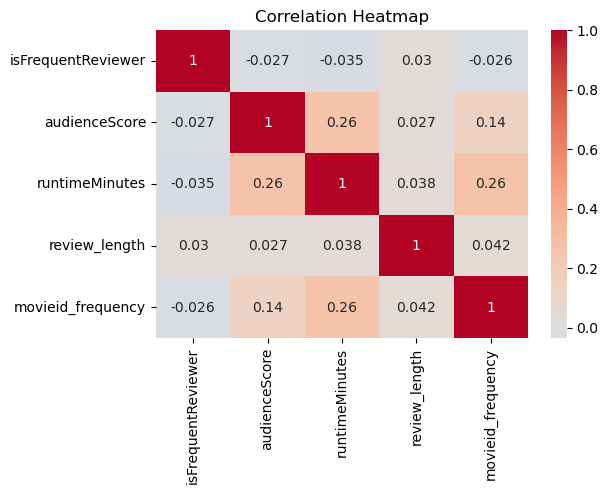

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train.corr()
print(corr_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Longer movies tend to have higher audience scores.
Longer reviews tend to have slightly higher audience scores.
There is no correlation between runtime minutes and review length.

## Review Text Analysis

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64


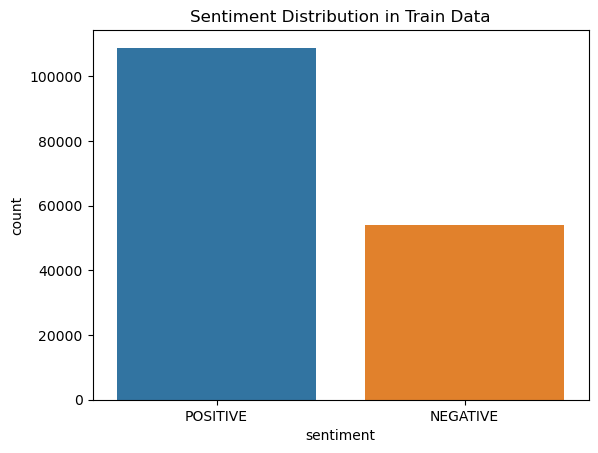

In [ ]:
sentiment_counts = train['sentiment'].value_counts()
print(sentiment_counts)

# Visualize the distribution of sentiments in the train dataset
sns.countplot(x='sentiment', data=train)
plt.title('Sentiment Distribution in Train Data')
plt.show()

1. The training data is imbalanced, with more positive reviews (60%) than negative reviews (40%).

2. This data imbalance may affect the accuracy of a model, as it may be more difficult for the model to learn to identify negative sentiment.

Here are several approaches to handle an unbalanced training dataset:

Resampling Techniques:

1. Resampling Techniques:  Oversampling/UnderSampling
2. Weighted Loss/Algorithms


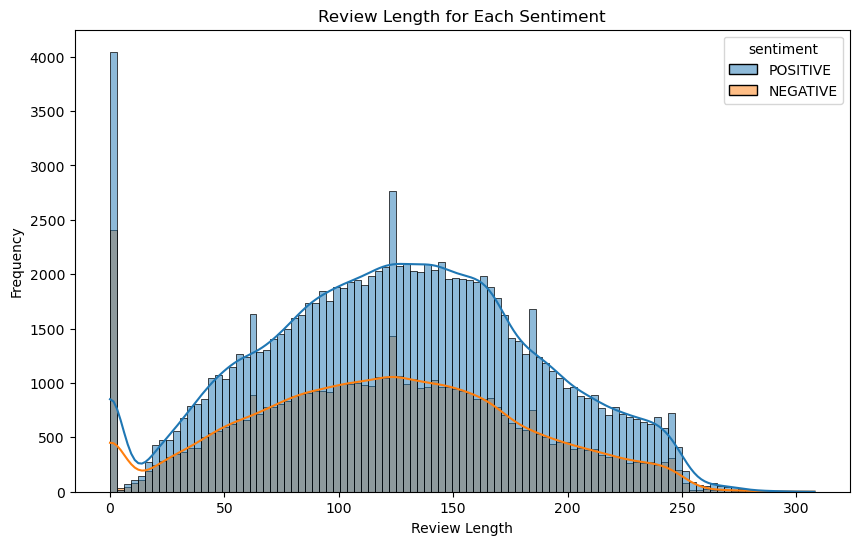

In [ ]:
# Create a new column for review lengths
train['review_length'] = train['reviewText'].apply(len)

# Visualize review length for each sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='review_length', hue='sentiment', kde=True)
plt.title('Review Length for Each Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

64954


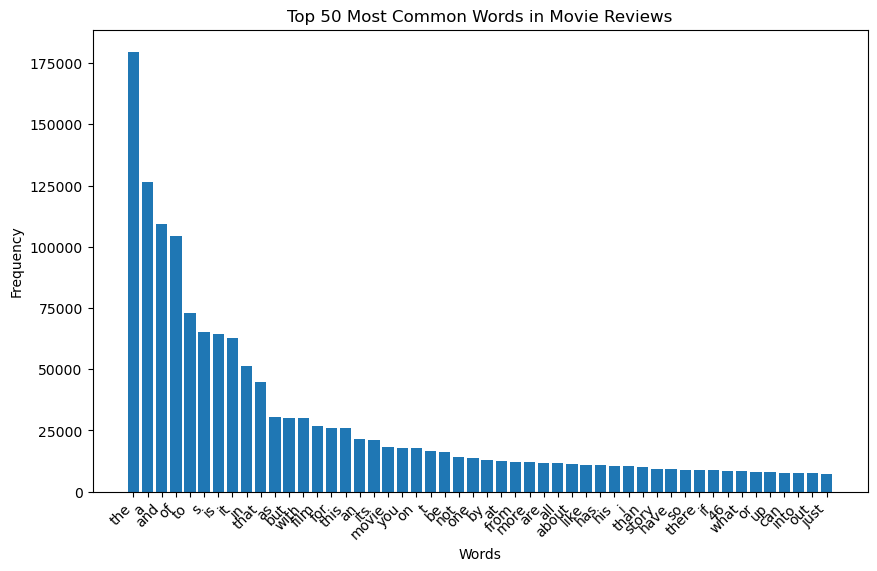

In [ ]:
word_freq ={}
for review in train['reviewTextTok']:
    for word in review:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

# Sort the word frequencies in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

most_common_words = sorted_word_freq[:50]

# Extract words and frequencies for plotting
common_words, frequencies = zip(*most_common_words)
print(len(word_freq))
# Visualization - Plot a bar chart for the top 20 most common words
plt.figure(figsize=(10, 6))
plt.bar(common_words, frequencies)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words in Movie Reviews')
plt.show()

In [ ]:
# Separate positive and negative reviews
positive_reviews = train[train['sentiment'] == 'POSITIVE']['reviewText'].values
negative_reviews = train[train['sentiment'] == 'NEGATIVE']['reviewText'].values


In [ ]:
# from wordcloud import WordCloud

# # Generate word clouds for positive and negative reviews
# wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
# wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# # Create a figure with 1 row and 2 columns for subplots
# fig, (positive, negative) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# # Plot the word clouds : Positive
# positive.imshow(wordcloud_positive, interpolation='bilinear')
# positive.set_title('Word Cloud - Positive Reviews')
# positive.axis('off')

# # Plot the word clouds : Negative
# negative.imshow(wordcloud_negative, interpolation='bilinear')
# negative.set_title('Word Cloud - Negative Reviews')
# negative.axis('off')
# plt.tight_layout()
# plt.show()

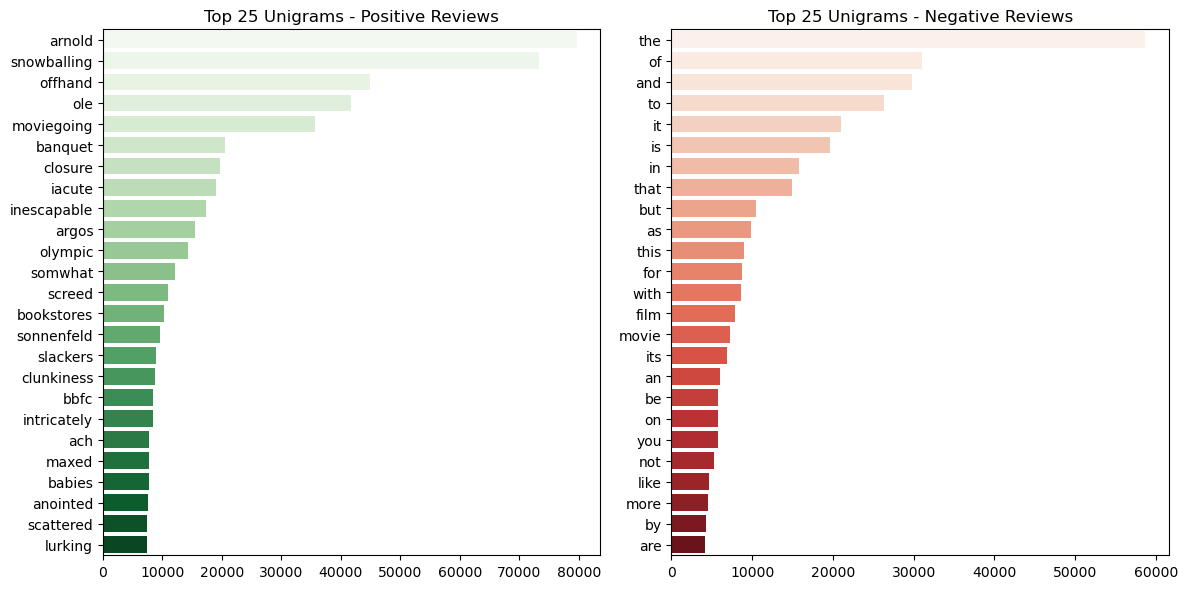

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
pos = positive_reviews.copy()
neg = negative_reviews.copy()
# Fit and transform the positive and negative reviews separately
positive_review_words = vectorizer.fit_transform(pos)
negative_review_words = vectorizer.fit_transform(neg)

# Get the most common unigrams for positive and negative reviews
positive_word_counts = positive_review_words.sum(axis=0)
positive_word_freq = [(word, positive_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
positive_word_freq = sorted(positive_word_freq, key=lambda x: x[1], reverse=True)[:25]

negative_word_counts = negative_review_words.sum(axis=0)
negative_word_freq = [(word, negative_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
negative_word_freq = sorted(negative_word_freq, key=lambda x: x[1], reverse=True)[:25]

# Plot the most common unigrams for positive and negative reviews with hue representing sentiment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[x[1] for x in positive_word_freq], y=[x[0] for x in positive_word_freq], palette='Greens')
plt.title('Top 25 Unigrams - Positive Reviews')

plt.subplot(1, 2, 2)
sns.barplot(x=[x[1] for x in negative_word_freq], y=[x[0] for x in negative_word_freq], palette='Reds')
plt.title('Top 25 Unigrams - Negative Reviews')

plt.tight_layout()
plt.show()


The image shows the number of positive and negative reviews for the top 20 unigrams. The positive reviews are higher than the negative reviews for most unigrams, but there are some unigrams where the negative reviews are higher. This suggests that the sentiment of movie reviews is generally positive, but there are some movies that are more polarizing than others.

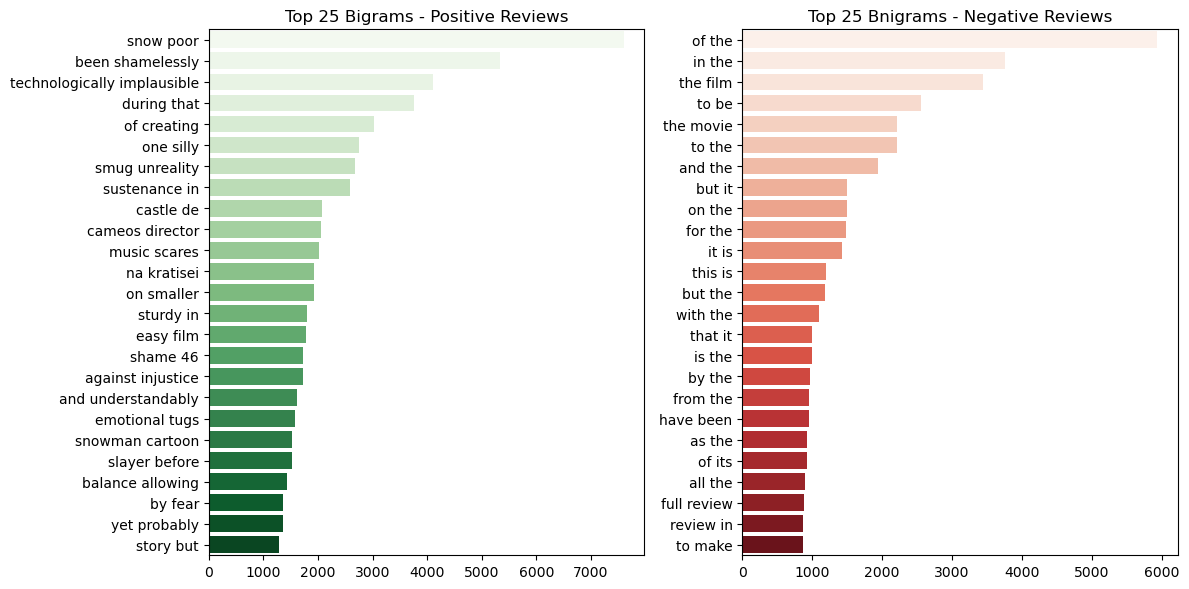

In [ ]:
# Create a CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))

pos = positive_reviews.copy()
neg = negative_reviews.copy()

# Fit and transform the positive and negative reviews separately
positive_review_words = vectorizer.fit_transform(pos)
negative_review_words = vectorizer.fit_transform(neg)

# Get the most common unigrams for positive and negative reviews
positive_word_counts = positive_review_words.sum(axis=0)
positive_word_freq = [(word, positive_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
positive_word_freq = sorted(positive_word_freq, key=lambda x: x[1], reverse=True)[:25]

negative_word_counts = negative_review_words.sum(axis=0)
negative_word_freq = [(word, negative_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
negative_word_freq = sorted(negative_word_freq, key=lambda x: x[1], reverse=True)[:25]

# Plot the most common unigrams for positive and negative reviews with hue representing sentiment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[x[1] for x in positive_word_freq], y=[x[0] for x in positive_word_freq], palette='Greens')
plt.title('Top 25 Bigrams - Positive Reviews')

plt.subplot(1, 2, 2)
sns.barplot(x=[x[1] for x in negative_word_freq], y=[x[0] for x in negative_word_freq], palette='Reds')
plt.title('Top 25 Bnigrams - Negative Reviews')

plt.tight_layout()
plt.show()


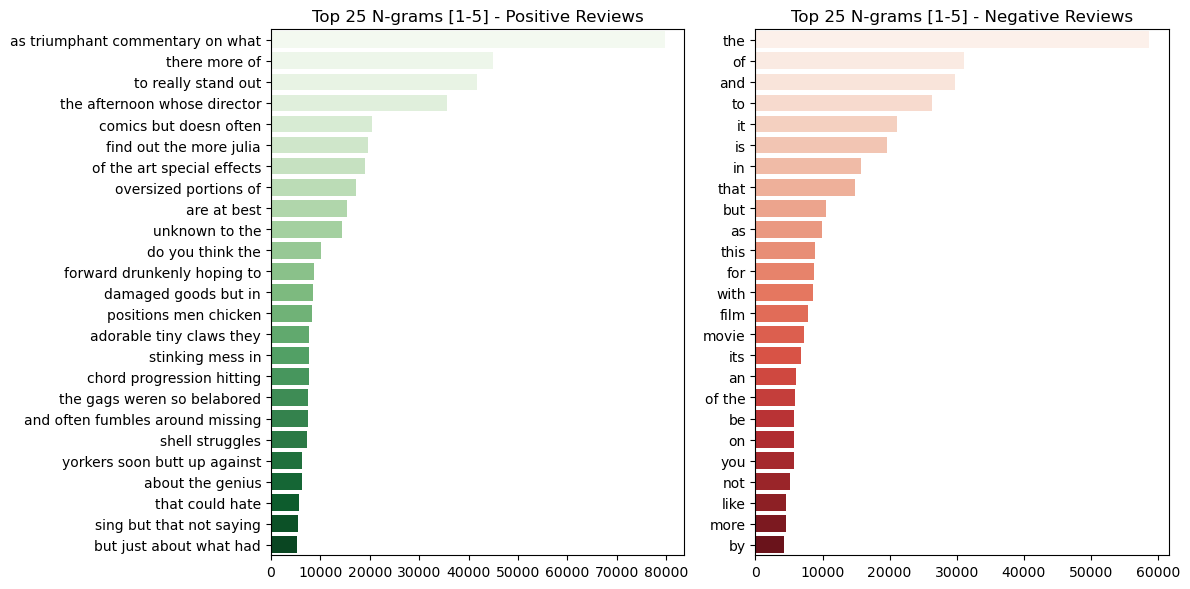

In [ ]:
# Create a CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1, 5))

pos = positive_reviews.copy()
neg = negative_reviews.copy()

# Fit and transform the positive and negative reviews separately
positive_review_words = vectorizer.fit_transform(pos)
negative_review_words = vectorizer.fit_transform(neg)

# Get the most common unigrams for positive and negative reviews
positive_word_counts = positive_review_words.sum(axis=0)
positive_word_freq = [(word, positive_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
positive_word_freq = sorted(positive_word_freq, key=lambda x: x[1], reverse=True)[:25]

negative_word_counts = negative_review_words.sum(axis=0)
negative_word_freq = [(word, negative_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
negative_word_freq = sorted(negative_word_freq, key=lambda x: x[1], reverse=True)[:25]

# Plot the most common unigrams for positive and negative reviews with hue representing sentiment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[x[1] for x in positive_word_freq], y=[x[0] for x in positive_word_freq], palette='Greens')
plt.title('Top 25 N-grams [1-5] - Positive Reviews')

plt.subplot(1, 2, 2)
sns.barplot(x=[x[1] for x in negative_word_freq], y=[x[0] for x in negative_word_freq], palette='Reds')
plt.title('Top 25 N-grams [1-5] - Negative Reviews')

plt.tight_layout()
plt.show()


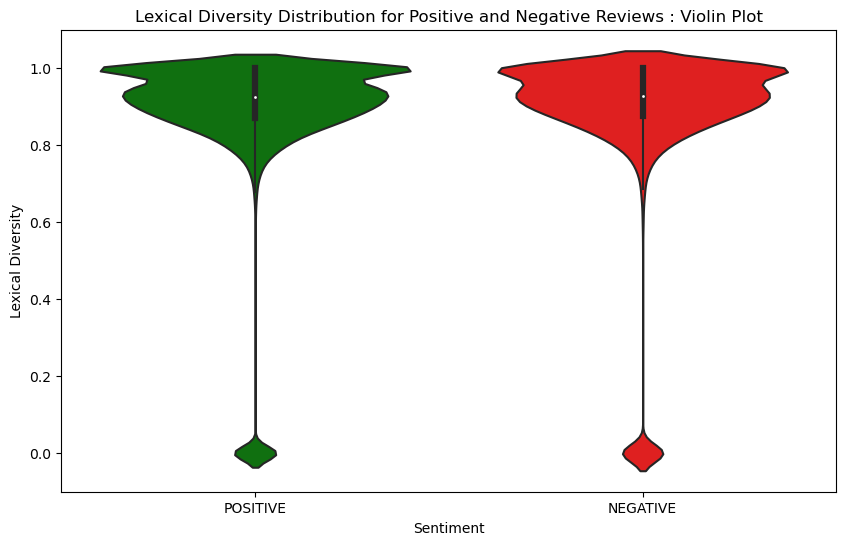

In [ ]:
def lexical_diversity(text):
    unique_words = set(text)
    if len(text) > 0:
        return len(unique_words) / len(text)
    return 0.0

# Calculate lexical diversity for each review
train['lexical_diversity'] = train['reviewTextTok'].apply(lexical_diversity)

# Separate positive and negative reviews
positive_reviews = train[train['sentiment'] == 'POSITIVE']['lexical_diversity']
negative_reviews = train[train['sentiment'] == 'NEGATIVE']['lexical_diversity']

# EDA: Compare the distribution of lexical diversity for positive and negative reviews
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='lexical_diversity', data=train, palette={'POSITIVE': 'green', 'NEGATIVE': 'red'})
plt.xlabel('Sentiment')
plt.ylabel('Lexical Diversity')
plt.title('Lexical Diversity Distribution for Positive and Negative Reviews : Violin Plot')
plt.show()

The image shows the lexical diversity distribution for positive and negative reviews. The lexical diversity is higher for positive reviews than for negative reviews. This suggests that positive reviews tend to use a wider variety of words than negative reviews.

## Genere Analysis

drama          73689
comedy         49057
mystery        32040
thriller       32040
action         24717
adventure      21934
fantasy        14814
romance        14812
horror         14040
documentary    11427
sci-fi         11178
kids            9644
family          9644
crime           9316
biography       8554
history         7238
animation       6394
lgbtq+          3987
                3631
war             3182
musical         3110
music           2519
western         1711
holiday         1588
anime            717
sports            16
fitness           11
stand-up           9
nature             4
short              3
other              2
foreign            2
news               1
dtype: int64


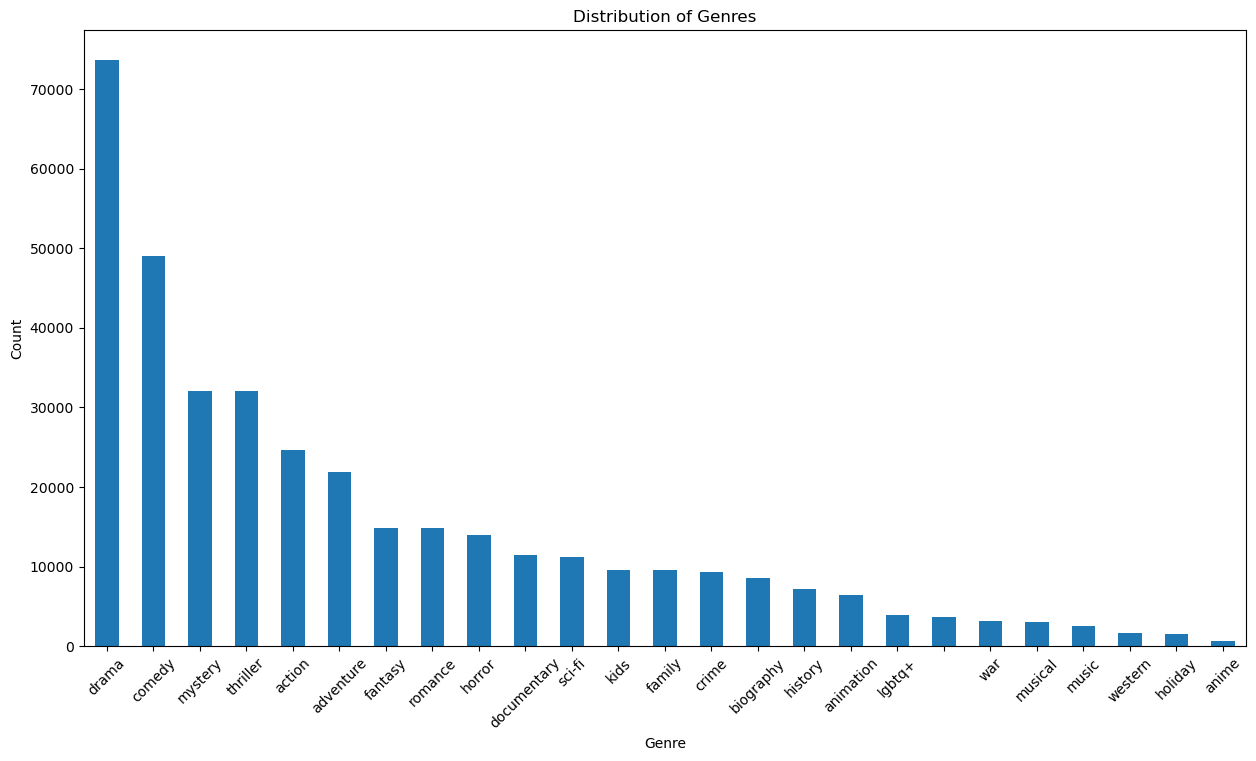

In [ ]:
# Genre Analysis
genres = train['genre'].str.split(' ', expand=True).stack().value_counts()
print(genres)

# Bar Plot for Genre Distribution
plt.figure(figsize=(15, 8))
genres[:25].plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

The image shows the distribution of movieid by genre. The most popular genres are drama, comedy, and mystery. This suggests that people are most interested in movieid that are entertaining and suspenseful.

/tmp/ipykernel_20/2263039328.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_analysis = genre_analysis.append({'Genre': genre, 'Positive': positive_count, 'Negative': negative_count}, ignore_index=True)
/tmp/ipykernel_20/2263039328.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_analysis = genre_analysis.append({'Genre': genre, 'Positive': positive_count, 'Negative': negative_count}, ignore_index=True)
/tmp/ipykernel_20/2263039328.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_analysis = genre_analysis.append({'Genre': genre, 'Positive': positive_count, 'Negative': negative_count}, ignore_index=True)
/tmp/ipykernel_20/2263039328.py:9: FutureWarning: The frame.append method is deprecated and wi

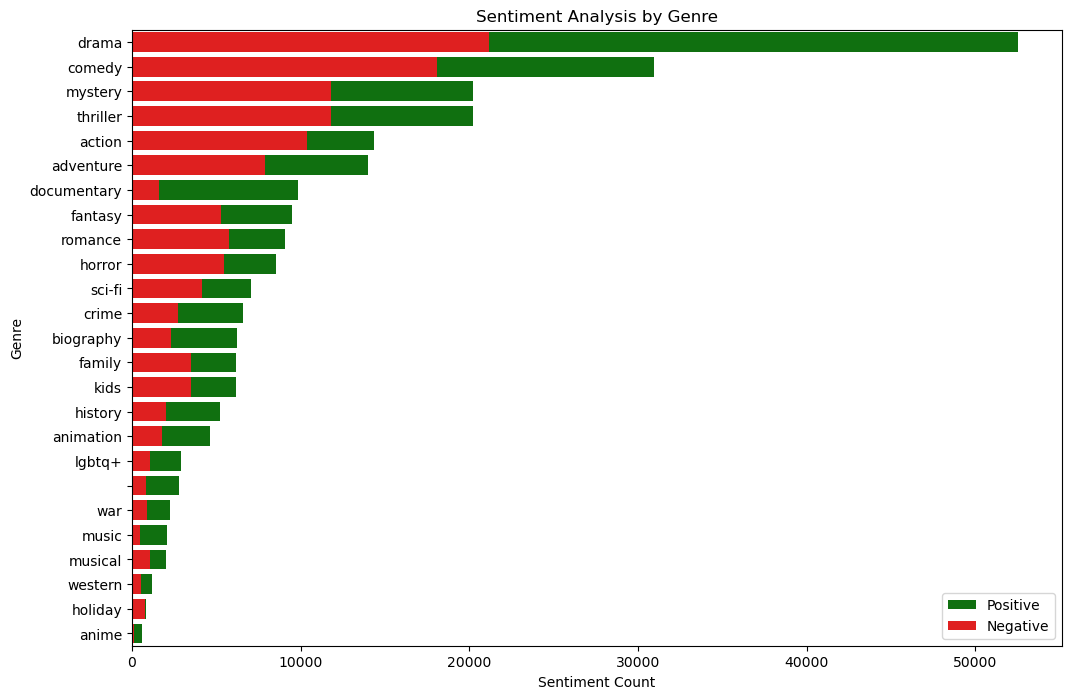

In [ ]:

# Create a new DataFrame to store genre analysis results
genre_analysis = pd.DataFrame(columns=['Genre', 'Positive', 'Negative'])

# Iterate through unique genres and calculate sentiment distribution for each
unique_genres = list(set(genre for sublist in train['genre'].apply(lambda x: x.split(' ')) for genre in sublist))
for genre in unique_genres:
    positive_count = train[(train['sentiment'] == 'POSITIVE') & (train['genre'].apply(lambda x: genre in x.split(' ')))].shape[0]
    negative_count = train[(train['sentiment'] == 'NEGATIVE') & (train['genre'].apply(lambda x: genre in x.split(' ')))].shape[0]
    genre_analysis = genre_analysis.append({'Genre': genre, 'Positive': positive_count, 'Negative': negative_count}, ignore_index=True)

# # Sort the genre analysis results by positive sentiment count
genre_analysis = genre_analysis.sort_values(by='Positive', ascending=False)

# Plot the genre analysis
plt.figure(figsize=(12, 8))
sns.barplot(x='Positive', y='Genre', data=genre_analysis[:25], color='green', label='Positive')
sns.barplot(x='Negative', y='Genre', data=genre_analysis[:25], color='red', label='Negative')
plt.xlabel('Sentiment Count')
plt.ylabel('Genre')
plt.title('Sentiment Analysis by Genre')
plt.legend()
plt.show()


The image shows the sentiment analysis of movie reviews by genre. Drama, comedy, and mystery are the most positively reviewed genres, while action, adventure, and horror are the most negatively reviewed genres. This suggests that people generally enjoy movies that are more character-driven and less action-packed.

## Director Analysis

                  3631
billydiaz          744
lindashuffler      569
micheleburton      566
arnulfosewell      529
                  ... 
jamieriggle          1
lindaforrest         1
kimembrey            1
donaldrobbins        1
tawandaballard       1
Name: director, Length: 8324, dtype: int64


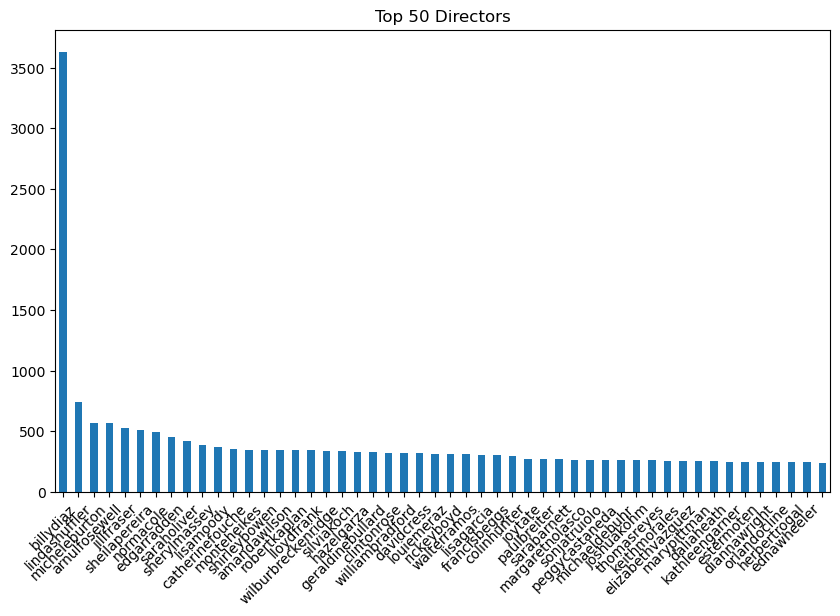

In [ ]:
# Director Analysis
director_counts = train['director'].value_counts()
print(director_counts)

# Director visulization
plt.figure(figsize=(10, 6))
director_counts[:50].plot(kind='bar')
plt.title('Top 50 Directors')
plt.xticks(rotation=45, ha='right')
plt.show()

## distribution of frequent reviewers

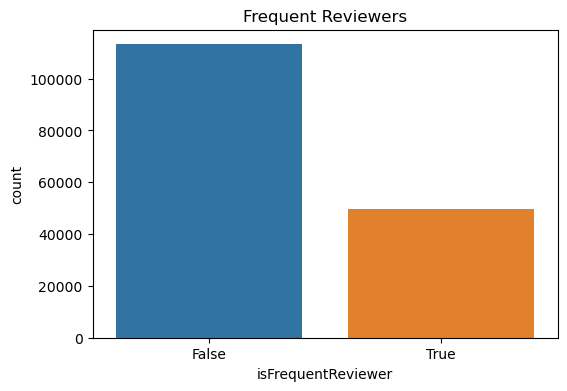

In [ ]:
# the distribution of frequent reviewers.
plt.figure(figsize=(6, 4))
sns.countplot(x='isFrequentReviewer', data=train)
plt.title('Frequent Reviewers')
plt.show()

There are less frequent revierer in the train dataset

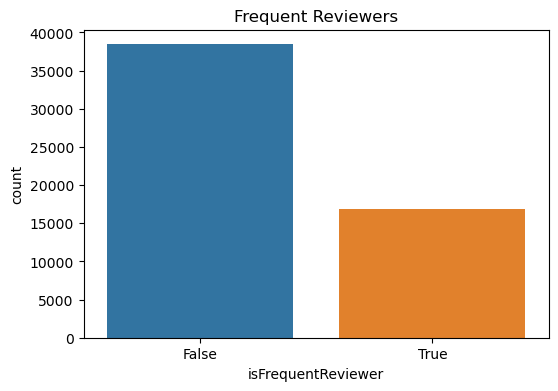

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFrequentReviewer', data=test)
plt.title('Frequent Reviewers')
plt.show()

## Audience Score Distribution

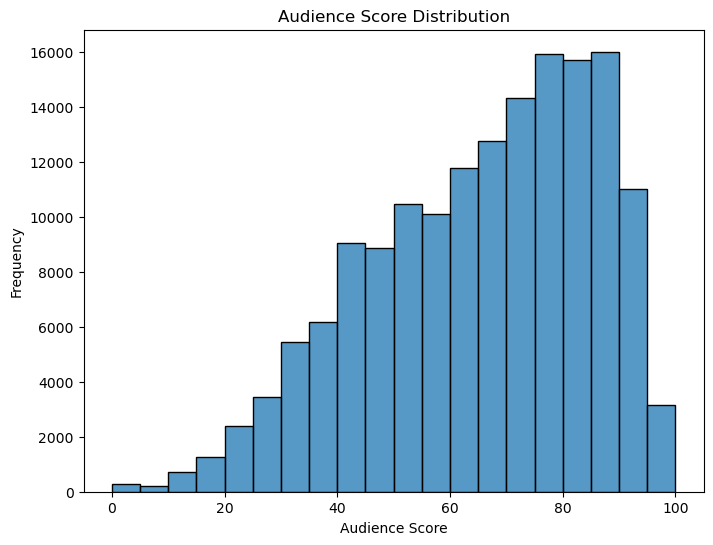

In [ ]:
# Audience Score Distribution:
plt.figure(figsize=(8, 6))
sns.histplot(train['audienceScore'], bins=20)
plt.title('Audience Score Distribution')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.show()

The majority of the audience (60%) gave  scores of 80 or higher.

20% of the audience gave score of 60-79.

10% of the audience gavescores of 40-59.

10% of the audience gave scores of 20 or lower.

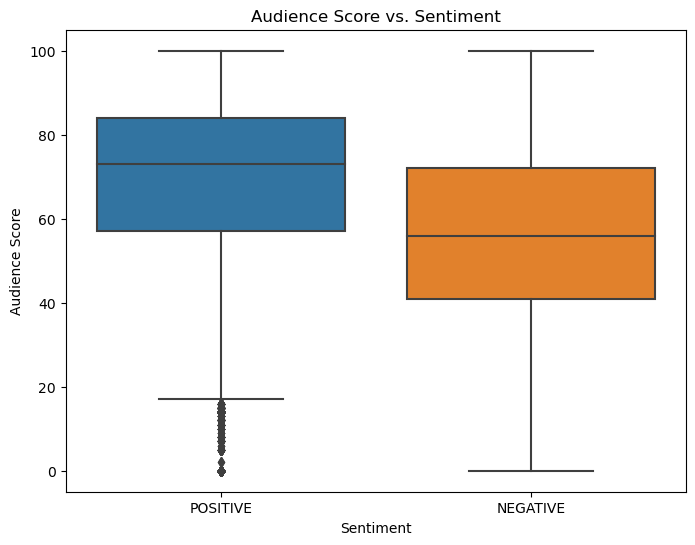

In [ ]:
#  Audience Score vs. Sentiment:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='audienceScore', data=train)
plt.title('Audience Score vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.show()

The box plot shows the difference between positive and negative sentiment scores. The positive sentiment score is higher than the negative sentiment score. This is because the majority of the audience gave the movie a positive review. However, there are a few outliers on both the positive and negative sides, suggesting that some people had very strong opinions about the movie.

## RunTime analysis

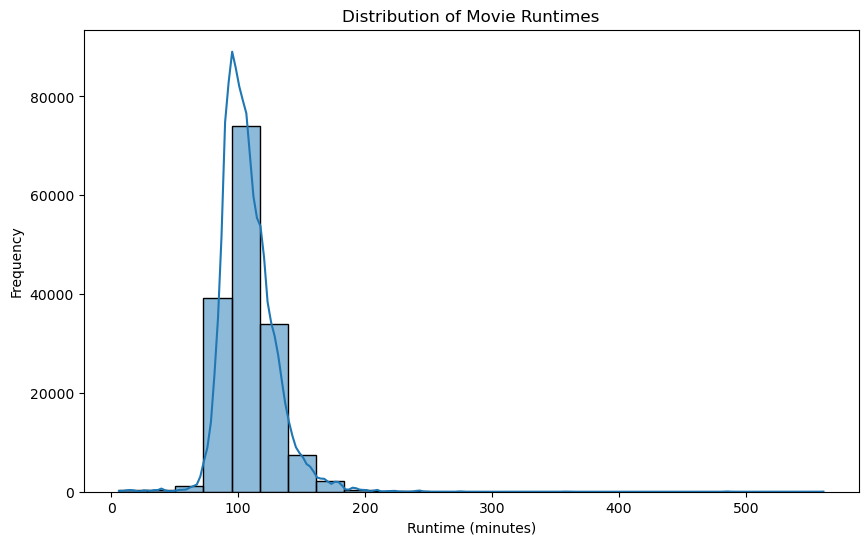

In [ ]:
# Create a histogram of movie runtimeMinutes
plt.figure(figsize=(10, 6))
sns.histplot(train['runtimeMinutes'], bins=25, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

The image shows the distribution of movie runtimes over time. The most common runtime is between 90 and 120 minutes. The distribution is relatively even, with no major spikes or dips. This suggests that there is no clear trend in the length of movies over time.

The image also shows that there are a small number of movies that are much longer or shorter than the average runtime. These movies are likely to be outliers, and they may not be representative of the overall trend.

Overall, the image suggests that the length of movies has remained relatively consistent over time. There are no major trends in the data, and the distribution is relatively even.

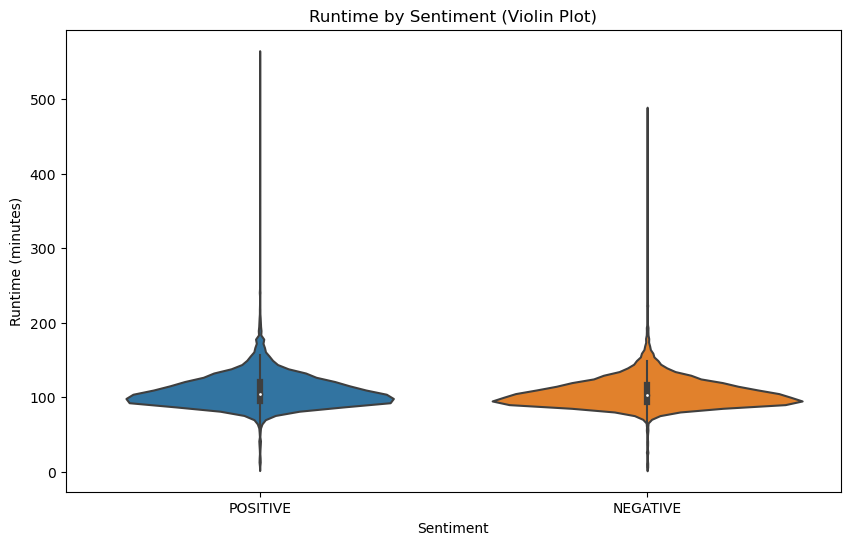

In [ ]:
# Create a violin plot of runtimeMinutes by sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='runtimeMinutes', data=train)
plt.title('Runtime by Sentiment (Violin Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Runtime (minutes)')
plt.show()

The image shows the distribution of movie runtimes by sentiment. The positive sentiment movies have a higher average runtime than the negative sentiment movies. This suggests that people tend to enjoy longer movies when they are positive about them.

The image also shows that there is a lot of overlap between the two distributions. This suggests that there is no clear correlation between movie runtime and sentiment.

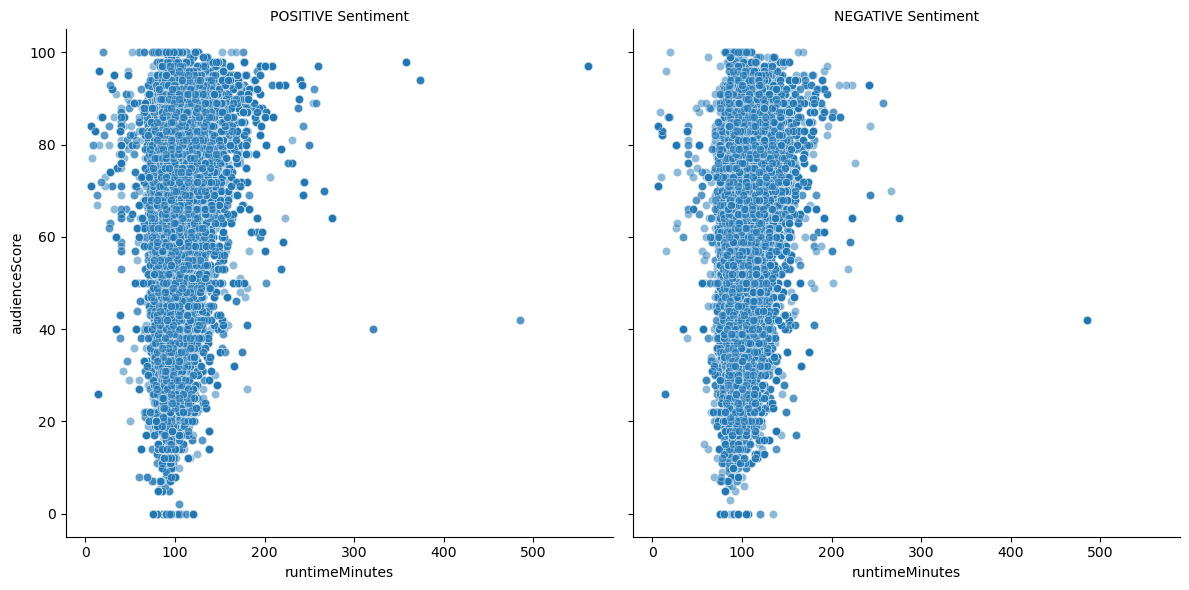

In [ ]:
grid = sns.FacetGrid(train, col='sentiment', height=6)
grid.map(sns.scatterplot, 'runtimeMinutes', 'audienceScore', alpha=0.5)
grid.set_titles(col_template="{col_name} Sentiment")
plt.show()

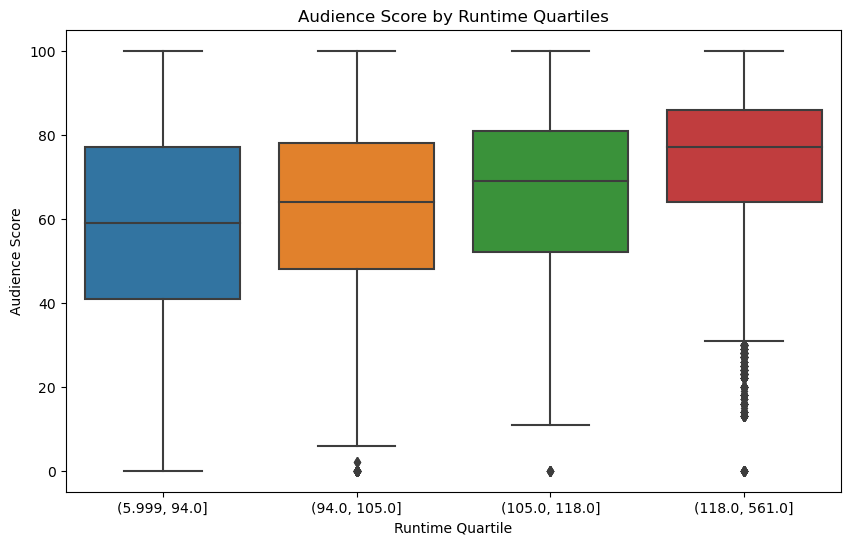

In [ ]:
# Create a box plot of audience score by runtime quartiles
train['runtime_quartile'] = pd.qcut(train['runtimeMinutes'], q=4)
plt.figure(figsize=(10, 6))
sns.boxplot(x='runtime_quartile', y='audienceScore', data=train)
plt.title('Audience Score by Runtime Quartiles')
plt.xlabel('Runtime Quartile')
plt.ylabel('Audience Score')
plt.show()

# Remove the temporary 'runtime_quartile' column
train.drop(columns=['runtime_quartile'], inplace=True)


The image shows the audience score by runtime quartiles. The audience score is a measure of the number of people who attended the event and rated it positively. The image shows that the audience score is highest for movies with runtimes between 90 and 120 minutes. This suggests that people tend to enjoy movies that are of a moderate length.

The image also shows that the audience score is lower for movies with runtimes that are shorter or longer than 90 to 120 minutes. This suggests that people may find movies that are too short or too long to be less enjoyable.

## Orignal Language Analysis

english                 135348
                          3631
frenchfrance              3047
englishunitedkingdom      2926
frenchcanada              2295
                         ...  
gujarati                     3
amharic                      2
somali                       2
kannada                      1
latvian                      1
Name: originalLanguage, Length: 86, dtype: int64 
 Total Uniquie Language: 86


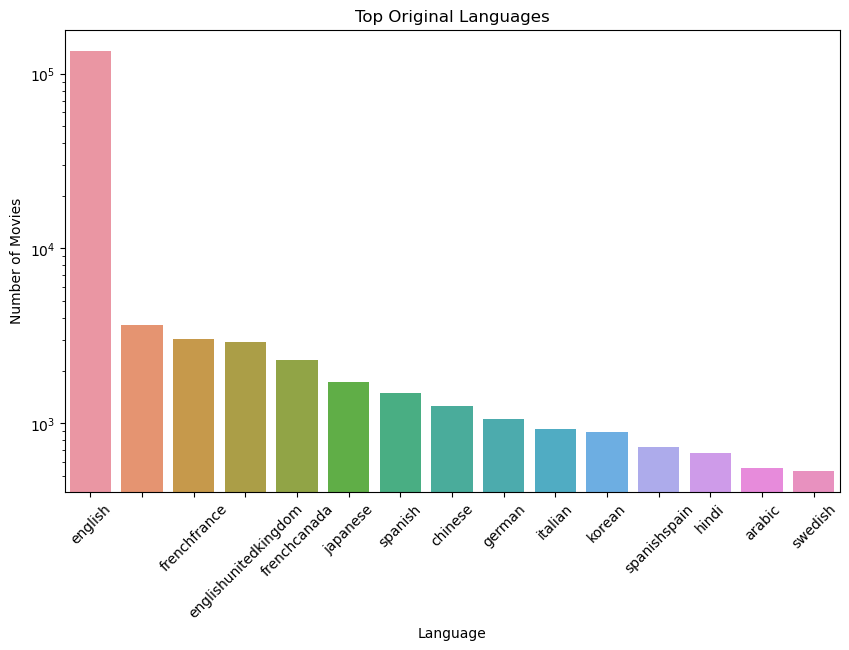

In [ ]:
languages = train['originalLanguage'].value_counts()
print(languages, '\n', 'Total Uniquie Language:', len(languages))

# Create a bar plot of top original languages
plt.figure(figsize=(10, 6))
sns.barplot(x=languages[:15].index, y=languages[:15].values)
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.title('Top Original Languages')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

The image shows the top 10 original languages for foreign films. English is the most popular language, followed by French, Japanese, and Spanish. This suggests that English-speaking countries are the largest consumers of foreign films.

The image also shows that there is a diversity of languages represented in the top 10. This suggests that there is a global appetite for foreign films, and that people are interested in watching movies from different cultures.

Overall, the image suggests that English is the most popular language for foreign films, but that there is a growing interest in films from other languages.

## Other Visulisation Analysis

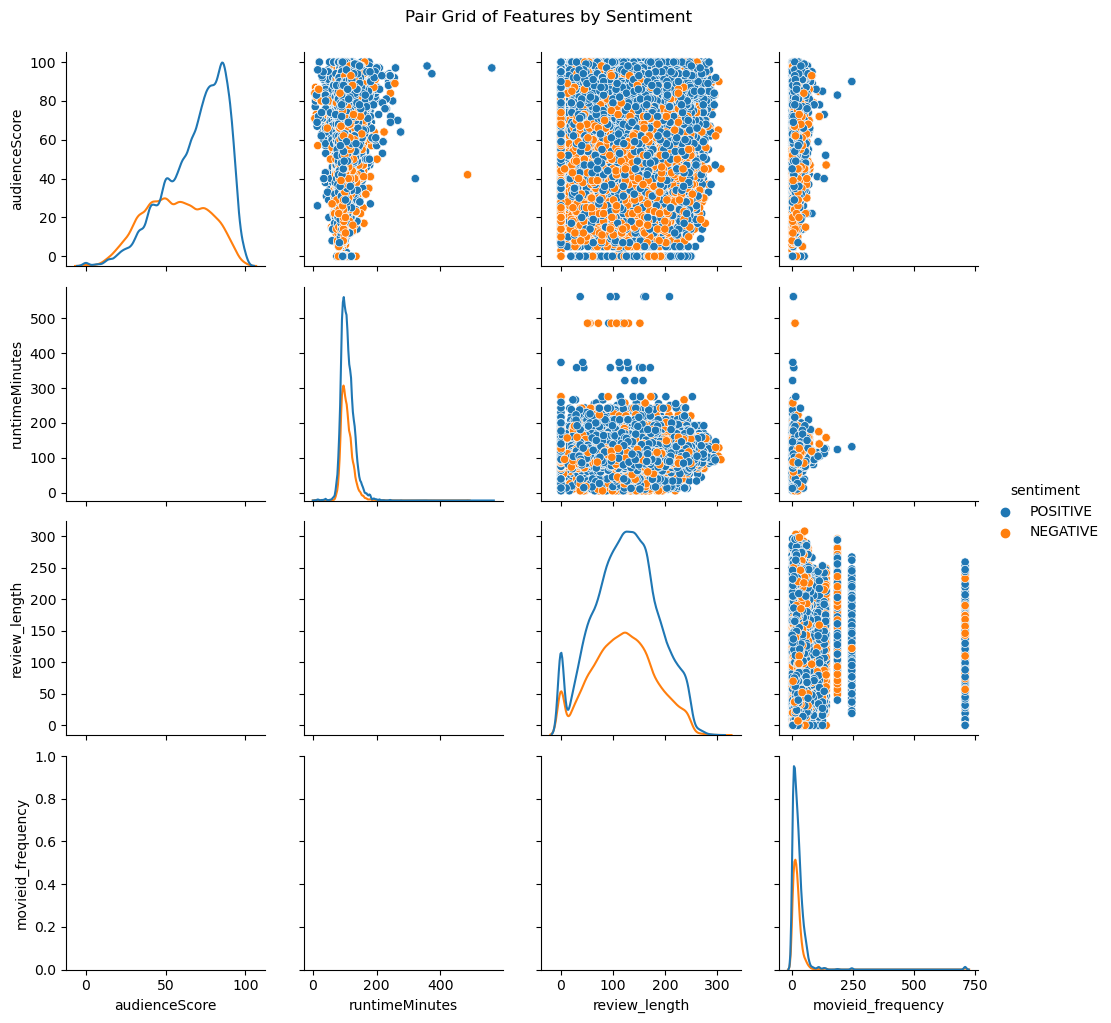

In [ ]:
# Pair Grid with Multiple Features

pair_features = ['audienceScore', 'runtimeMinutes', 'review_length', 'movieid_frequency']
pair_grid = sns.PairGrid(train, vars=pair_features, hue='sentiment', diag_sharey=False)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_diag(sns.kdeplot)
pair_grid.add_legend()
plt.suptitle('Pair Grid of Features by Sentiment', y=1.02)
plt.show()

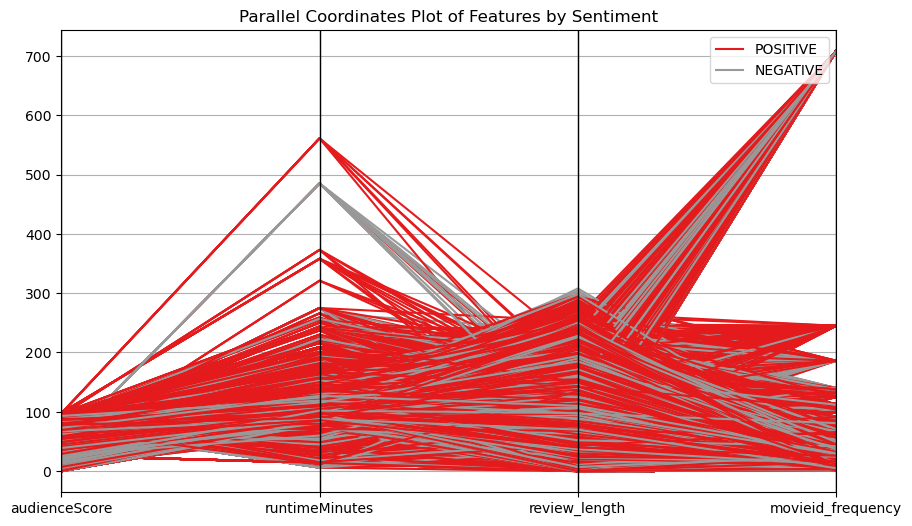

In [ ]:
#Parallel Coordinates Plot

from pandas.plotting import parallel_coordinates

parallel_data = train[['audienceScore', 'runtimeMinutes', 'review_length', 'movieid_frequency', 'sentiment']]
plt.figure(figsize=(10, 6))
parallel_coordinates(parallel_data, 'sentiment', colormap=plt.get_cmap("Set1"))
plt.title('Parallel Coordinates Plot of Features by Sentiment')
plt.show()

The image shows a parallel coordinate plot of features by sentiment. The red lines represent positive sentiments, while the gray lines represent negative sentiments. The features are:

AudienceScore: A rating from 0 to 100, where 100 is the highest possible rating.
RuntimeMinutes: The length of the movie in minutes.
ReviewLength: The number of words in the review.
MovieIDFrequency: The number of times the movie has been reviewed.
The image shows that there is a positive correlation between audience score and review length. This suggests that longer reviews tend to be more positive. There is also a positive correlation between audience score and movie ID frequency. This suggests that movies that are reviewed more often tend to be more positive.

However, there is no correlation between audience score and runtime minutes. This suggests that the length of a movie does not have a significant impact on its audience score.

Overall, the image suggests that longer reviews and movies that are reviewed more often tend to be more positive. There is no correlation between audience score and runtime minutes.

Here are some additional observations:

The red lines are generally higher than the gray lines, which suggests that there are more positive reviews than negative reviews.
The lines for audience score and review length are the most closely correlated.
The lines for audience score and runtime minutes are the least closely correlated.

<Figure size 1000x600 with 0 Axes>

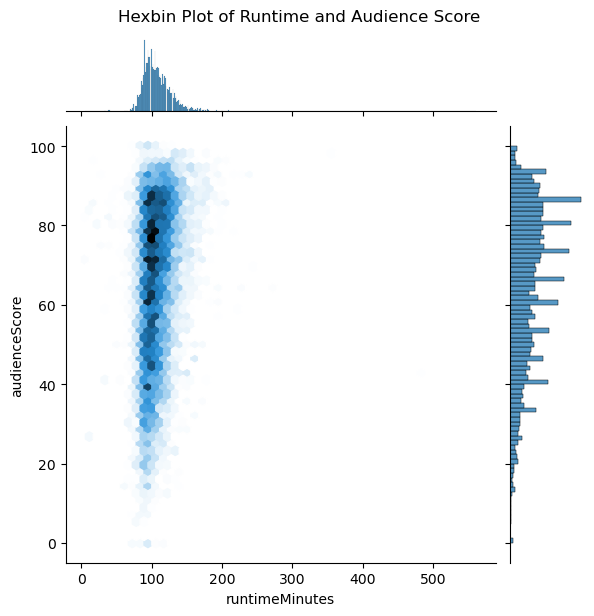

In [ ]:
# Hexbin Plot of Runtime and Audience Score:

plt.figure(figsize=(10, 6))
sns.jointplot(x='runtimeMinutes', y='audienceScore', kind='hex', data=train)
plt.suptitle('Hexbin Plot of Runtime and Audience Score', y=1.02)
plt.show()

The image shows a hexbin plot of runtime and audience score. The darker the color, the more movies there are in that bin. The image suggests that there is a positive correlation between runtime and audience score, with more movies with higher audience scores having longer runtimes.

However, there are also a number of movies with high audience scores that have shorter runtimes. This suggests that runtime is not the only factor that determines audience score. Other factors, such as the quality of the movie, the acting, and the story, also play a role.

Overall, the image suggests that longer movies tend to have higher audience scores, but there are also a number of exceptions.

In [ ]:
del neg
del pos
del negative_review_words
del positive_review_words
del positive_reviews
del negative_reviews
del parallel_data

# train-Test split

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into features (X) and target labels (y)
x = train[['movieid',	'isFrequentReviewer', 'reviewText',	'audienceScore',	'runtimeMinutes',	'genre', 'director',	'review_length',	'movieid_frequency']]

y = train['sentiment']

# Split the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
# Print the sizes of the training and test sets
print("Training set size:", x_train.shape, y_train.shape)
print("Test set size:", x_test.shape, y_test.shape)

Training set size: (130206, 9) (130206,)
Test set size: (32552, 9) (32552,)


In [ ]:
test = test[['movieid',	'isFrequentReviewer', 'reviewText',	'audienceScore',	'runtimeMinutes',	'genre', 'director',	'review_length',	'movieid_frequency']]
test.shape

(55315, 9)

# Feature Engineering

## Imputers

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Impute 'audienceScore' column using IterativeImputer
iterative_imputer = IterativeImputer()
x_train['audienceScore'] = iterative_imputer.fit_transform(x_train[['audienceScore']])

# Create a KNNImputer instance
knimputer = KNNImputer(n_neighbors=5)
x_train['runtimeMinutes'] = knimputer.fit_transform(x_train[['runtimeMinutes']])

In [ ]:
#Imputing x_test Data
x_test['audienceScore'] = iterative_imputer.transform(x_test[['audienceScore']])
x_test['runtimeMinutes'] = knimputer.transform(x_test[['runtimeMinutes']])

#Imputing Test Data
test['audienceScore'] = iterative_imputer.transform(test[['audienceScore']])
test['runtimeMinutes'] = knimputer.transform(test[['runtimeMinutes']])

## Scalars

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, FunctionTransformer

# Scaler for audienceScore
mms = MinMaxScaler()

# Scaler for runtimeMinutes
ss =  StandardScaler()

# Scaler for review_length
mas = MaxAbsScaler()

# Scaler for movieid_frequency
ft = FunctionTransformer(func= np.log1p, inverse_func= np.expm1)


In [ ]:
from sklearn.compose import ColumnTransformer

col_sca = ColumnTransformer([('aud', mms, ['audienceScore']),
                            ('run', ss, ['runtimeMinutes']),
                            ('len', mas, ['review_length']),
                             ('mov', ft, ['movieid_frequency'])],
                            n_jobs = -1,
                            verbose_feature_names_out= False,)

## Vectorisers

### reviewText

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer

# Bag of Words with 50,000 features (vocabulary size)
vectorizer_50000 = CountVectorizer(max_features=50000)
col_v50k = ColumnTransformer([('v50k', vectorizer_50000, 'reviewText')],
                             n_jobs = -1,
                             verbose_feature_names_out= False)

# Bag of Words with 25,000 features (vocabulary size)
vectorizer_25000 = CountVectorizer(max_features=25000)
col_v25k = ColumnTransformer([('v25k', vectorizer_25000, 'reviewText')],
                             n_jobs = -1,
                             verbose_feature_names_out= False)

# # Bag of Words with words occuring more than 5 times as features (vocabulary size)
# vectorizer_5x = CountVectorizer(min_df=5, max_df = 10)
# col_v5x = ColumnTransformer([('v5x', vectorizer_5x, ['reviewText'])],
#                             n_jobs = -1,
#                             verbose_feature_names_out= False)

# Unigram Modeling with TFIDF
tfidf_uni = TfidfVectorizer(ngram_range=(1, 1))
col_uni = ColumnTransformer([('uni', tfidf_uni, 'reviewText')],
                            n_jobs = -1,
                            verbose_feature_names_out= False)

# Bigram Modeling with TFIDF and min occurance 2
tfidf_bi = TfidfVectorizer(ngram_range=(2, 2), min_df = 2)
col_bi = ColumnTransformer([('bi', tfidf_bi, 'reviewText')],
                           n_jobs = -1,
                            verbose_feature_names_out= False)

# Uni-Bigram Mixed Modeling with TFIDF
tfidf_unbi = TfidfVectorizer(ngram_range=(1, 2))
col_unbi = ColumnTransformer([('unbi', tfidf_unbi, 'reviewText')],
                            n_jobs = -1,
                            verbose_feature_names_out= False)

# N-gram Mixed Modeling N-[1,5] with TFIDF and min occurance 3
tfidf_ng = TfidfVectorizer(ngram_range=(1, 5), min_df = 3)
col_ng = ColumnTransformer([('ng', tfidf_ng, 'reviewText')],
                            n_jobs = -1,
                            verbose_feature_names_out= False)


### movieid

In [ ]:
#TFIDF Modeling for movieid
tfidf_mov = TfidfVectorizer()
col_mov = ColumnTransformer([('mov', tfidf_mov, 'movieid')],
                            n_jobs = -1,
                             verbose_feature_names_out= False,)

### genre

In [ ]:
vec_gen = CountVectorizer()
col_gen = ColumnTransformer([('gen', vec_gen, 'genre')],
                            n_jobs = -1,
                             verbose_feature_names_out= False,)

## Encoders

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder

# Encoder for director feature
te = TargetEncoder(random_state = 21)

# Encoder for isFrequentReviewer
ode = OrdinalEncoder()

In [ ]:
col_en = ColumnTransformer([('dir', te, ['director']),
                            ('isf', ode, ['isFrequentReviewer'])],
                           n_jobs = -1,
                            verbose_feature_names_out= False,)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoder for target
le = LabelEncoder()

y_train_en = le.fit_transform(y_train)
y_test_en = le.transform(y_test)

## Preprocessors : Feature Union

In [ ]:
from sklearn.pipeline import FeatureUnion

# with 50,000 features
pre1 = FeatureUnion([('col_v50k', col_v50k ),
                     ('col_mov', col_mov),
                     ('col_gen', col_gen),
                     ('col_sca', col_sca),
                     ('col_en', col_en)],
                    n_jobs = -1)

# with 25,000 features
pre2 = FeatureUnion([('col_v25k', col_v25k ),
                     ('col_mov', col_mov),
                     ('col_gen', col_gen),
                     ('col_sca', col_sca),
                     ('col_en', col_en)],
                    n_jobs = -1)

# # with words occuring more than 5 times
# pre3 = FeatureUnion([('col_v5x', col_v5x),
#                      ('col_mov', col_mov),
#                      ('col_gen', col_gen),
#                      ('col_sca', col_sca),
#                      ('col_en', col_en)],
#                     n_jobs = -1)

# Unigram Modeling with TFIDF
pre4 = FeatureUnion([('col_uni', col_uni),
                     ('col_mov', col_mov),
                     ('col_gen', col_gen),
                     ('col_sca', col_sca),
                     ('col_en', col_en)],
                    n_jobs = -1)

# Bigram Modeling with TFIDF and min occurance 2
pre5 = FeatureUnion([('col_bi', col_bi),
                     ('col_mov', col_mov),
                     ('col_gen', col_gen),
                     ('col_sca', col_sca),
                     ('col_en', col_en)],
                    n_jobs = -1)

# Uni-Bigram Mixed Modeling with TFIDF
pre6 = FeatureUnion([('col_unbi', col_unbi),
                     ('col_mov', col_mov),
                     ('col_gen', col_gen),
                     ('col_sca', col_sca),
                     ('col_en', col_en)],
                    n_jobs = -1)

# N-gram Mixed Modeling N-[1,5] with TFIDF and min occurance 3
pre7 = FeatureUnion([('col_ng', col_ng),
                     ('col_mov', col_mov),
                     ('col_gen', col_gen),
                     ('col_sca', col_sca),
                     ('col_en', col_en)],
                    n_jobs = -1)


# Model

In [ ]:
model_test_scores = {}
model_train_scores = {}
model_scores = {}
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
scoring = make_scorer(f1_score, average='micro')

## Evalution Functions

### Model Eval

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, auc
from sklearn.model_selection import StratifiedKFold
from scipy.stats import sem
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, y_train, X_test, y_test, cv_scores, confidence_level=0.95):
    try:
        # Evaluate on the test data
        y_pred_test = model.predict(X_test)

        # Evaluate using cross-validation on the training data
        bootstrap_scores = cv_scores

        # Calculate confidence interval for training score
        confidence_interval = sem(bootstrap_scores) * 1.96  # 95% confidence

        # Calculate metrics
        confusion = confusion_matrix(y_test, y_pred_test)

        # Print evaluation results
        print("Confusion Matrix:\n", confusion)
        print('**************************************************************************************************')
        print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
        print('**************************************************************************************************')

        try:
            # Calculate ROC AUC only if predict_proba is available
            y_pred_proba_test = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba_test)

            print("\nROC AUC Score:", roc_auc)

            # Plot ROC curve
            plt.figure(figsize=(8, 6))
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
            plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic')
            plt.legend(loc="lower right")
            plt.show()
        except AttributeError:
            print("\nROC AUC calculation is not available for this model.")

        try:
            # Calculate Precision-Recall curve only if predict_proba is available
            precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_test)

            # Plot Precision-Recall curve
            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.legend(loc="lower left")
            plt.show()
        except AttributeError:
            print("\nPrecision-Recall curve calculation is not available for this model.")

        try:
          print('**************************************************************************************************')
          # Print training score with confidence interval
          print("\nTraining Score: {:.3f} +/- {:.3f}".format(model.score(X_train, y_train), confidence_interval))
        except AttributeError:
          print("\nPTraining Score is not available for this model.")

    except Exception as e:
        print("An error occurred:", str(e))



### Model Comparizon

In [ ]:
def plot_model_comparison(train_scores, test_scores, train_mean, test_mean, model_name):
    models = list(train_scores.keys())
    tr_scores = list(train_scores.values())
    t_scores = list(test_scores.values())

    plt.figure(figsize=(10, 6))
    plt.plot(models, tr_scores, marker='o', label='Train Scores')
    plt.plot(models, t_scores, marker='o', label='Test Scores')
    plt.axhline(y=train_mean, color='r', linestyle='--', label='Train Mean')
    plt.axhline(y=test_mean, color='g', linestyle='--', label='Test Mean')
    plt.title(f"Model Comparison for {model_name}")
    plt.xlabel('Models')
    plt.ylabel('Accuracy Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 1. Logistic Regression

In [ ]:
log_reg = {}
log_reg_train = {}

### 1.1 Logistic Regression : 50K Words

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, f1_score

estimator = LogisticRegression(solver='saga', random_state = 21,  penalty = 'l2', fit_intercept = True, max_iter = 1500)

pipe1 = Pipeline([
  ('preprocessor', pre1),
  ('estimator', estimator)
])

# param_grid = {
#   'estimator__C': [0.01,0.98]
# }

# param_grid = {
#     'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'estimator__C': [0.001, 0.01, 0.1, 1, 10. 15],
#     'estimator__fit_intercept': [True, False],
#     'estimator__warm_start' : [True, False],
#     'estimator__class_weight': [None, 'balanced'],
#     'estimator__max_iter': [500, 1000, 1500]
# }

scoring = make_scorer(f1_score, average='micro')

hpt = GridSearchCV(pipe1, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =2, error_score='raise')

hpt.fit(x_train, y_train_en)

log_reg_50k = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Hyperparameters: {'estimator__C': 0.98}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe1

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_v50k',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('v50k',
                                                                                  CountVectorizer(max_features=50000),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_...
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LogisticRegression(max_iter=1500, random_state=21,
                                    solver='saga'))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([54.81519806, 82.0103178 ]),
  'std_fit_time': array([0.40975368, 3.35966802]),
  'mean_score_time': array([5.20151365, 3.90540266]),
  'std_score_time': array([0.13491476, 0.12774014]),
  'param_estimator__C': masked_array(data=[0.01, 0.98],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.01}, {'estimator__C': 0.98}],
  'split0_test_score': array([0.77859699, 0.80916394]),
  'split1_test_score': array([0.7776293 , 0.80856489]),
  'mean_test_score': array([0.77811314, 0.80886441]),
  'std_test_score': array([0.00048385, 0.00029953]),
  'rank_test_score': array([2, 1], dtype=int32)},
 array([0.77811314, 0.80886441]))

In [ ]:
y_pred = log_reg_50k.predict(x_test)
y_pred_train = log_reg_50k.predict(x_train)

Confusion Matrix:
 [[ 7245  3488]
 [ 2428 19391]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71     10733
           1       0.85      0.89      0.87     21819

    accuracy                           0.82     32552
   macro avg       0.80      0.78      0.79     32552
weighted avg       0.82      0.82      0.82     32552

**************************************************************************************************

ROC AUC Score: 0.880975042685255


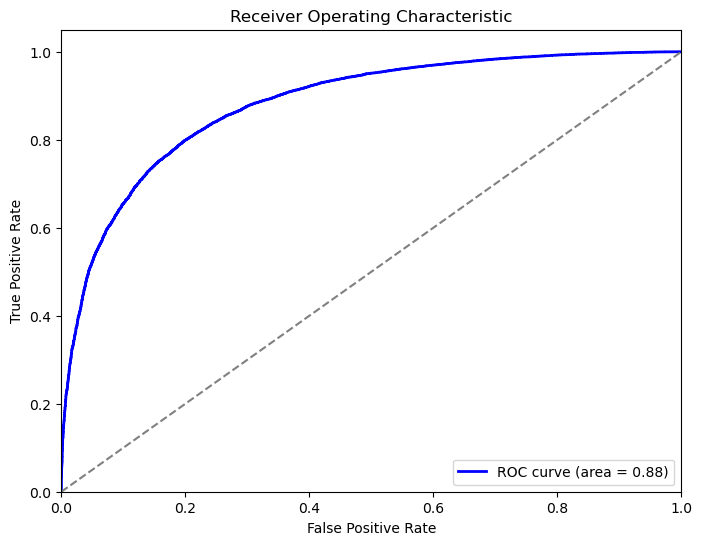

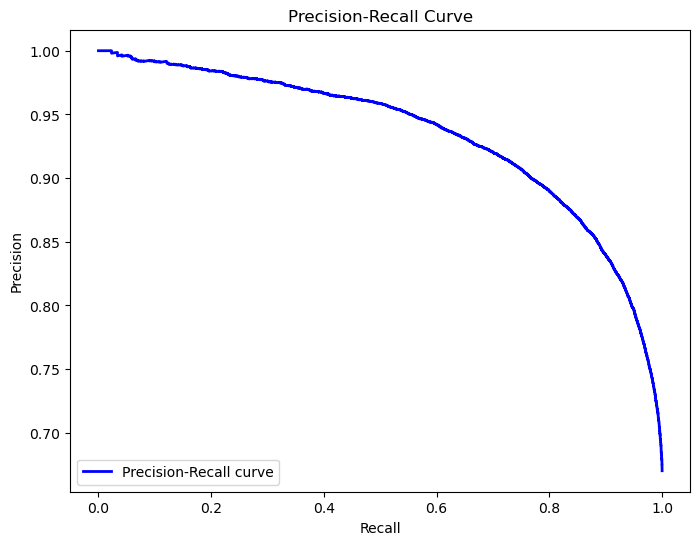

**************************************************************************************************

Training Score: 0.899 +/- 0.030


In [ ]:
evaluate_model(log_reg_50k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

log_reg['BW50k'] = f1
log_reg_train['BW50k'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8988833079888792
F1 Score Test: 0.8182600147456377


### 1.2 Logistic Regression : 25K Words

In [ ]:
estimator = LogisticRegression(solver='saga', random_state = 21, class_weight = 'balanced', penalty = 'l2', fit_intercept = True, max_iter = 1500)

pipe2 = Pipeline([
  ('preprocessor', pre2),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.98]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'estimator__C': [0.001, 0.01, 0.1, 1, 10. 15],
#     'estimator__fit_intercept': [True, False],
#     'estimator__warm_start' : [True, False],
#     'estimator__class_weight': [None, 'balanced'],
#     'estimator__max_iter': [500, 1000, 1500]
# }


hpt = GridSearchCV(pipe2, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =2, error_score='raise')

hpt.fit(x_train, y_train_en)

log_reg_25k = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Hyperparameters: {'estimator__C': 0.98}


In [ ]:
# Visulaising Pipeline
set_config(display="diagram")
pipe2

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_v25k',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('v25k',
                                                                                  CountVectorizer(max_features=25000),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_...
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LogisticRegression(class_weight='balanced', max_iter=1500,
                                    random_state=21, solver='saga'))])

In [ ]:
## Geting Cv Scores
cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([71.18300879]),
  'std_fit_time': array([1.57704413]),
  'mean_score_time': array([3.89320588]),
  'std_score_time': array([0.07378125]),
  'param_estimator__C': masked_array(data=[0.98],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.98}],
  'split0_test_score': array([0.79552402]),
  'split1_test_score': array([0.79524753]),
  'mean_test_score': array([0.79538577]),
  'std_test_score': array([0.00013824]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.79538577]))

In [ ]:
y_pred = log_reg_25k.predict(x_test)
y_pred_train = log_reg_25k.predict(x_train)

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix:
 [[ 8369  2364]
 [ 4012 17807]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.72     10733
           1       0.88      0.82      0.85     21819

    accuracy                           0.80     32552
   macro avg       0.78      0.80      0.79     32552
weighted avg       0.81      0.80      0.81     32552

**************************************************************************************************

ROC AUC Score: 0.8807472467926805


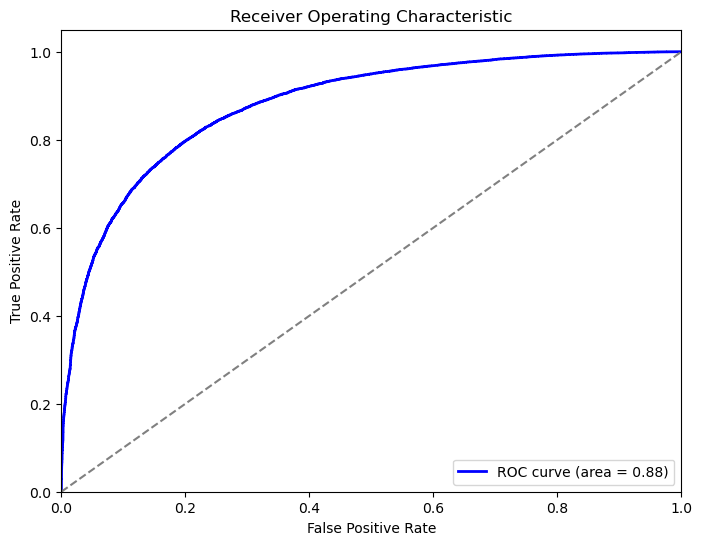

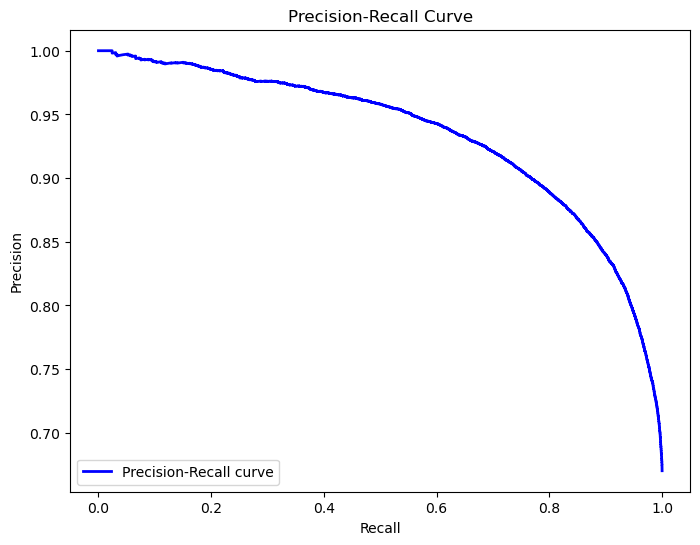

**************************************************************************************************

Training Score: 0.878 +/- nan


In [ ]:
evaluate_model(log_reg_25k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

log_reg['BW25k'] = f1
log_reg_train['BW25k'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8783082192832895
F1 Score Test: 0.8041287785696732


### 1.3 Logistic Regression : Unigram

In [ ]:
estimator = LogisticRegression(solver='saga', random_state = 21, class_weight = 'balanced', penalty = 'l2', fit_intercept = True, max_iter = 700)

pipe4 = Pipeline([
  ('preprocessor', pre4),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.95]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'estimator__C': [0.001, 0.01, 0.1, 1, 10. 15],
#     'estimator__fit_intercept': [True, False],
#     'estimator__warm_start' : [True, False],
#     'estimator__class_weight': [None, 'balanced'],
#     'estimator__max_iter': [500, 1000, 1500]
# }

hpt = GridSearchCV(pipe4, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

log_reg_un = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Hyperparameters: {'estimator__C': 0.95}


In [ ]:
# Visulaising Pipeline
set_config(display="diagram")
pipe4

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_uni',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('uni',
                                                                                  TfidfVectorizer(),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_gen',
                                                 ColumnTransform...
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LogisticRegression(class_weight='balanced', max_iter=700,
                                    random_state=21, solver='saga'))])

In [ ]:
## Geting Cv Scores
cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([45.08453691]),
  'std_fit_time': array([1.09946716]),
  'mean_score_time': array([3.75678957]),
  'std_score_time': array([0.01926029]),
  'param_estimator__C': masked_array(data=[0.95],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.95}],
  'split0_test_score': array([0.7969986]),
  'split1_test_score': array([0.79682964]),
  'mean_test_score': array([0.79691412]),
  'std_test_score': array([8.44815139e-05]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.79691412]))

In [ ]:
y_pred = log_reg_un.predict(x_test)
y_pred_train = log_reg_un.predict(x_train)

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix:
 [[ 8539  2194]
 [ 3979 17840]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73     10733
           1       0.89      0.82      0.85     21819

    accuracy                           0.81     32552
   macro avg       0.79      0.81      0.79     32552
weighted avg       0.82      0.81      0.81     32552

**************************************************************************************************

ROC AUC Score: 0.8903854820544079


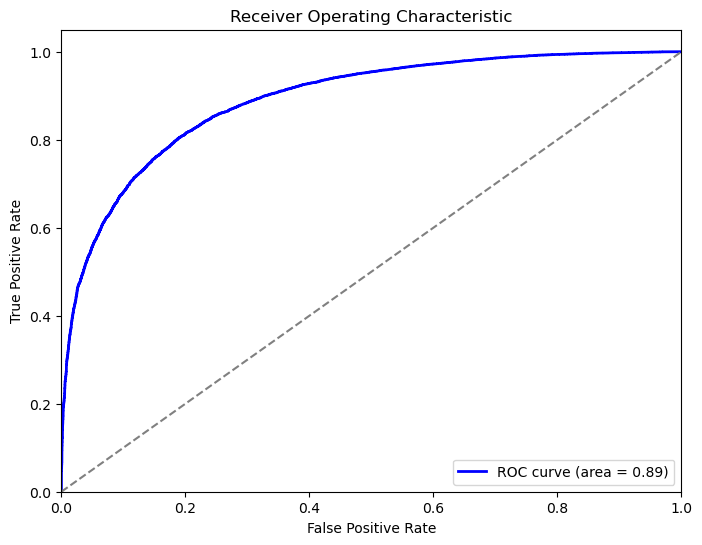

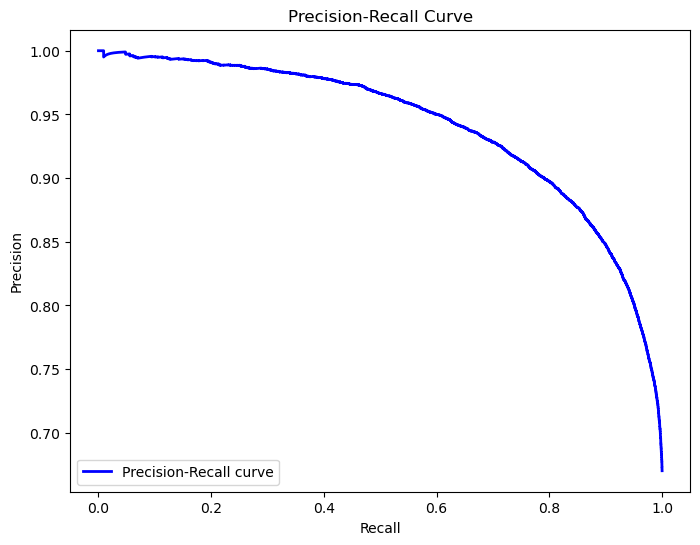

**************************************************************************************************

Training Score: 0.853 +/- nan


In [ ]:
evaluate_model(log_reg_un, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

log_reg['Uni'] = f1
log_reg_train['Uni'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8526719198808044
F1 Score Test: 0.8103649545342836


### 1.4 Logistic Regression : Bigram

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

feature_selector = SelectPercentile(f_classif, percentile=50)

estimator = LogisticRegression(solver='saga', random_state = 21, penalty = 'l2', fit_intercept = True, max_iter = 700)

pipe4 = Pipeline([
  ('preprocessor', pre5),
  ('feature_selector', feature_selector),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [1.5]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'estimator__C': [0.001, 0.01, 0.1, 1, 10. 15],
#     'estimator__fit_intercept': [True, False],
#     'estimator__warm_start' : [True, False],
#     'estimator__class_weight': [None, 'balanced'],
#     'estimator__max_iter': [500, 1000, 1500]
# }

hpt = GridSearchCV(pipe4, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

log_reg_bi = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ..................................estimator__C=0.01; total time= 1.0min
[CV] END ..................................estimator__C=0.98; total time= 1.3min
Best Hyperparameters: {'estimator__C': 1.5}


In [ ]:
# Visulaising Pipeline
set_config(display="diagram")
pipe4

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_bi',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('bi',
                                                                                  TfidfVectorizer(min_df=2,
                                                                                                  ngram_range=(2,
                                                                                                               2)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('...
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('feature_selector', SelectPercentile(percentile=50)),
                ('estimator',
                 LogisticRegression(max_iter=700, random_state=21,
                                    solver='saga'))])

In [ ]:
## Geting Cv Scores
cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([47.98485017]),
  'std_fit_time': array([0.11278415]),
  'mean_score_time': array([4.64835703]),
  'std_score_time': array([0.01907408]),
  'param_estimator__C': masked_array(data=[1.5],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 1.5}],
  'split0_test_score': array([0.78851973]),
  'split1_test_score': array([0.78523263]),
  'mean_test_score': array([0.78687618]),
  'std_test_score': array([0.00164355]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.78687618]))

In [ ]:
y_pred = log_reg_bi.predict(x_test)
y_pred_train = log_reg_bi.predict(x_train)

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix:
 [[ 6249  4484]
 [ 1935 19884]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.58      0.66     10733
           1       0.82      0.91      0.86     21819

    accuracy                           0.80     32552
   macro avg       0.79      0.75      0.76     32552
weighted avg       0.80      0.80      0.79     32552

**************************************************************************************************

ROC AUC Score: 0.8674922638706897


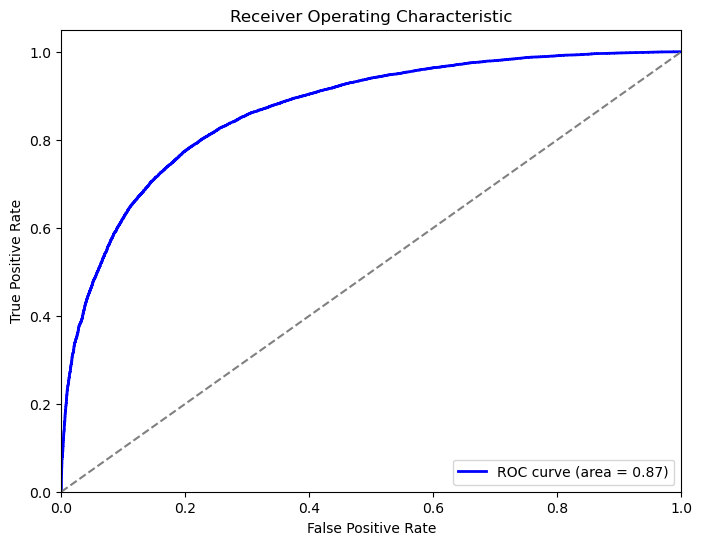

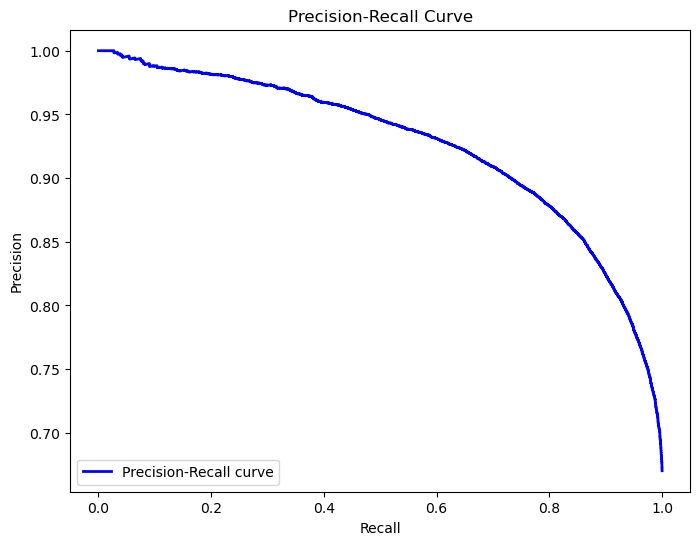

**************************************************************************************************

Training Score: 0.876 +/- nan


In [ ]:
evaluate_model(log_reg_bi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

log_reg['Bi'] = f1
log_reg_train['Bi'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8759504170314732
F1 Score Test: 0.8028078151880069


### 1.5 Logistic Regression : Uni-Bigram

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
scoring = make_scorer(f1_score, average='micro')

estimator = LogisticRegression(solver='saga', random_state = 21, penalty = 'l2', max_iter = 2000, fit_intercept = True )

pipe5 = Pipeline([
  ('preprocessor', pre6),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [21]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'estimator__C': [0.001, 0.01, 0.1, 1, 10, 15],
#     'estimator__fit_intercept': [True, False],
#     'estimator__warm_start' : [True, False],
#     'estimator__class_weight': [None, 'balanced'],
#     'estimator__max_iter': [500, 1000, 1500]
# }

hpt = GridSearchCV(pipe5, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

log_reg_unbi = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ..................................estimator__C=0.01; total time=  59.7s
[CV] END ..................................estimator__C=0.98; total time= 1.2min
[CV] END ..................................estimator__C=0.98; total time= 1.5min
[CV] END ..................................estimator__C=0.98; total time= 1.4min
Best Hyperparameters: {'estimator__C': 21}


In [ ]:
n_iter = log_reg_unbi.named_steps['estimator'].n_iter_
print("Number of iterations:", n_iter)

Number of iterations: [1786]


In [ ]:
# Visulaising Pipeline
set_config(display="diagram")
pipe5

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_unbi',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('unbi',
                                                                                  TfidfVectorizer(ngram_range=(1,
                                                                                                               2)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_g...
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LogisticRegression(max_iter=2000, random_state=21,
                                    solver='saga'))])

In [ ]:
## Geting Cv Scores
cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([341.41195273]),
  'std_fit_time': array([18.07784367]),
  'mean_score_time': array([6.06211066]),
  'std_score_time': array([0.06336451]),
  'param_estimator__C': masked_array(data=[21],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 21}],
  'split0_test_score': array([0.82618313]),
  'split1_test_score': array([0.8256916]),
  'mean_test_score': array([0.82593736]),
  'std_test_score': array([0.00024576]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.82593736]))

In [ ]:
y_pred = log_reg_unbi.predict(x_test)
y_pred_train = log_reg_unbi.predict(x_train)

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix:
 [[ 7491  3242]
 [ 2076 19743]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74     10733
           1       0.86      0.90      0.88     21819

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552

**************************************************************************************************

ROC AUC Score: 0.9045026356637251


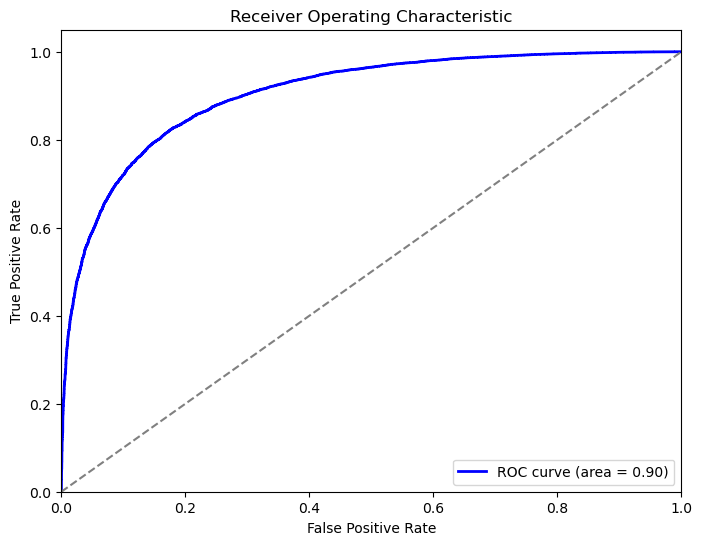

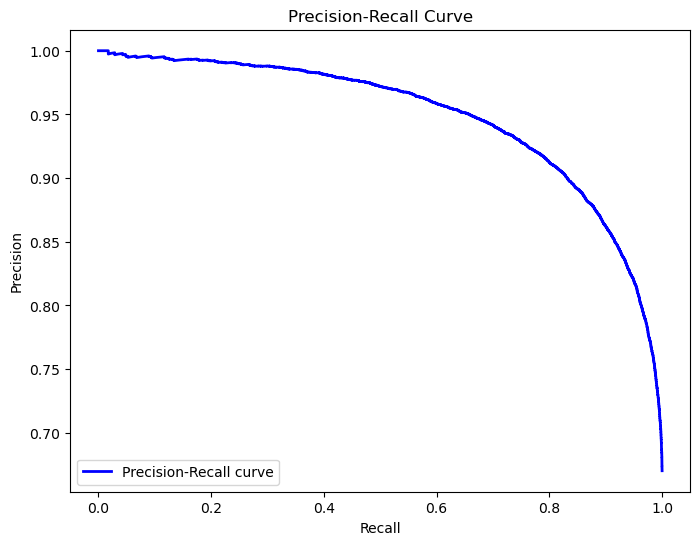

**************************************************************************************************

Training Score: 0.982 +/- nan


In [ ]:
evaluate_model(log_reg_unbi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

log_reg['UniBi'] = f1
log_reg_train['UniBi'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.981698232032318
F1 Score Test: 0.8366306217743917


### 1.6 Logistic Regression : N-gram

In [ ]:
feature_selector = SelectPercentile(f_classif, percentile=25)

estimator = LogisticRegression(solver='saga', random_state = 21, class_weight = 'balanced', penalty = 'l2', fit_intercept = True, max_iter = 1500)

pipe6 = Pipeline([
  ('preprocessor', pre7),
  ('feature_selector', feature_selector),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.98]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'estimator__C': [0.001, 0.01, 0.1, 1, 10. 15],
#     'estimator__fit_intercept': [True, False],
#     'estimator__warm_start' : [True, False],
#     'estimator__class_weight': [None, 'balanced'],
#     'estimator__max_iter': [500, 1000, 1500]
# }

hpt = GridSearchCV(pipe6, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

log_reg_ng = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Hyperparameters: {'estimator__C': 0.98}


In [ ]:
# Visulaising Pipeline
set_config(display="diagram")
pipe6

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_ng',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('ng',
                                                                                  TfidfVectorizer(min_df=3,
                                                                                                  ngram_range=(1,
                                                                                                               5)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('...
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('feature_selector', SelectPercentile(percentile=25)),
                ('estimator',
                 LogisticRegression(class_weight='balanced', max_iter=1500,
                                    random_state=21, solver='saga'))])

In [ ]:
## Geting Cv Scores
cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([54.67485559]),
  'std_fit_time': array([0.67014539]),
  'mean_score_time': array([10.17737567]),
  'std_score_time': array([0.02861059]),
  'param_estimator__C': masked_array(data=[0.98],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.98}],
  'split0_test_score': array([0.80332704]),
  'split1_test_score': array([0.80191389]),
  'mean_test_score': array([0.80262046]),
  'std_test_score': array([0.00070657]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.80262046]))

In [ ]:
y_pred = log_reg_ng.predict(x_test)
y_pred_train = log_reg_ng.predict(x_train)

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix:
 [[ 8596  2137]
 [ 3875 17944]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74     10733
           1       0.89      0.82      0.86     21819

    accuracy                           0.82     32552
   macro avg       0.79      0.81      0.80     32552
weighted avg       0.83      0.82      0.82     32552

**************************************************************************************************

ROC AUC Score: 0.8958192762373728


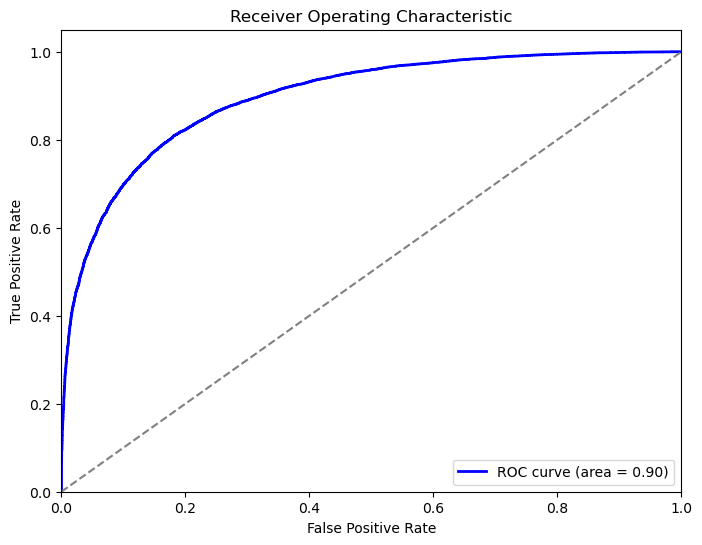

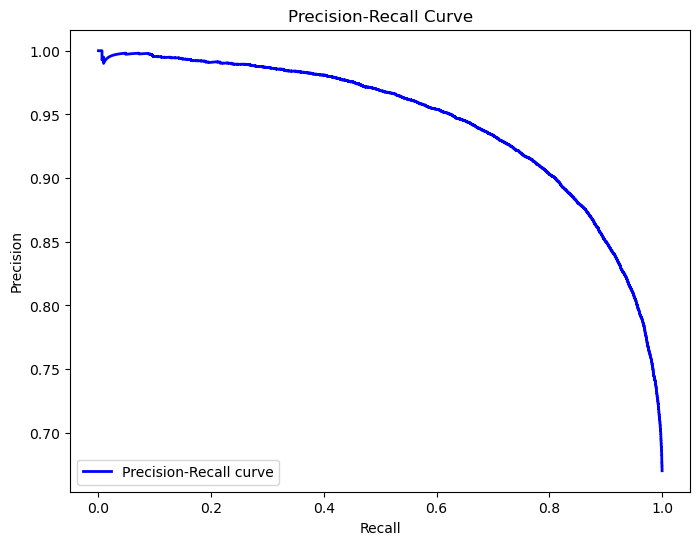

**************************************************************************************************

Training Score: 0.861 +/- nan


In [ ]:
evaluate_model(log_reg_ng, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

log_reg['Ng'] = f1
log_reg_train['Ng'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8608205459041826
F1 Score Test: 0.8153108871958713


### Model eval

In [ ]:
# Calculate mean values
test_mean = sum(log_reg.values()) / len(log_reg)
train_mean = sum(log_reg_train.values()) / len(log_reg_train)

log_reg['mean'] = test_mean
log_reg_train['mean'] = train_mean

model_test_scores['log_reg'] = log_reg
model_train_scores['log_reg_train'] = log_reg_train

model_scores['log_reg'] = log_reg
model_scores['log_reg_train'] = log_reg_train

print('log_reg_test', log_reg)
print('log_reg_train', log_reg_train)

log_reg_test {'BW50k': 0.8182600147456377, 'BW25k': 0.8041287785696732, 'Uni': 0.8103649545342836, 'Bi': 0.8028078151880069, 'UniBi': 0.8366306217743917, 'Ng': 0.8153108871958713, 'mean': 0.8145838453346442}
log_reg_train {'BW50k': 0.8988833079888792, 'BW25k': 0.8783082192832895, 'Uni': 0.8526719198808044, 'Bi': 0.8759504170314732, 'UniBi': 0.981698232032318, 'Ng': 0.8608205459041826, 'mean': 0.8913887736868246}


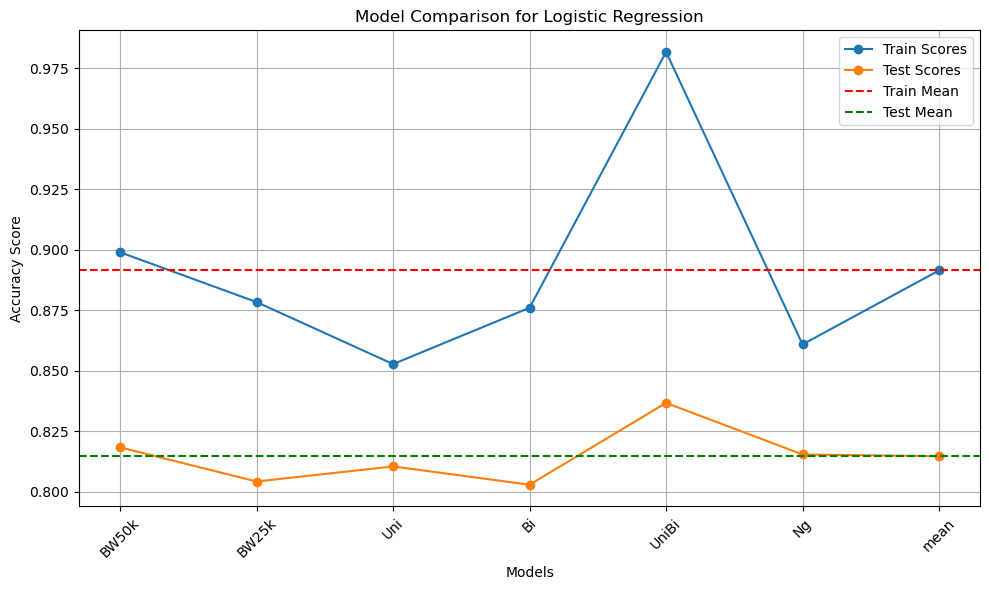

In [ ]:
plot_model_comparison(log_reg_train, log_reg, train_mean, test_mean, 'Logistic Regression')

## 2. Linear SVC

In [ ]:
lin_svc = {}
lin_svc_train ={}

### 2.1 Linear SVC : 50K Words

In [ ]:
from sklearn.svm import LinearSVC

estimator = LinearSVC(dual = 'auto', loss = 'squared_hinge', max_iter = 1200, random_state = 21, fit_intercept = True)
pipe7 = Pipeline([
  ('preprocessor', pre1),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.7],
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2'],             # Regularization type
#     'estimator__loss': ['hinge', 'squared_hinge'],  # Loss function
#     'estimator__C': [0.01, 0.1, 1, 10],             # Regularization parameter
#     'estimator__fit_intercept': [True, False],      # Include bias/intercept term
#     'estimator__max_iter': [500, 1000, 1500],        # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2],           # Tolerance for stopping criterion
# }


hpt = GridSearchCV(pipe7, param_grid,  cv=StratifiedKFold(3), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

lin_svc_50k = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Hyperparameters: {'estimator__C': 0.7}


In [ ]:
n_iter = lin_svc_50k.named_steps['estimator'].n_iter_
print("Number of iterations:", n_iter)

Number of iterations: 38


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe7

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_v50k',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('v50k',
                                                                                  CountVectorizer(max_features=50000),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_...
                                                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LinearSVC(dual='auto', max_iter=1200, random_state=21))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([46.33264089]),
  'std_fit_time': array([3.08210617]),
  'mean_score_time': array([3.2315766]),
  'std_score_time': array([0.48406318]),
  'param_estimator__C': masked_array(data=[0.7],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.7}],
  'split0_test_score': array([0.79132298]),
  'split1_test_score': array([0.79300493]),
  'split2_test_score': array([0.79337358]),
  'mean_test_score': array([0.79256716]),
  'std_test_score': array([0.00089255]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.79256716]))

In [ ]:
y_pred = lin_svc_50k.predict(x_test)
y_pred_train = lin_svc_50k.predict(x_train)

In [ ]:
evaluate_model(lin_svc_50k, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

Confusion Matrix:
 [[ 7178  3555]
 [ 3057 18762]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68     10733
           1       0.84      0.86      0.85     21819

    accuracy                           0.80     32552
   macro avg       0.77      0.76      0.77     32552
weighted avg       0.79      0.80      0.80     32552

**************************************************************************************************

ROC AUC calculation is not available for this model.
An error occurred: local variable 'y_pred_proba_test' referenced before assignment


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

lin_svc['BW50k'] = f1
lin_svc_train['BW50k'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9270310123957421
F1 Score Test: 0.7968788400098306


### 2.2 Linear SVC : 25K Words

In [ ]:
estimator = LinearSVC(dual = 'auto', loss = 'squared_hinge', max_iter = 1500, random_state = 21, fit_intercept = True )
pipe8 = Pipeline([
  ('preprocessor', pre2),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.7]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2'],             # Regularization type
#     'estimator__loss': ['hinge', 'squared_hinge'],  # Loss function
#     'estimator__C': [0.01, 0.1, 1, 10],             # Regularization parameter
#     'estimator__fit_intercept': [True, False],      # Include bias/intercept term
#     'estimator__max_iter': [500, 1000, 1500],        # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2],           # Tolerance for stopping criterion
# }


hpt = GridSearchCV(pipe8, param_grid,  cv=StratifiedKFold(3), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

lin_svc_25k = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Hyperparameters: {'estimator__C': 0.7}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe8

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_v25k',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('v25k',
                                                                                  CountVectorizer(max_features=25000),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_...
                                                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LinearSVC(dual='auto', max_iter=1500, random_state=21))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([31.88881302]),
  'std_fit_time': array([2.42094994]),
  'mean_score_time': array([2.68129015]),
  'std_score_time': array([0.04181308]),
  'param_estimator__C': masked_array(data=[0.7],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.7}],
  'split0_test_score': array([0.79136906]),
  'split1_test_score': array([0.79231372]),
  'split2_test_score': array([0.79328142]),
  'mean_test_score': array([0.7923214]),
  'std_test_score': array([0.00078073]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.7923214]))

In [ ]:
y_pred = lin_svc_25k.predict(x_test)
y_pred_train = lin_svc_25k.predict(x_train)

In [ ]:
evaluate_model(lin_svc_25k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

Confusion Matrix:
 [[ 7202  3531]
 [ 2933 18886]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69     10733
           1       0.84      0.87      0.85     21819

    accuracy                           0.80     32552
   macro avg       0.78      0.77      0.77     32552
weighted avg       0.80      0.80      0.80     32552

**************************************************************************************************

ROC AUC calculation is not available for this model.
An error occurred: local variable 'y_pred_proba_test' referenced before assignment


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

lin_svc['BW25k'] = f1
lin_svc_train['BW25k'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9020628849668986
F1 Score Test: 0.8014254116490537


### 2.3 Linear SVC : Unigram

In [ ]:
estimator = LinearSVC(dual = 'auto', loss = 'squared_hinge', max_iter = 1500, random_state = 21, fit_intercept = True )
pipe9 = Pipeline([
  ('preprocessor', pre4),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.7]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2'],             # Regularization type
#     'estimator__loss': ['hinge', 'squared_hinge'],  # Loss function
#     'estimator__C': [0.01, 0.1, 1, 10],             # Regularization parameter
#     'estimator__fit_intercept': [True, False],      # Include bias/intercept term
#     'estimator__max_iter': [500, 1000, 1500],        # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2],           # Tolerance for stopping criterion
# }


hpt = GridSearchCV(pipe9, param_grid,  cv=StratifiedKFold(3), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

lin_svc_un = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Hyperparameters: {'estimator__C': 0.7}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe9

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_uni',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('uni',
                                                                                  TfidfVectorizer(),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_gen',
                                                 ColumnTransform...
                                                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LinearSVC(dual='auto', max_iter=1500, random_state=21))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([29.68695498]),
  'std_fit_time': array([2.18282335]),
  'mean_score_time': array([2.86704453]),
  'std_score_time': array([0.44656042]),
  'param_estimator__C': masked_array(data=[0.7],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.7}],
  'split0_test_score': array([0.81457076]),
  'split1_test_score': array([0.81311921]),
  'split2_test_score': array([0.8157919]),
  'mean_test_score': array([0.81449396]),
  'std_test_score': array([0.00109247]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.81449396]))

In [ ]:
y_pred = lin_svc_un.predict(x_test)
y_pred_train = lin_svc_un.predict(x_train)


In [ ]:
evaluate_model(lin_svc_un,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

Confusion Matrix:
 [[ 7244  3489]
 [ 2361 19458]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71     10733
           1       0.85      0.89      0.87     21819

    accuracy                           0.82     32552
   macro avg       0.80      0.78      0.79     32552
weighted avg       0.82      0.82      0.82     32552

**************************************************************************************************

ROC AUC calculation is not available for this model.
An error occurred: local variable 'y_pred_proba_test' referenced before assignment


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

lin_svc['Uni'] = f1
lin_svc_train['Uni'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9047509331367218
F1 Score Test: 0.8202875399361023


### 2.4 Linear SVC : Bigram

In [ ]:
estimator = LinearSVC(dual = 'auto', loss = 'squared_hinge', max_iter = 1500, random_state = 21, fit_intercept = True )
feature_selector = SelectPercentile(f_classif, percentile=50)

pipe10 = Pipeline([
  ('preprocessor', pre5),
  ('feature_selector', feature_selector),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.5]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2'],             # Regularization type
#     'estimator__loss': ['hinge', 'squared_hinge'],  # Loss function
#     'estimator__C': [0.01, 0.1, 1, 10],             # Regularization parameter
#     'estimator__fit_intercept': [True, False],      # Include bias/intercept term
#     'estimator__max_iter': [500, 1000, 1500],        # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2],           # Tolerance for stopping criterion
# }


hpt = GridSearchCV(pipe10, param_grid,  cv=StratifiedKFold(3), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

lin_svc_bi = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'estimator__C': 0.5}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe10

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_bi',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('bi',
                                                                                  TfidfVectorizer(min_df=2,
                                                                                                  ngram_range=(2,
                                                                                                               2)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('...
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('feature_selector', SelectPercentile(percentile=50)),
                ('estimator',
                 LinearSVC(dual='auto', max_iter=1500, random_state=21))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([28.5614078]),
  'std_fit_time': array([3.36397559]),
  'mean_score_time': array([3.21378024]),
  'std_score_time': array([0.16525688]),
  'param_estimator__C': masked_array(data=[0.5],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.5}],
  'split0_test_score': array([0.80282015]),
  'split1_test_score': array([0.80116124]),
  'split2_test_score': array([0.80070043]),
  'mean_test_score': array([0.8015606]),
  'std_test_score': array([0.00091028]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.8015606]))

In [ ]:
y_pred = lin_svc_bi.predict(x_test)
y_pred_train = lin_svc_bi.predict(x_train)

In [ ]:
evaluate_model(lin_svc_bi,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

Confusion Matrix:
 [[ 6625  4108]
 [ 2107 19712]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68     10733
           1       0.83      0.90      0.86     21819

    accuracy                           0.81     32552
   macro avg       0.79      0.76      0.77     32552
weighted avg       0.80      0.81      0.80     32552

**************************************************************************************************

ROC AUC calculation is not available for this model.
An error occurred: local variable 'y_pred_proba_test' referenced before assignment


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

lin_svc['Bi'] = f1
lin_svc_train['Bi'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9325991121760902
F1 Score Test: 0.8090747112312607


### 2.5 Linear SVC : Uni-Bigram

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, f1_score

estimator = LinearSVC(dual = 'auto', loss = 'squared_hinge', max_iter = 3000, random_state = 21, fit_intercept = True)

pipe11 = Pipeline([
  ('preprocessor', pre6),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.7]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2'],             # Regularization type
#     'estimator__loss': ['hinge', 'squared_hinge'],  # Loss function
#     'estimator__C': [0.01, 0.1, 1, 10],             # Regularization parameter
#     'estimator__fit_intercept': [True, False],      # Include bias/intercept term
#     'estimator__max_iter': [500, 1000, 1500],        # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2],           # Tolerance for stopping criterion
# }

scoring = make_scorer(f1_score, average='micro')
hpt = GridSearchCV(pipe11, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

lin_svc_unbi = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'estimator__C': 0.7}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe11

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_unbi',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('unbi',
                                                                                  TfidfVectorizer(ngram_range=(1,
                                                                                                               2)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_g...
                                                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LinearSVC(dual='auto', max_iter=3000, random_state=21))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([131.68892944]),
  'std_fit_time': array([2.05624473]),
  'mean_score_time': array([6.52457547]),
  'std_score_time': array([0.15018702]),
  'param_estimator__C': masked_array(data=[0.7],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.7}],
  'split0_test_score': array([0.82598344]),
  'split1_test_score': array([0.82478534]),
  'mean_test_score': array([0.82538439]),
  'std_test_score': array([0.00059905]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.82538439]))

In [ ]:
y_pred = lin_svc_unbi.predict(x_test)
y_pred_train = lin_svc_unbi.predict(x_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
evaluate_model(lin_svc_unbi,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

Confusion Matrix:
 [[ 7503  3230]
 [ 2099 19720]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74     10733
           1       0.86      0.90      0.88     21819

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552

**************************************************************************************************

ROC AUC calculation is not available for this model.
An error occurred: local variable 'y_pred_proba_test' referenced before assignment


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

lin_svc['UniBi'] = f1
lin_svc_train['UniBi'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9842710781377202
F1 Score Test: 0.8362927009093143


### 2.6 Linear SVC : Ngram

In [ ]:
estimator = LinearSVC(dual = 'auto', loss = 'squared_hinge', max_iter = 1500, random_state = 21, fit_intercept = True )
feature_selector = SelectPercentile(f_classif, percentile=80)

pipe12 = Pipeline([
  ('preprocessor', pre7),
  ('feature_selector', feature_selector),
  ('estimator', estimator)
])

param_grid = {
  'estimator__C': [0.5]
}

# param_grid = {
#     'estimator__penalty': ['l1', 'l2'],             # Regularization type
#     'estimator__loss': ['hinge', 'squared_hinge'],  # Loss function
#     'estimator__C': [0.01, 0.1, 1, 10],             # Regularization parameter
#     'estimator__fit_intercept': [True, False],      # Include bias/intercept term
#     'estimator__max_iter': [500, 1000, 1500],        # Maximum number of iterations
#     'tol': [1e-4, 1e-3, 1e-2],           # Tolerance for stopping criterion
# }


hpt = GridSearchCV(pipe12, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

lin_svc_ng = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters: {'estimator__C': 0.5}


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe12

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_ng',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('ng',
                                                                                  TfidfVectorizer(min_df=3,
                                                                                                  ngram_range=(1,
                                                                                                               5)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('...
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('feature_selector', SelectPercentile(percentile=80)),
                ('estimator',
                 LinearSVC(dual='auto', max_iter=1500, random_state=21))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([63.77926087]),
  'std_fit_time': array([0.90366077]),
  'mean_score_time': array([10.47345138]),
  'std_score_time': array([0.17319465]),
  'param_estimator__C': masked_array(data=[0.5],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__C': 0.5}],
  'split0_test_score': array([0.82510791]),
  'split1_test_score': array([0.82421701]),
  'mean_test_score': array([0.82466246]),
  'std_test_score': array([0.00044545]),
  'rank_test_score': array([1], dtype=int32)},
 array([0.82466246]))

In [ ]:
y_pred = lin_svc_ng.predict(x_test)
y_pred_train = lin_svc_ng.predict(x_train)

In [ ]:
evaluate_model(lin_svc_ng,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

Confusion Matrix:
 [[ 7410  3323]
 [ 1978 19841]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.74     10733
           1       0.86      0.91      0.88     21819

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552

**************************************************************************************************

ROC AUC calculation is not available for this model.
An error occurred: local variable 'y_pred_proba_test' referenced before assignment


/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

lin_svc['Ng'] = f1
lin_svc_train['Ng'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9543876626269143
F1 Score Test: 0.8371528631113295


### Model eval

In [ ]:
# Calculate mean values
test_mean = sum(lin_svc.values()) / len(lin_svc)
train_mean = sum(lin_svc_train.values()) / len(lin_svc_train)

lin_svc['mean'] = test_mean
lin_svc_train['mean'] = train_mean

model_test_scores['lin_svc'] = lin_svc
model_train_scores['lin_svc_train'] = lin_svc_train

model_scores['lin_svc'] = lin_svc
model_scores['lin_svc_train'] = lin_svc_train

print('lin_svc_test', lin_svc)
print('lin_svc_train', lin_svc_train)

lin_svc_test {'BW50k': 0.7968788400098306, 'BW25k': 0.8014254116490537, 'Uni': 0.8202875399361023, 'Bi': 0.8090747112312607, 'UniBi': 0.8362927009093143, 'Ng': 0.8371528631113295, 'mean': 0.8168520111411485}
lin_svc_train {'BW50k': 0.9270310123957421, 'BW25k': 0.9020628849668986, 'Uni': 0.9047509331367218, 'Bi': 0.9325991121760902, 'UniBi': 0.9842710781377202, 'Ng': 0.9543876626269143, 'mean': 0.9341837805733478}


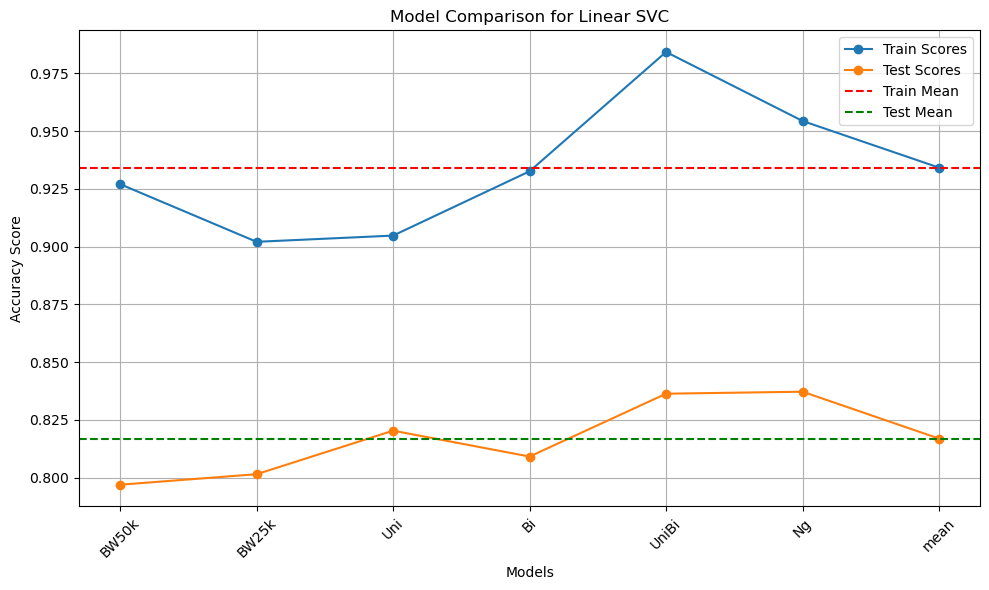

In [ ]:
plot_model_comparison(lin_svc_train, lin_svc, train_mean, test_mean, 'Linear SVC' )


## 3. MultinomialNB

In [ ]:
m_nb = {}
m_nb_train = {}

### 3.1 MultinomialNB : 50K Words

In [ ]:
from sklearn.naive_bayes import MultinomialNB

estimator = MultinomialNB()
pipe13 = Pipeline([
  ('preprocessor', col_v50k),
  ('estimator', estimator)
])

param_grid = {
    'estimator__alpha': [0.1, 1, 10],      # Additive smoothing parameter
    'estimator__fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}


hpt = GridSearchCV(pipe13, param_grid,  cv=StratifiedKFold(3), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

m_nb_50k = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'estimator__alpha': 1, 'estimator__fit_prior': True}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe13

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('v50k',
                                                  CountVectorizer(max_features=50000),
                                                  'reviewText')],
                                   verbose_feature_names_out=False)),
                ('estimator', MultinomialNB())])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([4.6042223 , 4.59464995, 4.66203888, 4.62474553, 4.72573932,
         4.33183591]),
  'std_fit_time': array([0.1207643 , 0.07077385, 0.19458771, 0.08181339, 0.02409784,
         0.26733162]),
  'mean_score_time': array([2.49013821, 2.68440239, 2.75267371, 2.59333213, 2.44035522,
         1.8718396 ]),
  'std_score_time': array([0.10632123, 0.25550696, 0.24413415, 0.10746564, 0.08621914,
         0.35203711]),
  'param_estimator__alpha': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_estimator__fit_prior': masked_array(data=[True, False, True, False, True, False],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__alpha': 0.1, 'estimator__fit_prior': True},
   {'estimator__alpha': 0.1, 'estimator__fit_prior': False},
   {'estimator__alpha': 1, 'esti

In [ ]:
y_pred = m_nb_50k.predict(x_test)
y_pred_train = m_nb_50k.predict(x_train)

Confusion Matrix:
 [[ 6969  3764]
 [ 2938 18881]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68     10733
           1       0.83      0.87      0.85     21819

    accuracy                           0.79     32552
   macro avg       0.77      0.76      0.76     32552
weighted avg       0.79      0.79      0.79     32552

**************************************************************************************************

ROC AUC Score: 0.8580523988370872


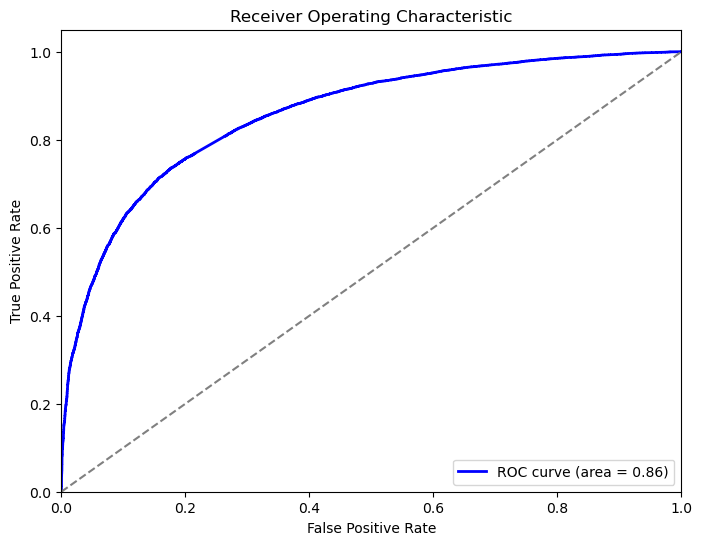

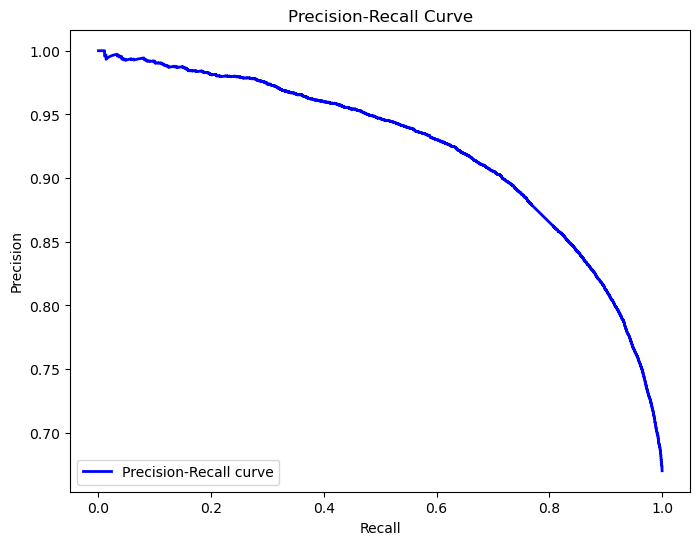

**************************************************************************************************

Training Score: 0.839 +/- 0.028


In [ ]:
evaluate_model(m_nb_50k, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train,average='micro')

m_nb['BW50k'] = f1
m_nb_train['BW50k'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8394236824723899
F1 Score Test: 0.7941140329319243


### 3.2 MultinomialNB : 25K Words

In [ ]:
from sklearn.naive_bayes import MultinomialNB

estimator = MultinomialNB(fit_prior = True)
pipe14 = Pipeline([
  ('preprocessor', col_v25k),
  ('estimator', estimator)
])

param_grid = {
    'estimator__alpha': [0.1, 1, 10],      # Additive smoothing parameter
    # 'estimator__fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}


hpt = GridSearchCV(pipe14, param_grid,  cv=StratifiedKFold(3), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

m_nb_25k = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Hyperparameters: {'estimator__alpha': 1}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe14

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('v25k',
                                                  CountVectorizer(max_features=25000),
                                                  'reviewText')],
                                   verbose_feature_names_out=False)),
                ('estimator', MultinomialNB())])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([4.49268071, 4.52633913, 4.13624938]),
  'std_fit_time': array([0.18792015, 0.09946994, 0.58470962]),
  'mean_score_time': array([2.37051415, 2.41404899, 2.08570011]),
  'std_score_time': array([0.02767926, 0.03271018, 0.3518953 ]),
  'param_estimator__alpha': masked_array(data=[0.1, 1, 10],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__alpha': 0.1},
   {'estimator__alpha': 1},
   {'estimator__alpha': 10}],
  'split0_test_score': array([0.78353532, 0.78885766, 0.75945809]),
  'split1_test_score': array([0.78378877, 0.79093129, 0.75855951]),
  'split2_test_score': array([0.77982581, 0.78653057, 0.75961937]),
  'mean_test_score': array([0.7823833 , 0.78877317, 0.75921233]),
  'std_test_score': array([0.00181137, 0.00179758, 0.00046628]),
  'rank_test_score': array([2, 1, 3], dtype=int32)},
 array([0.7823833 , 0.78877317, 0.75921233]))

In [ ]:
y_pred = m_nb_25k.predict(x_test)
y_pred_train = m_nb_25k.predict(x_train)

Confusion Matrix:
 [[ 7168  3565]
 [ 3209 18610]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68     10733
           1       0.84      0.85      0.85     21819

    accuracy                           0.79     32552
   macro avg       0.76      0.76      0.76     32552
weighted avg       0.79      0.79      0.79     32552

**************************************************************************************************

ROC AUC Score: 0.8577735062240361


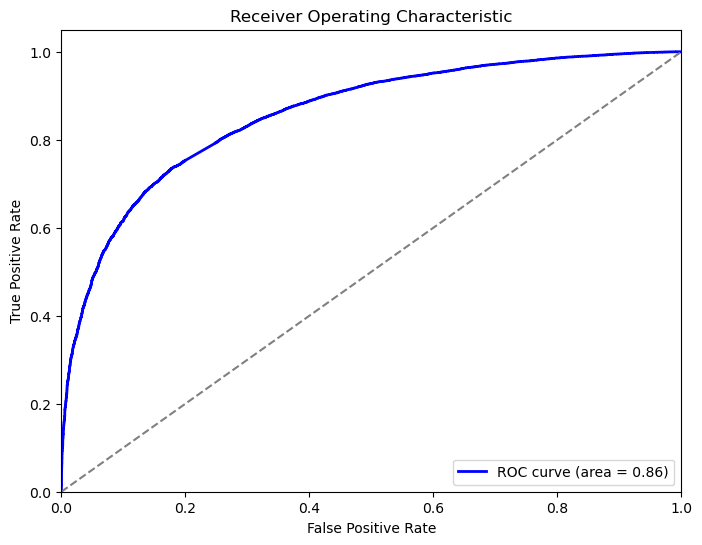

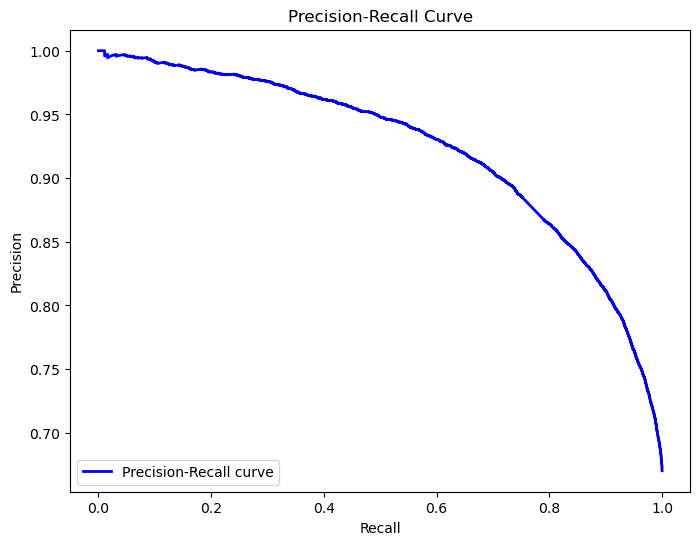

**************************************************************************************************

Training Score: 0.825 +/- 0.018


In [ ]:
evaluate_model(m_nb_25k, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

m_nb['BW25k'] = f1
m_nb_train['BW25k'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8245318956115694
F1 Score Test: 0.7919021872695994


### 3.3 MultinomialNB : Unigram

In [ ]:
from sklearn.naive_bayes import MultinomialNB

estimator = MultinomialNB(fit_prior = True)
pipe15 = Pipeline([
  ('preprocessor', col_uni),
  ('estimator', estimator)
])

param_grid = {
    'estimator__alpha': [0.1, 1, 10],      # Additive smoothing parameter
    # 'estimator__fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}


hpt = GridSearchCV(pipe15, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

m_nb_un = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'estimator__alpha': 0.1}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe15

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('uni', TfidfVectorizer(),
                                                  'reviewText')],
                                   verbose_feature_names_out=False)),
                ('estimator', MultinomialNB())])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([3.49717867, 3.51297164, 2.5897063 ]),
  'std_fit_time': array([0.18363011, 0.07566381, 0.22271144]),
  'mean_score_time': array([3.73125005, 3.60087454, 2.11093819]),
  'std_score_time': array([0.0344193 , 0.1356262 , 0.01124108]),
  'param_estimator__alpha': masked_array(data=[0.1, 1, 10],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__alpha': 0.1},
   {'estimator__alpha': 1},
   {'estimator__alpha': 10}],
  'split0_test_score': array([0.76638557, 0.7253122 , 0.66917039]),
  'split1_test_score': array([0.76566364, 0.72598805, 0.66901679]),
  'mean_test_score': array([0.76602461, 0.72565012, 0.66909359]),
  'std_test_score': array([3.60966469e-04, 3.37926056e-04, 7.68013763e-05]),
  'rank_test_score': array([1, 2, 3], dtype=int32)},
 array([0.76602461, 0.72565012, 0.66909359]))

In [ ]:
y_pred = m_nb_un.predict(x_test)
y_pred_train = m_nb_un.predict(x_train)

Confusion Matrix:
 [[ 4802  5931]
 [ 1373 20446]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.45      0.57     10733
           1       0.78      0.94      0.85     21819

    accuracy                           0.78     32552
   macro avg       0.78      0.69      0.71     32552
weighted avg       0.78      0.78      0.76     32552

**************************************************************************************************

ROC AUC Score: 0.8465956737389764


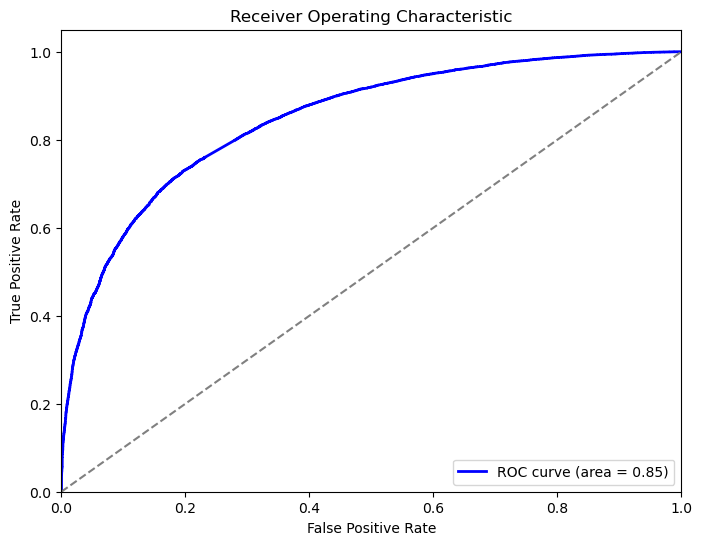

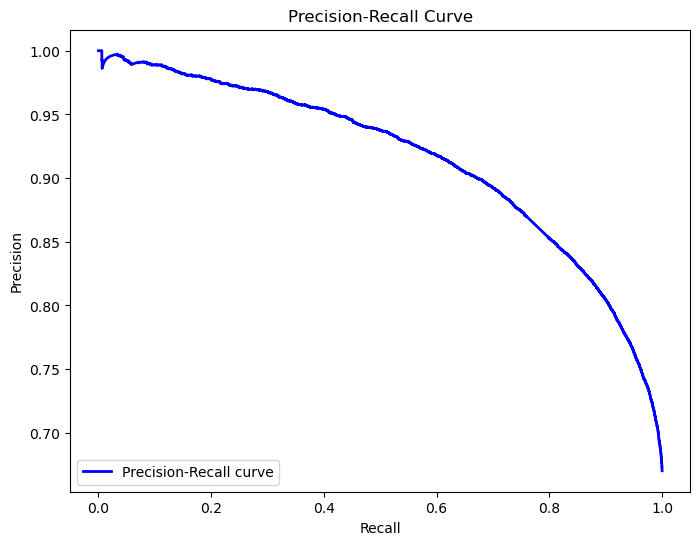

**************************************************************************************************

Training Score: 0.848 +/- 0.055


In [ ]:
evaluate_model(m_nb_un, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

m_nb['Uni'] = f1
m_nb_train['Uni'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.8483019215704345
F1 Score Test: 0.7756205455885967


### 3.4 MultinomialNB : Bigram

In [ ]:
from sklearn.naive_bayes import MultinomialNB

feature_selector = SelectPercentile(f_classif, percentile=50)

estimator = MultinomialNB(fit_prior = True)

pipe16 = Pipeline([
  ('preprocessor', col_bi),
  ('feature_selector', feature_selector),
  ('estimator', estimator)
])

param_grid = {
    'estimator__alpha': [0.1, 1, 10],      # Additive smoothing parameter
    # 'estimator__fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}


hpt = GridSearchCV(pipe16, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

m_nb_bi = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Hyperparameters: {'estimator__alpha': 0.1}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe16

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('bi',
                                                  TfidfVectorizer(min_df=2,
                                                                  ngram_range=(2,
                                                                               2)),
                                                  'reviewText')],
                                   verbose_feature_names_out=False)),
                ('feature_selector', SelectPercentile(percentile=50)),
                ('estimator', MultinomialNB())])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([6.47277296, 6.63159287, 4.41038358]),
  'std_fit_time': array([0.05532014, 0.09920371, 0.17380464]),
  'mean_score_time': array([4.16703999, 4.23076701, 2.95174122]),
  'std_score_time': array([0.02906239, 0.0533433 , 0.02326989]),
  'param_estimator__alpha': masked_array(data=[0.1, 1, 10],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__alpha': 0.1},
   {'estimator__alpha': 1},
   {'estimator__alpha': 10}],
  'split0_test_score': array([0.76457306, 0.73302306, 0.66789549]),
  'split1_test_score': array([0.76332888, 0.73259297, 0.66803373]),
  'mean_test_score': array([0.76395097, 0.73280801, 0.66796461]),
  'std_test_score': array([6.22091148e-04, 2.15043854e-04, 6.91212387e-05]),
  'rank_test_score': array([1, 2, 3], dtype=int32)},
 array([0.76395097, 0.73280801, 0.66796461]))

In [ ]:
y_pred = m_nb_bi.predict(x_test)
y_pred_train = m_nb_bi.predict(x_train)

Confusion Matrix:
 [[ 5379  5354]
 [ 1722 20097]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.50      0.60     10733
           1       0.79      0.92      0.85     21819

    accuracy                           0.78     32552
   macro avg       0.77      0.71      0.73     32552
weighted avg       0.78      0.78      0.77     32552

**************************************************************************************************

ROC AUC Score: 0.842483566304445


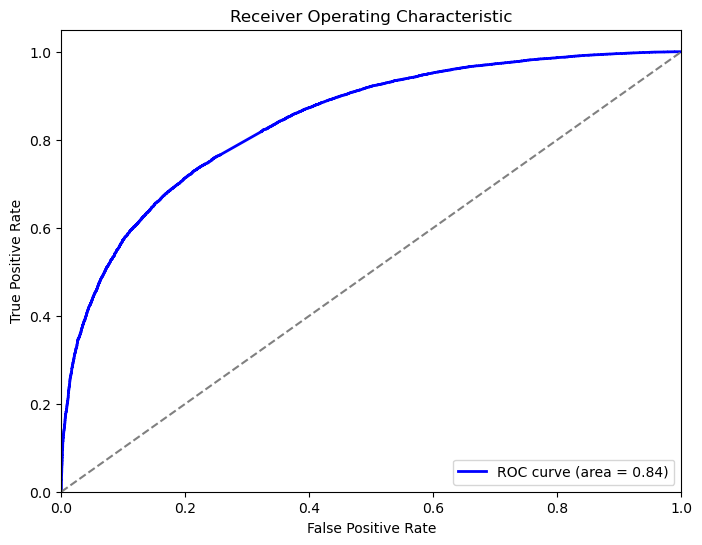

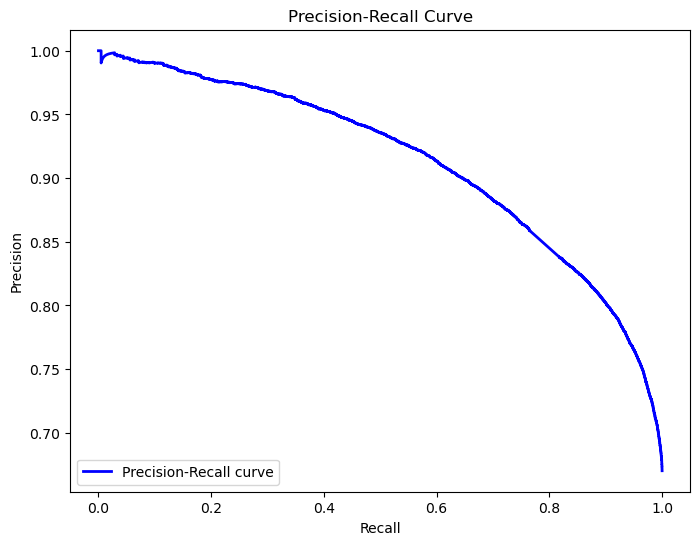

**************************************************************************************************

Training Score: 0.924 +/- 0.055


In [ ]:
evaluate_model(m_nb_bi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

m_nb['Bi'] = f1
m_nb_train['Bi'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9242968834001505
F1 Score Test: 0.7826247235192922


### 3.5 MultinomialNB : Uni-Bigram

In [ ]:
from sklearn.naive_bayes import MultinomialNB

estimator = MultinomialNB(fit_prior = False)

pipe17 = Pipeline([
  ('preprocessor', col_unbi),
  ('estimator', estimator)
])

param_grid = {
    'estimator__alpha': [0.1, 1, 10],      # Additive smoothing parameter
    # 'estimator__fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}


hpt = GridSearchCV(pipe17, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

m_nb_unbi = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Hyperparameters: {'estimator__alpha': 0.1}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe17

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('unbi',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'reviewText')],
                                   verbose_feature_names_out=False)),
                ('estimator', MultinomialNB(fit_prior=False))])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([9.7729398 , 9.7918148 , 6.90246463]),
  'std_fit_time': array([0.04634488, 0.09075737, 0.08463979]),
  'mean_score_time': array([6.54815936, 6.65416551, 4.30262709]),
  'std_score_time': array([0.08462238, 0.07775331, 0.00696421]),
  'param_estimator__alpha': masked_array(data=[0.1, 1, 10],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__alpha': 0.1},
   {'estimator__alpha': 1},
   {'estimator__alpha': 10}],
  'split0_test_score': array([0.78824325, 0.70061287, 0.66400934]),
  'split1_test_score': array([0.78745987, 0.70090472, 0.66463911]),
  'mean_test_score': array([0.78785156, 0.7007588 , 0.66432422]),
  'std_test_score': array([0.00039169, 0.00014592, 0.00031489]),
  'rank_test_score': array([1, 2, 3], dtype=int32)},
 array([0.78785156, 0.7007588 , 0.66432422]))

In [ ]:
y_pred = m_nb_unbi.predict(x_test)
y_pred_train = m_nb_unbi.predict(x_train)

Confusion Matrix:
 [[ 7367  3366]
 [ 3184 18635]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69     10733
           1       0.85      0.85      0.85     21819

    accuracy                           0.80     32552
   macro avg       0.77      0.77      0.77     32552
weighted avg       0.80      0.80      0.80     32552

**************************************************************************************************

ROC AUC Score: 0.8753794436441669


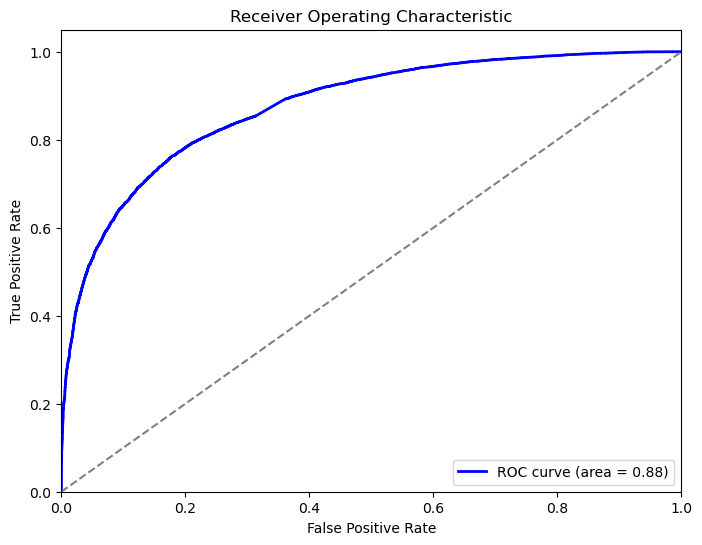

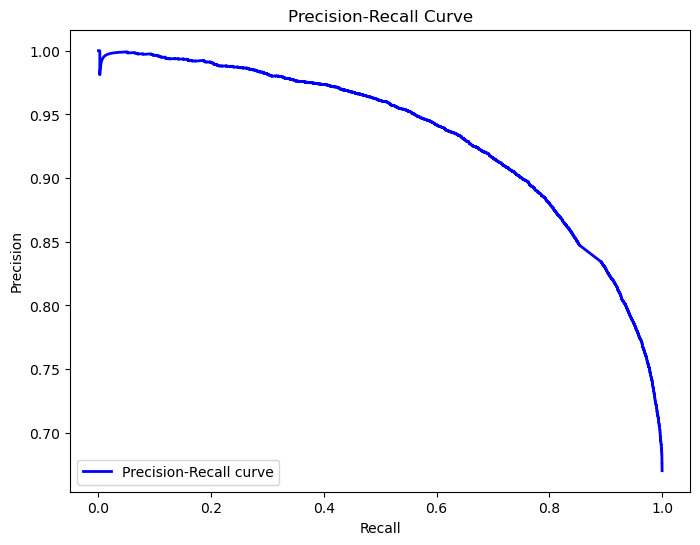

**************************************************************************************************

Training Score: 0.966 +/- 0.072


In [ ]:
evaluate_model(m_nb_unbi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

m_nb['UniBi'] = f1
m_nb_train['UniBi'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9658771485185015
F1 Score Test: 0.7987834848857213


### 3.6 MultinomialNB : Ngram

In [ ]:
from sklearn.naive_bayes import MultinomialNB

feature_selector = SelectPercentile(f_classif, percentile=50)

estimator = MultinomialNB(fit_prior = True)

pipe18 = Pipeline([
  ('preprocessor', col_ng),
  ('feature_selector', feature_selector),
  ('estimator', estimator)
])

param_grid = {
    'estimator__alpha': [0.1, 1, 10],      # Additive smoothing parameter
    # 'estimator__fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}


hpt = GridSearchCV(pipe18, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

hpt.fit(x_train, y_train_en)

m_nb_ng = hpt.best_estimator_

print("Best Hyperparameters:", hpt.best_params_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Hyperparameters: {'estimator__alpha': 0.1}


In [ ]:
# Visulaising Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe18

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ng',
                                                  TfidfVectorizer(min_df=3,
                                                                  ngram_range=(1,
                                                                               5)),
                                                  'reviewText')],
                                   verbose_feature_names_out=False)),
                ('feature_selector', SelectPercentile(percentile=50)),
                ('estimator', MultinomialNB())])

In [ ]:
## Geting Cv Scores

cv_scores = hpt.cv_results_
mean_test_score = cv_scores['mean_test_score']
cv_scores, mean_test_score

({'mean_fit_time': array([21.84977496, 21.72854662, 15.30733025]),
  'std_fit_time': array([0.21362507, 0.03523111, 0.04004538]),
  'mean_score_time': array([12.28445172, 12.09227657,  8.17581606]),
  'std_score_time': array([0.05484891, 0.3721993 , 0.00795722]),
  'param_estimator__alpha': masked_array(data=[0.1, 1, 10],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'estimator__alpha': 0.1},
   {'estimator__alpha': 1},
   {'estimator__alpha': 10}],
  'split0_test_score': array([0.79495569, 0.75849039, 0.6686635 ]),
  'split1_test_score': array([0.79030152, 0.75816783, 0.66844846]),
  'mean_test_score': array([0.7926286 , 0.75832911, 0.66855598]),
  'std_test_score': array([0.00232708, 0.00016128, 0.00010752]),
  'rank_test_score': array([1, 2, 3], dtype=int32)},
 array([0.7926286 , 0.75832911, 0.66855598]))

In [ ]:
y_pred = m_nb_ng.predict(x_test)
y_pred_train = m_nb_ng.predict(x_train)

Confusion Matrix:
 [[ 6277  4456]
 [ 1899 19920]]
**************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66     10733
           1       0.82      0.91      0.86     21819

    accuracy                           0.80     32552
   macro avg       0.79      0.75      0.76     32552
weighted avg       0.80      0.80      0.80     32552

**************************************************************************************************

ROC AUC Score: 0.8714359647815577


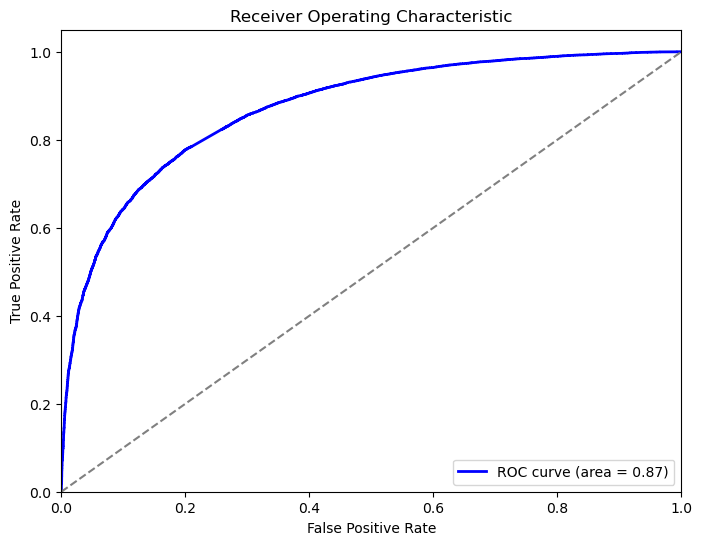

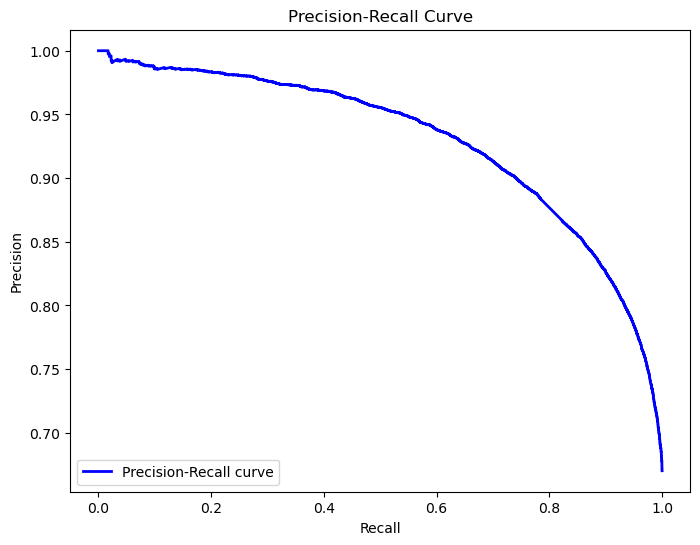

**************************************************************************************************

Training Score: 0.913 +/- 0.073


In [ ]:
evaluate_model(m_nb_ng, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_en, y_pred, average='micro')

f1_train = f1_score(y_train_en, y_pred_train, average='micro')

m_nb['Ng'] = f1
m_nb_train['Ng'] = f1_train

print("F1 Score Train:", f1_train)
print("F1 Score Test:", f1)

F1 Score Train: 0.9127843570956792
F1 Score Test: 0.8047739002211846


### Model eval

In [ ]:
# Calculate mean values
test_mean = sum(m_nb.values()) / len(m_nb)
train_mean = sum(m_nb_train.values()) / len(m_nb_train)

m_nb['mean'] = test_mean
m_nb_train['mean'] = train_mean

model_test_scores['m_nb'] = m_nb
model_train_scores['m_nb_train'] = m_nb_train

model_scores['m_nb'] = m_nb
model_scores['m_nb_train'] = m_nb_train

print('m_nb_test', m_nb)
print('m_nb_train', m_nb_train)

m_nb_test {'BW50k': 0.7941140329319243, 'BW25k': 0.7919021872695994, 'Uni': 0.7756205455885967, 'Bi': 0.7826247235192922, 'UniBi': 0.7987834848857213, 'Ng': 0.8047739002211846, 'mean': 0.791303145736053}
m_nb_train {'BW50k': 0.8394236824723899, 'BW25k': 0.8245318956115694, 'Uni': 0.8483019215704345, 'Bi': 0.9242968834001505, 'UniBi': 0.9658771485185015, 'Ng': 0.9127843570956792, 'mean': 0.8858693147781209}


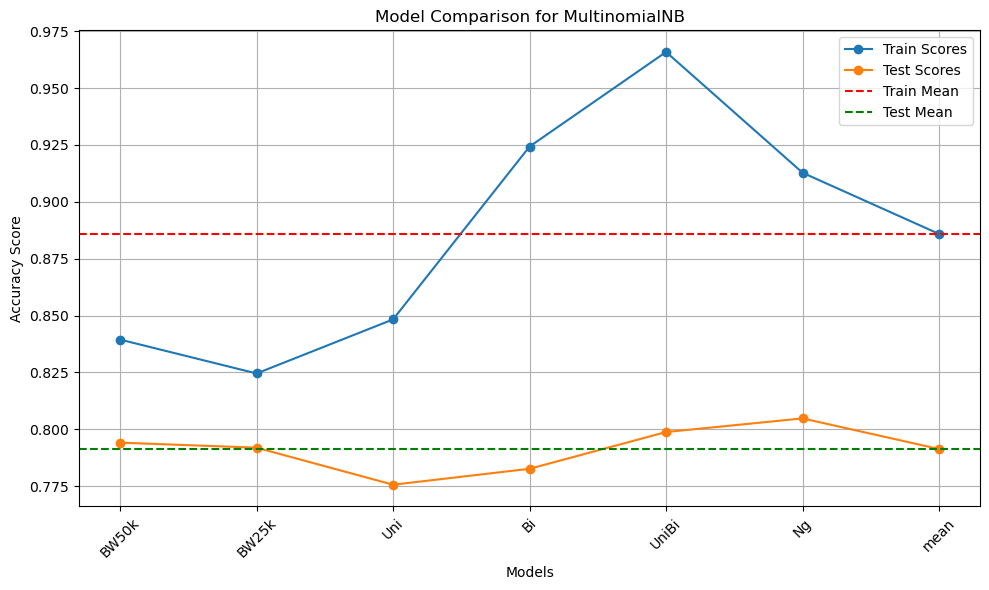

In [ ]:
plot_model_comparison(m_nb_train, m_nb, train_mean, test_mean,  'MultinomialNB')

## 4. Light GBM

In [ ]:
# lgbm = {}
# lgbm_train={}

### 4.1  Light GBM : 50K Words

In [ ]:
# import lightgbm as lgb

# estimator = lgb.LGBMClassifier(learning_rate = 0.1, boosting_type= 'gbdt', n_jobs = -1, num_leaves = 127, class_weight= 'balanced')
# pipe19 = Pipeline([
#   ('preprocessor', pre1),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [50, 100],          # Number of boosting rounds
# }

# # param_grid = {
# #     'estimator__boosting_type': ['gbdt', 'dart', 'goss'],  # Boosting type
# #     'estimator__num_leaves': [31, 63, 127],               # Maximum number of leaves in one tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],         # Learning rate
# #     'estimator__n_estimators': [100, 200, 300],           # Number of boosting rounds
# # }


# hpt = RandomizedSearchCV(pipe19, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# lgbm_50k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe19

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = lgbm_50k.predict(x_test)
# y_pred_train = lgbm_50k.predict(x_train)

In [ ]:
# evaluate_model(lgbm_50k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# lgbm['BW50k'] = f1
# lgbm_train['BW50k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 4.2  Light GBM : 25K Words

In [ ]:
# estimator = lgb.LGBMClassifier(learning_rate = 0.1, boosting_type= 'gbdt', n_jobs = -1, num_leaves = 127, class_weight= 'balanced')
# pipe20 = Pipeline([
#   ('preprocessor', pre2),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 100]          # Number of boosting rounds
# }

# # param_grid = {
# #     'estimator__boosting_type': ['gbdt', 'dart', 'goss'],  # Boosting type
# #     'estimator__num_leaves': [31, 63, 127],               # Maximum number of leaves in one tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],         # Learning rate
# #     'estimator__n_estimators': [50, 100],           # Number of boosting rounds
# # }


# hpt = GridSearchCV(pipe20, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# lgbm_25k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe20

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = lgbm_25k.predict(x_test)
# y_pred_train = lgbm_25k.predict(x_train)

In [ ]:
# evaluate_model(lgbm_25k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# lgbm['BW25k'] = f1
# lgbm_train['BW25k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 4.3  Light GBM : Unigram

In [ ]:
# estimator = lgb.LGBMClassifier(learning_rate = 0.1, boosting_type= 'gbdt', n_jobs = -1, num_leaves = 127, class_weight= 'balanced')
# pipe21 = Pipeline([
#   ('preprocessor', pre4),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 100]          # Number of boosting rounds
# }

# # param_grid = {
# #     'estimator__boosting_type': ['gbdt', 'dart', 'goss'],  # Boosting type
# #     'estimator__num_leaves': [31, 63, 127],               # Maximum number of leaves in one tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],         # Learning rate
# #     'estimator__n_estimators': [100, 200, 300],           # Number of boosting rounds
# # }


# hpt = GridSearchCV(pipe21, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# lgbm_un = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe21

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = lgbm_un.predict(x_test)
# y_pred_train = lgbm_un.predict(x_train)

In [ ]:
# evaluate_model(lgbm_un, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# lgbm['Uni'] = f1
# lgbm_train['Uni'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 4.4  Light GBM : Bigram

In [ ]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# feature_selector = SelectPercentile(f_classif, percentile=25)

# estimator = lgb.LGBMClassifier(learning_rate = 0.1, boosting_type= 'gbdt', n_jobs = -1, num_leaves = 127, class_weight= 'balanced')
# pipe22 = Pipeline([
#   ('preprocessor', pre5),
#     ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,100]          # Number of boosting rounds
# }

# # param_grid = {
# #     'estimator__boosting_type': ['gbdt', 'dart', 'goss'],  # Boosting type
# #     'estimator__num_leaves': [31, 63, 127],               # Maximum number of leaves in one tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],         # Learning rate
# #     'estimator__n_estimators': [100, 200, 300],           # Number of boosting rounds
# # }


# hpt = GridSearchCV(pipe22, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# lgbm_bi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe22

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = lgbm_bi.predict(x_test)
# y_pred_train = lgbm_bi.predict(x_train)

In [ ]:
# evaluate_model(lgbm_bi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# lgbm['Bi'] = f1
# lgbm_train['Bi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 4.5  Light GBM : Uni-Bigram

In [ ]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# feature_selector = SelectPercentile(f_classif, percentile=50)

# estimator = lgb.LGBMClassifier(learning_rate = 0.1, boosting_type= 'gbdt', n_jobs = -1, num_leaves = 127, class_weight= 'balanced')
# pipe23 = Pipeline([
#   ('preprocessor', pre6),
#     ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 100]          # Number of boosting rounds
# }

# # param_grid = {
# #     'estimator__boosting_type': ['gbdt', 'dart', 'goss'],  # Boosting type
# #     'estimator__num_leaves': [31, 63, 127],               # Maximum number of leaves in one tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],         # Learning rate
# #     'estimator__n_estimators': [100, 200, 300],           # Number of boosting rounds
# # }


# hpt = GridSearchCV(pipe23, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# lgbm_unbi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe23

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = lgbm_unbi.predict(x_test)
# y_pred_train = lgbm_unbi.predict(x_train)

In [ ]:
# evaluate_model(lgbm_unbi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# lgbm['UniBi'] = f1
# lgbm_train['UniBi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 4.6  Light GBM : Ngram

In [ ]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# feature_selector = SelectPercentile(f_classif, percentile=25)

# estimator = lgb.LGBMClassifier(learning_rate = 0.1, boosting_type= 'gbdt', n_jobs = -1, num_leaves = 127, class_weight= 'balanced')
# pipe24 = Pipeline([
#   ('preprocessor', pre7),
#     ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,100]          # Number of boosting rounds
# }

# # param_grid = {
# #     'estimator__boosting_type': ['gbdt', 'dart', 'goss'],  # Boosting type
# #     'estimator__num_leaves': [31, 63, 127],               # Maximum number of leaves in one tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],         # Learning rate
# #     'estimator__n_estimators': [100, 200, 300],           # Number of boosting rounds
# # }


# hpt = GridSearchCV(pipe24, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# lgbm_ng = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe24

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = lgbm_ng.predict(x_test)
# y_pred_train = lgbm_ng.predict(x_train)

In [ ]:
# evaluate_model(lgbm_ng, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# lgbm['Ng'] = f1
# lgbm_train['Ng'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### Model eval

In [ ]:
# # Calculate mean values
# test_mean = sum(lgbm.values()) / len(lgbm)
# train_mean = sum(lgbm_train.values()) / len(lgbm_train)

# lgbm['mean'] = test_mean
# lgbm_train['mean'] = train_mean

# model_test_scores['lgbm'] = lgbm
# model_train_scores['lgbm_train'] = lgbm_train

# print('lgbm_test', lgbm)
# print('lgbm_train', lgbm_train)

In [ ]:
# plot_model_comparison(lgbm_train, lgbm, train_mean, test_mean, 'Light GBM')

## 5. Random_forest

In [ ]:
# ranf = {}
# ranf_train = {}

### 5.1  Random_forest : 50K Words

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# estimator = RandomForestClassifier(min_samples_split=9, min_samples_leaf=9, max_features= 'sqrt', random_state=21)


# pipe25 = Pipeline([
#   ('preprocessor', pre1),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [300]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],             # Number of trees in the forest
# #     'estimator__max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the trees
# #     'estimator__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
# #     'estimator__min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
# #     'estimator__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for split
# # }


# hpt = RandomizedSearchCV(pipe25, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# ranf_50k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe25

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = ranf_50k.predict(x_test)
# y_pred_train = ranf_50k.predict(x_train)

In [ ]:
# evaluate_model(ranf_50k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# ranf['BW50k'] = f1
# ranf_train['BW50k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 5.2  Random_forest : 25K Words

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# estimator = RandomForestClassifier(min_samples_split=7, min_samples_leaf=7, max_features= 'sqrt', random_state=21)


# pipe26 = Pipeline([
#   ('preprocessor', pre2),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [100]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],             # Number of trees in the forest
# #     'estimator__max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the trees
# #     'estimator__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
# #     'estimator__min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
# #     'estimator__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for split
# # }


# hpt = RandomizedSearchCV(pipe26, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# ranf_25k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe26

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = ranf_25k.predict(x_test)
# y_pred_train = ranf_25k.predict(x_train)

In [ ]:
# evaluate_model(ranf_25k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# ranf['BW25k'] = f1
# ranf_train['BW25k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 5.3  Random_forest : Unigram

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# estimator = RandomForestClassifier(min_samples_split=7, min_samples_leaf=7, max_features= 'sqrt', random_state=21)


# pipe27 = Pipeline([
#   ('preprocessor', pre4),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [100]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],             # Number of trees in the forest
# #     'estimator__max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the trees
# #     'estimator__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
# #     'estimator__min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
# #     'estimator__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for split
# # }


# hpt = RandomizedSearchCV(pipe27, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# ranf_un = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe27

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = ranf_un.predict(x_test)
# y_pred_train = ranf_un.predict(x_train)

In [ ]:
# evaluate_model(ranf_un, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# ranf['Uni'] = f1
# ranf_train['Uni'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 5.4  Random_forest : Bigram

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# feature_selector = SelectPercentile(f_classif, percentile=50)

# estimator = RandomForestClassifier(min_samples_split=7, min_samples_leaf=7, max_features= 'sqrt', random_state=21)


# pipe28 = Pipeline([
#   ('preprocessor', pre5),
#   ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [100]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],             # Number of trees in the forest
# #     'estimator__max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the trees
# #     'estimator__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
# #     'estimator__min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
# #     'estimator__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for split
# # }


# hpt = RandomizedSearchCV(pipe28, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# ranf_bi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe28

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = ranf_bi.predict(x_test)
# y_pred_train = ranf_bi.predict(x_train)

In [ ]:
# evaluate_model(ranf_bi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# ranf['Bi'] = f1
# ranf_train['Bi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 5.5  Random_forest : Uni-Bigram

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# feature_selector = SelectPercentile(f_classif, percentile=50)

# estimator = RandomForestClassifier(min_samples_split=7, min_samples_leaf=7, max_features= 'sqrt', random_state=21)


# pipe29 = Pipeline([
#   ('preprocessor', pre6),
#   ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [100]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],             # Number of trees in the forest
# #     'estimator__max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the trees
# #     'estimator__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
# #     'estimator__min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
# #     'estimator__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for split
# # }


# hpt = RandomizedSearchCV(pipe29, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# ranf_unbi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe29

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = ranf_unbi.predict(x_test)
# y_pred_train = ranf_unbi.predict(x_train)

In [ ]:
# evaluate_model(ranf_unbi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# ranf['UniBi'] = f1
# ranf_train['UniBi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 5.6  Random_forest : Ngram

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# feature_selector = SelectPercentile(f_classif, percentile=50)

# estimator = RandomForestClassifier(min_samples_split=7, min_samples_leaf=7, max_features= 'sqrt', random_state=21)


# pipe30 = Pipeline([
#   ('preprocessor', pre7),
#   ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [50]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],             # Number of trees in the forest
# #     'estimator__max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the trees
# #     'estimator__min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
# #     'estimator__min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
# #     'estimator__max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider for split
# # }


# hpt = RandomizedSearchCV(pipe30, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1,n_iter=20, error_score='raise')

# hpt.fit(x_train, y_train_en)

# ranf_ng = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe30

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = ranf_ng.predict(x_test)
# y_pred_train = ranf_ng.predict(x_train)

In [ ]:
# evaluate_model(ranf_ng, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# ranf['Ng'] = f1
# ranf_train['Ng'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### Model eval

In [ ]:
# # Calculate mean values
# test_mean = sum(ranf.values()) / len(ranf)
# train_mean = sum(ranf_train.values()) / len(ranf_train)

# ranf['mean'] = test_mean
# ranf_train['mean'] = train_mean

# model_test_scores['ranf'] = ranf
# model_train_scores['ranf_train'] = ranf_train

# print('ranf_test', ranf)
# print('ranf_train', ranf_train)

In [ ]:
# plot_model_comparison(ranf_train, ranf, train_mean, test_mean, 'Random_forest')

## 6.XGBoost

In [ ]:
# xgb = {}
# xgb_train = {}

### 6.1  XGBoost : 50K Words

In [ ]:
# import xgboost as xgb

# estimator =xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=21)


# pipe31 = Pipeline([
#   ('preprocessor', pre1),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [50, 100]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],         # Number of boosting rounds
# #     'estimator__max_depth': [3, 5, 7],                  # Maximum depth of each tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],       # Learning rate
# #     'estimator__subsample': [0.8, 1.0],                 # Fraction of samples used for fitting each tree
# #     'estimator__colsample_bytree': [0.8, 1.0],          # Fraction of features used for fitting each tree
# # }


# hpt = GridSearchCV(pipe31, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# xgb_50k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe31

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = xgb_50k.predict(x_test)
# y_pred_train = xgb_50k.predict(x_train)

In [ ]:
# evaluate_model(xgb_50k,x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# xgb['BW50k'] = f1
# xgb_train['BW50k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 6.2  XGBoost : 25K Words

In [ ]:
# import xgboost as xgb

# estimator =xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=21)


# pipe32 = Pipeline([
#   ('preprocessor', pre2),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [50, 100]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],         # Number of boosting rounds
# #     'estimator__max_depth': [3, 5, 7],                  # Maximum depth of each tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],       # Learning rate
# #     'estimator__subsample': [0.8, 1.0],                 # Fraction of samples used for fitting each tree
# #     'estimator__colsample_bytree': [0.8, 1.0],          # Fraction of features used for fitting each tree
# # }


# hpt = GridSearchCV(pipe32, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# xgb_25k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe32

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = xgb_25k.predict(x_test)
# y_pred_train = xgb_25k.predict(x_train)

In [ ]:
# evaluate_model(xgb_25k, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# xgb['BW25k'] = f1
# xgb_train['BW25k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 6.3  XGBoost : Unigram

In [ ]:
# import xgboost as xgb

# estimator =xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=21)


# pipe33 = Pipeline([
#   ('preprocessor', pre4),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 50]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],         # Number of boosting rounds
# #     'estimator__max_depth': [3, 5, 7],                  # Maximum depth of each tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],       # Learning rate
# #     'estimator__subsample': [0.8, 1.0],                 # Fraction of samples used for fitting each tree
# #     'estimator__colsample_bytree': [0.8, 1.0],          # Fraction of features used for fitting each tree
# # }


# hpt = GridSearchCV(pipe33, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# xgb_un = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe33

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = xgb_un.predict(x_test)
# y_pred_train = xgb_un.predict(x_train)

In [ ]:
# evaluate_model(xgb_un, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# xgb['Uni'] = f1
# xgb_train['Uni'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 6.4  XGBoost : Bigram

In [ ]:
# import xgboost as xgb

# feature_selector = SelectPercentile(f_classif, percentile=50)
# estimator =xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=21)


# pipe34 = Pipeline([
#   ('preprocessor', pre5),
#     ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 50]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],         # Number of boosting rounds
# #     'estimator__max_depth': [3, 5, 7],                  # Maximum depth of each tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],       # Learning rate
# #     'estimator__subsample': [0.8, 1.0],                 # Fraction of samples used for fitting each tree
# #     'estimator__colsample_bytree': [0.8, 1.0],          # Fraction of features used for fitting each tree
# # }


# hpt = GridSearchCV(pipe34, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# xgb_bi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe34

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = xgb_bi.predict(x_test)
# y_pred_train = xgb_bi.predict(x_train)

In [ ]:
# evaluate_model(xgb_bi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# xgb['Bi'] = f1
# xgb_train['Bi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 6.5  XGBoost : Uni-Bigram

In [ ]:
# import xgboost as xgb

# feature_selector = SelectPercentile(f_classif, percentile=50)
# estimator =xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=21)


# pipe35 = Pipeline([
#   ('preprocessor', pre6),
#     ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 50]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],         # Number of boosting rounds
# #     'estimator__max_depth': [3, 5, 7],                  # Maximum depth of each tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],       # Learning rate
# #     'estimator__subsample': [0.8, 1.0],                 # Fraction of samples used for fitting each tree
# #     'estimator__colsample_bytree': [0.8, 1.0],          # Fraction of features used for fitting each tree
# # }


# hpt = GridSearchCV(pipe35, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# xgb_unbi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe35

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = xgb_unbi.predict(x_test)
# y_pred_train = xgb_unbi.predict(x_train)

In [ ]:
# evaluate_model(xgb_unbi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# xgb['UniBi'] = f1
# xgb_train['UniBi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 6.6  XGBoost : Ngram

In [ ]:
# import xgboost as xgb

# feature_selector = SelectPercentile(f_classif, percentile=50)
# estimator =xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=21)


# pipe36 = Pipeline([
#   ('preprocessor', pre7),
#     ('feature_selector', feature_selector),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10, 50]         # Number of trees in the forest
# }

# # param_grid = {
# #     'estimator__n_estimators': [100, 200, 300],         # Number of boosting rounds
# #     'estimator__max_depth': [3, 5, 7],                  # Maximum depth of each tree
# #     'estimator__learning_rate': [0.01, 0.1, 0.2],       # Learning rate
# #     'estimator__subsample': [0.8, 1.0],                 # Fraction of samples used for fitting each tree
# #     'estimator__colsample_bytree': [0.8, 1.0],          # Fraction of features used for fitting each tree
# # }


# hpt = GridSearchCV(pipe36, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# xgb_ng = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe36

In [ ]:
# ## Geting Cv Scores

# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = xgb_ng.predict(x_test)
# y_pred_train = xgb_ng.predict(x_train)

In [ ]:
# evaluate_model(xgb_ng, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# xgb['Ng'] = f1
# xgb_train['Ng'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### Model eval

In [ ]:
# # Calculate mean values
# test_mean = sum(xgb.values()) / len(xgb)
# train_mean = sum(xgb_train.values()) / len(xgb_train)

# xgb['mean'] = test_mean
# xgb_train['mean'] = train_mean

# model_test_scores['xgb'] = xgb
# model_train_scores['xgb_train'] = xgb_train

# print('xgb_test', xgb)
# print('xgb_train', xgb_train)

In [ ]:
# plot_model_comparison(xgb_train, xgb, train_mean, test_mean, 'XGBoost')

## 7.BaggingClassifier

In [ ]:
# bag = {}
# bag_train = {}

### 7.1  BaggingClassifier : 50K Words

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# # Create a Decision Tree classifier as the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=5)

# estimator =BaggingClassifier(base_estimator=base_estimator, random_state=21)


# pipe37 = Pipeline([
#   ('preprocessor', pre1),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,50]         # Number of trees in the forest
# }

# hpt = GridSearchCV(pipe37, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# bag_50k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe37

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = bag_50k.predict(x_test)
# y_pred_train = bag_50k.predict(x_train)

In [ ]:
# bag1 = evaluate_model(bag_50k, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# bag['BW50k'] = f1
# bag_train['BW50k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 7.2  BaggingClassifier : 25K Words

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# # Create a Decision Tree classifier as the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=5)

# estimator =BaggingClassifier(base_estimator=base_estimator, random_state=21)


# pipe38 = Pipeline([
#   ('preprocessor', pre2),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,50]         # Number of trees in the forest
# }

# hpt = GridSearchCV(pipe38, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# bag_25k = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe38

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = bag_25k.predict(x_test)
# y_pred_train = bag_25k.predict(x_train)

In [ ]:
# bag1 = evaluate_model(bag_25k, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# bag['BW25k'] = f1
# bag_train['BW25k'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 7.3  BaggingClassifier : Unigram

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# # Create a Decision Tree classifier as the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=5)

# estimator =BaggingClassifier(base_estimator=base_estimator, random_state=21)


# pipe39 = Pipeline([
#   ('preprocessor', pre4),
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,50]         # Number of trees in the forest
# }

# hpt = GridSearchCV(pipe39, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# bag_un = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe39

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = bag_un.predict(x_test)
# y_pred_train = bag_un.predict(x_train)

In [ ]:
# bag1 = evaluate_model(bag_un, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# bag['Uni'] = f1
# bag_train['Uni'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 7.4  BaggingClassifier : Bigram

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# feature_selector = SelectPercentile(f_classif, percentile=50)
# # Create a Decision Tree classifier as the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=5)

# estimator =BaggingClassifier(base_estimator=base_estimator, random_state=21)


# pipe40 = Pipeline([
#   ('preprocessor', pre5),
#   ('feature_selector', feature_selector)
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,50]         # Number of trees in the forest
# }

# hpt = GridSearchCV(pipe40, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# bag_bi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe40

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = bag_bi.predict(x_test)
# y_pred_train = bag_bi.predict(x_train)

In [ ]:
# bag1 = evaluate_model(bag_bi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# bag['Bi'] = f1
# bag_train['Bi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 7.5  BaggingClassifier : Uni-Bigram

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# feature_selector = SelectPercentile(f_classif, percentile=50)
# # Create a Decision Tree classifier as the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=5)

# estimator =BaggingClassifier(base_estimator=base_estimator, random_state=21)


# pipe41 = Pipeline([
#   ('preprocessor', pre6),
#   ('feature_selector', feature_selector)
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,50]         # Number of trees in the forest
# }

# hpt = GridSearchCV(pipe41, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# bag_unbi = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe41

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = bag_unbi.predict(x_test)
# y_pred_train = bag_unbi.predict(x_train)

In [ ]:
# bag1 = evaluate_model(bag_unbi, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# bag['UniBi'] = f1
# bag_train['UniBi'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### 7.6  BaggingClassifier : Ngram

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# feature_selector = SelectPercentile(f_classif, percentile=50)
# # Create a Decision Tree classifier as the base estimator
# base_estimator = DecisionTreeClassifier(max_depth=5)

# estimator =BaggingClassifier(base_estimator=base_estimator, random_state=21)


# pipe42 = Pipeline([
#   ('preprocessor', pre7),
#   ('feature_selector', feature_selector)
#   ('estimator', estimator)
# ])

# param_grid = {
#     'estimator__n_estimators': [10,50]         # Number of trees in the forest
# }

# hpt = GridSearchCV(pipe42, param_grid,  cv=StratifiedKFold(2), n_jobs=-1, scoring= scoring, verbose =1, error_score='raise')

# hpt.fit(x_train, y_train_en)

# bag_ng = hpt.best_estimator_

# print("Best Hyperparameters:", hpt.best_params_)


In [ ]:
# # Visulaising Pipeline
# from sklearn import set_config
# set_config(display="diagram")
# pipe42

In [ ]:
# ## Geting Cv Scores
# cv_scores = hpt.cv_results_
# mean_test_score = cv_scores['mean_test_score']
# cv_scores, mean_test_score

In [ ]:
# y_pred = bag_ng.predict(x_test)
# y_pred_train = bag_ng.predict(x_train)

In [ ]:
# bag1 = evaluate_model(bag_ng, x_train, y_train_en, x_test, y_test_en, mean_test_score, confidence_level=0.95)

In [ ]:
# from sklearn.metrics import f1_score

# f1 = f1_score(y_test_en, y_pred, average='micro')

# f1_train = f1_score(y_train_en, y_pred_train, average='micro')

# bag['Ng'] = f1
# bag_train['Ng'] = f1_train

# print("F1 Score Train:", f1_train)
# print("F1 Score Test:", f1)

### Model eval

In [ ]:
# # Calculate mean values
# test_mean = sum(bag.values()) / len(bag)
# train_mean = sum(bag_train.values()) / len(bag_train)

# bag['mean'] = test_mean
# bag_train['mean'] = train_mean

# model_test_scores['bag'] = bag
# model_train_scores['bag_train'] = bag_train

# print('bag_test', bag)
# print('bag_train', bag_train)

In [ ]:
# plot_model_comparison(bag_train, bag, train_mean, test_mean, 'XGBoost')

# Conclusion

## Model & comprisions

### Test results

In [ ]:
Test_scores = pd.DataFrame(model_test_scores).T
Test_scores['best_scores'] = Test_scores.max(axis=1)
print(Test_scores)

            BW50k     BW25k       Uni        Bi     UniBi        Ng      mean  \
log_reg  0.818260  0.804129  0.810365  0.802808  0.836631  0.815311  0.814584   
lin_svc  0.796879  0.801425  0.820288  0.809075  0.836293  0.837153  0.816852   
m_nb     0.794114  0.791902  0.775621  0.782625  0.798783  0.804774  0.791303   

         best_scores  
log_reg     0.836631  
lin_svc     0.837153  
m_nb        0.804774  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to plot the comparison graphs
def plot_comparison(scores_df, title, column):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=scores_df, x=scores_df.index, y= column)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    plt.title(title)
    plt.ylabel('Test Scores')
    plt.xlabel('Models')
    plt.tight_layout()
    plt.show()

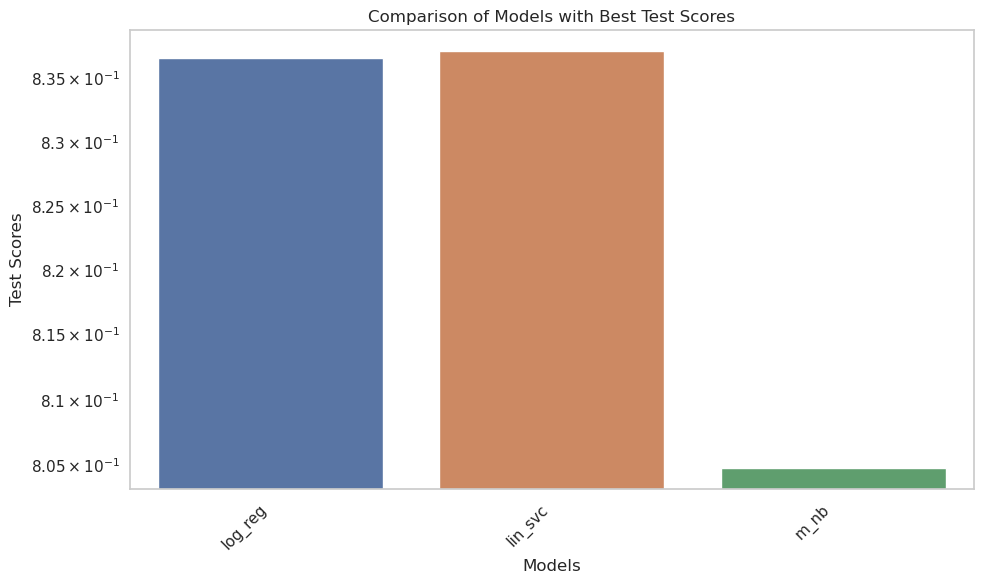

In [ ]:
# Plot comparison graphs
plot_comparison(Test_scores, 'Comparison of Models with Best Test Scores', 'best_scores')

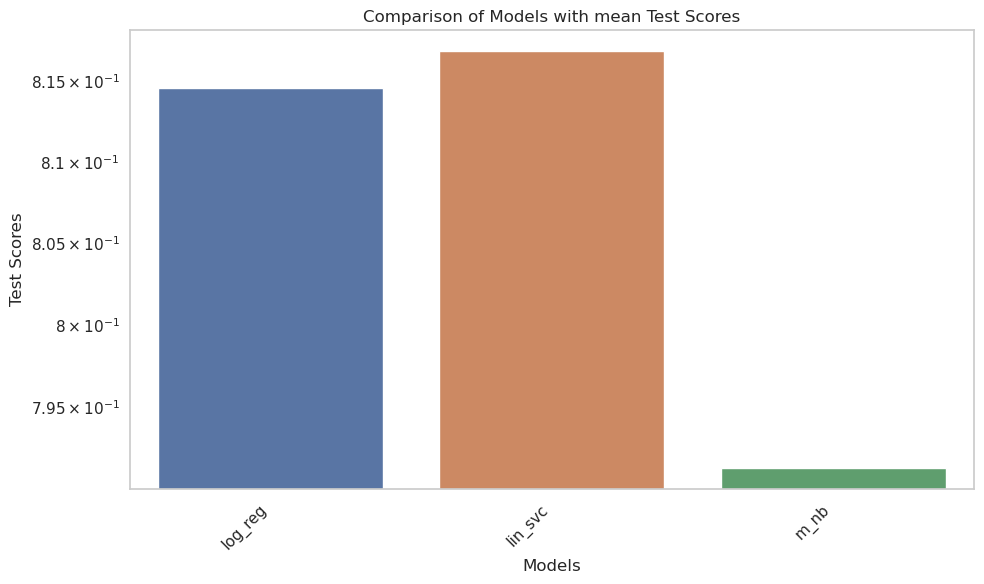

In [ ]:
# Plot comparison graphs
plot_comparison(Test_scores, 'Comparison of Models with mean Test Scores', 'mean')

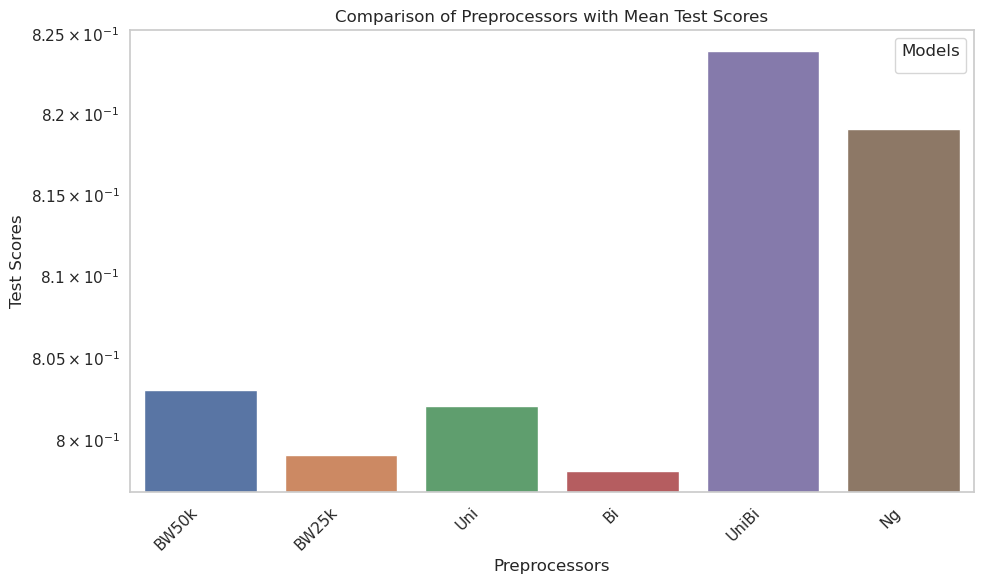

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame to have preprocessors as rows and models as columns
preprocessor_scores = Test_scores.transpose()

# Calculate the mean along each row
preprocessor_scores['mean'] = preprocessor_scores.mean(axis=1)

preprocessor_scores = preprocessor_scores.iloc[:-2]

# Create a function to plot the comparison graphs
def plot_comparison(scores_df, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=scores_df, x=scores_df.index, y='mean')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    plt.title(title)
    plt.ylabel('Test Scores')
    plt.xlabel('Preprocessors')
    plt.legend(title='Models')
    plt.tight_layout()
    plt.show()

# Plot comparison graphs
plot_comparison(preprocessor_scores, 'Comparison of Preprocessors with Mean Test Scores')


### Train results

In [ ]:
Train_scores = pd.DataFrame(model_train_scores).T
Train_scores['best_scores'] = Train_scores.max(axis=1)
print(Train_scores)

                  BW50k     BW25k       Uni        Bi     UniBi        Ng  \
log_reg_train  0.898883  0.878308  0.852672  0.875950  0.981698  0.860821   
lin_svc_train  0.927031  0.902063  0.904751  0.932599  0.984271  0.954388   
m_nb_train     0.839424  0.824532  0.848302  0.924297  0.965877  0.912784   

                   mean  best_scores  
log_reg_train  0.891389     0.981698  
lin_svc_train  0.934184     0.984271  
m_nb_train     0.885869     0.965877  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to plot the comparison graphs
def plot_comparison(scores_df, title, column):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=scores_df, x=scores_df.index, y= column)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    plt.title(title)
    plt.ylabel('Train Scores')
    plt.xlabel('Models')
    plt.tight_layout()
    plt.show()

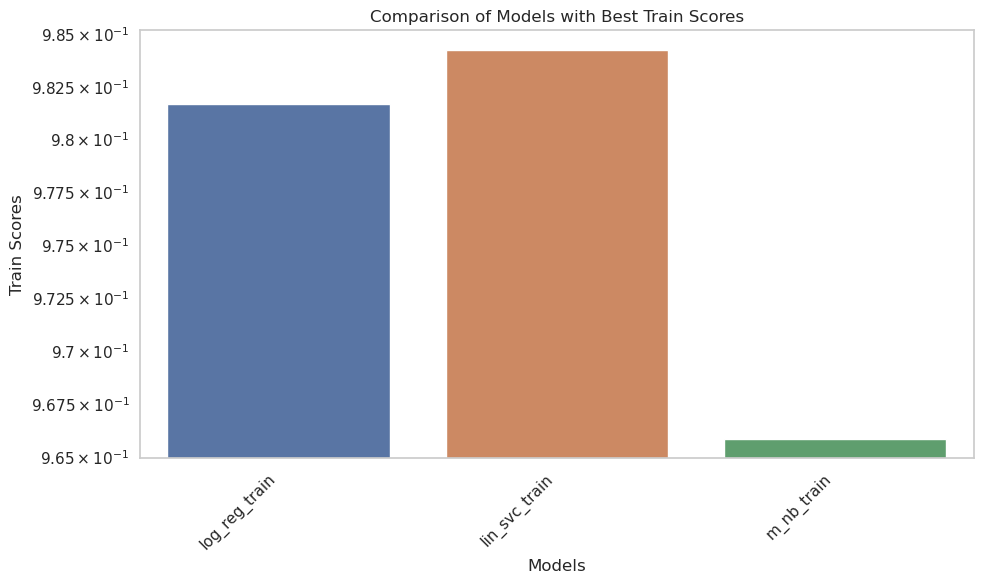

In [ ]:
# Plot comparison graphs
plot_comparison(Train_scores, 'Comparison of Models with Best Train Scores', 'best_scores')

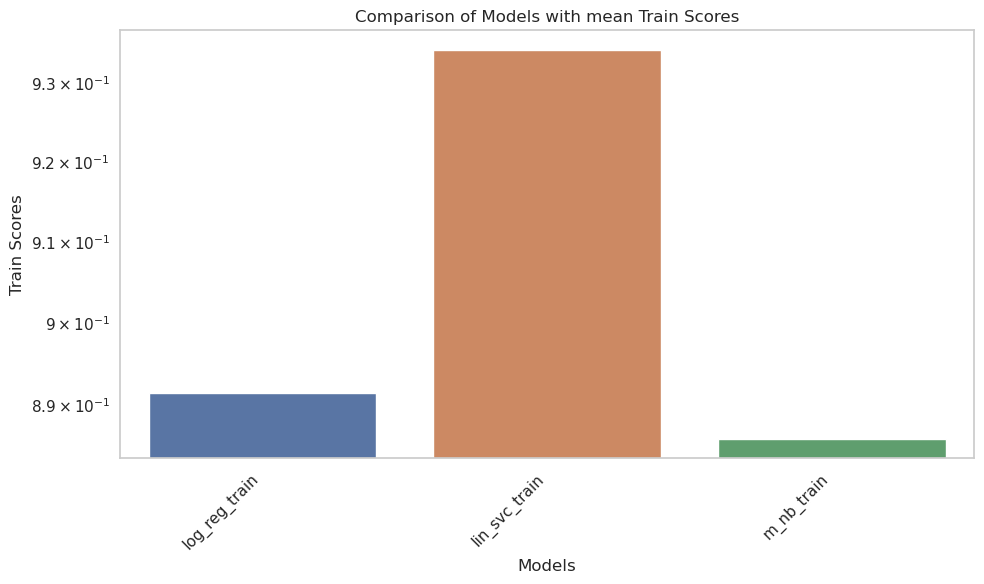

In [ ]:
# Plot comparison graphs
plot_comparison(Train_scores, 'Comparison of Models with mean Train Scores', 'mean')

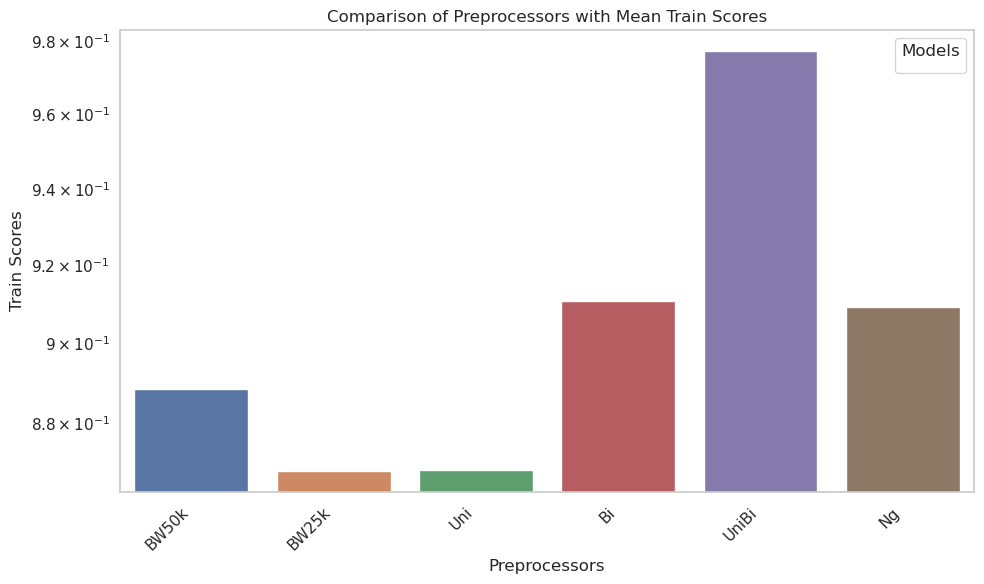

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame to have preprocessors as rows and models as columns
preprocessor_scores = Train_scores.transpose()

# Calculate the mean along each row
preprocessor_scores['mean'] = preprocessor_scores.mean(axis=1)

preprocessor_scores = preprocessor_scores.iloc[:-2]

# Create a function to plot the comparison graphs
def plot_comparison(scores_df, title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=scores_df, x=scores_df.index, y='mean')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    plt.title(title)
    plt.ylabel('Train Scores')
    plt.xlabel('Preprocessors')
    plt.legend(title='Models')
    plt.tight_layout()
    plt.show()

# Plot comparison graphs
plot_comparison(preprocessor_scores, 'Comparison of Preprocessors with Mean Train Scores')


### Final result

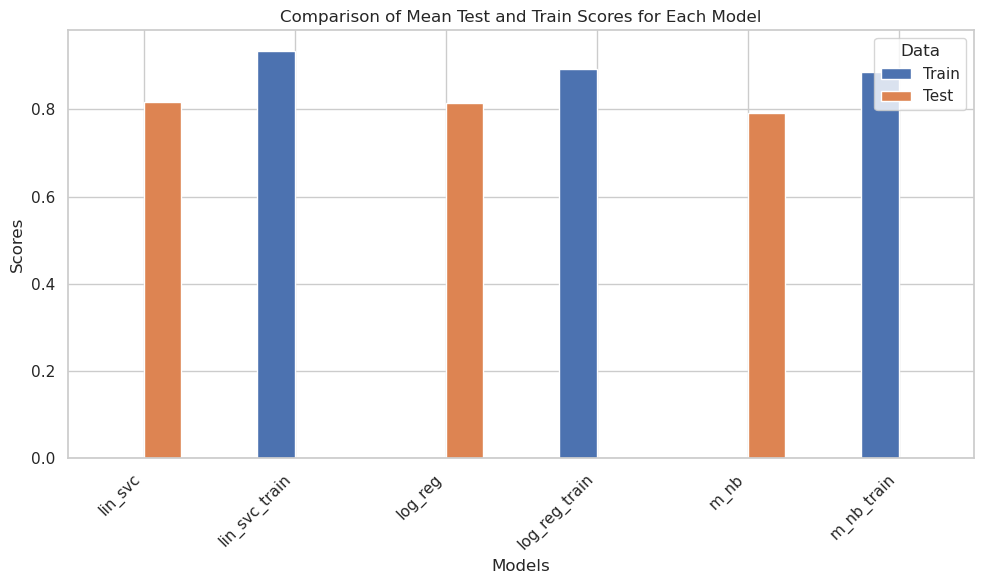

In [ ]:
# Filter the DataFrames to get only the mean scores
mean_train_scores = Train_scores['mean']
mean_test_scores = Test_scores['mean']

# Create a combined DataFrame for plotting
mean_comparison = pd.DataFrame({'Train': mean_train_scores, 'Test': mean_test_scores})

# Create a function to plot the comparison
def plot_mean_comparison(scores_df):
    plt.figure(figsize=(10, 6))
    scores_df.plot(kind='bar', ax=plt.gca())
    plt.title('Comparison of Mean Test and Train Scores for Each Model')
    plt.ylabel('Scores')
    plt.xlabel('Models')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Data')
    plt.tight_layout()
    plt.show()

# Plot comparison
plot_mean_comparison(mean_comparison)

In [ ]:
# Create a DataFrame from all the model scores
model_score_final = pd.DataFrame(model_scores).T
model_score_final['best_score'] = model_score_final.max(axis=1)
model_score_final

BW50k     BW25k       Uni        Bi     UniBi        Ng  \
log_reg        0.818260  0.804129  0.810365  0.802808  0.836631  0.815311   
log_reg_train  0.898883  0.878308  0.852672  0.875950  0.981698  0.860821   
lin_svc        0.796879  0.801425  0.820288  0.809075  0.836293  0.837153   
lin_svc_train  0.927031  0.902063  0.904751  0.932599  0.984271  0.954388   
m_nb           0.794114  0.791902  0.775621  0.782625  0.798783  0.804774   
m_nb_train     0.839424  0.824532  0.848302  0.924297  0.965877  0.912784   

                   mean  best_score  
log_reg        0.814584    0.836631  
log_reg_train  0.891389    0.981698  
lin_svc        0.816852    0.837153  
lin_svc_train  0.934184    0.984271  
m_nb           0.791303    0.804774  
m_nb_train     0.885869    0.965877

## Model For Submission

#### Model Pipe

In [ ]:
pipe5

Pipeline(steps=[('preprocessor',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('col_unbi',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('unbi',
                                                                                  TfidfVectorizer(ngram_range=(1,
                                                                                                               2)),
                                                                                  'reviewText')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_mov',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('mov',
                                                                                  TfidfVectorizer(),
                                                                                  'movieid')],
                                                                   verbose_feature_names_out=False)),
                                                ('col_g...
                                                                                                      inverse_func=<ufunc 'expm1'>),
                                                                                  ['movieid_frequency'])],
                                                                   verbose_feature_names_out=False)),
                                                ('col_en',
                                                 ColumnTransformer(n_jobs=-1,
                                                                   transformers=[('dir',
                                                                                  TargetEncoder(random_state=21),
                                                                                  ['director']),
                                                                                 ('isf',
                                                                                  OrdinalEncoder(),
                                                                                  ['isFrequentReviewer'])],
                                                                   verbose_feature_names_out=False))])),
                ('estimator',
                 LogisticRegression(max_iter=2000, random_state=21,
                                    solver='saga'))])

#### Hyper parameters

In [ ]:
params = log_reg_unbi.named_steps['estimator'].get_params()

print("All parameters of the estimator:")
for param, value in params.items():
    print(f"{param}: {value}")

All parameters of the estimator:
C: 21
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 2000
multi_class: auto
n_jobs: None
penalty: l2
random_state: 21
solver: saga
tol: 0.0001
verbose: 0
warm_start: False


# Submission

In [ ]:
#prediction on test
y_pred_test = log_reg_unbi.predict(test)
y_pred_test = le.inverse_transform(y_pred_test)

In [ ]:
#Preparing Submission Files
submission = pd.DataFrame(y_pred_test, columns=['sentiment'])
submission.index.name ="id"
submission.to_csv('submission.csv', index=True)
print('Successful')

Successful


In [ ]:
submission.shape, test_orignal.shape

((55315, 1), (55315, 4))

# TIme Takes to run the notebook

In [ ]:
# Record the ending time
end_time = time.time()

# Calculate the total elapsed time
elapsed_time = end_time - start_time

print(f"Notebook took {elapsed_time:.2f} seconds to run.")

Notebook took 4314.37 seconds to run.


# Thank You!

**After 42 rounds of training, countless model comparisons, and more plot twists than a blockbuster, I'm ready to roll the credits on my project submission. Just like a great movie, my journey had suspense, drama, and a few unexpected NaNs. As the final scene fades out, I'm hopeful that my project will steal the show and leave the audience saying, 'Now that's a prediction worth watching!** 🎥🍿🏁

**And a heartfelt thank you to all my instructors, professors, and project guides who have been my behind-the-scenes directors, helping me navigate this data odyssey. Your guidance and support have been the true stars of my journey!** 🌟🙌🎓